In [1]:
%cd ..
%ls
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from utils.tools import plot_interval
import ast
type(ast.literal_eval("[[2098, 2180], [5200, 5300]]"))

C:\Users\Dongmin Kim\Documents\OnlineTSAD
 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 067D-FB3E

 C:\Users\Dongmin Kim\Documents\OnlineTSAD 디렉터리

2023-05-10  오후 08:09    <DIR>          .
2023-05-10  오후 08:09    <DIR>          ..
2023-04-10  오후 01:01               156 .gitignore
2023-05-16  오후 01:17    <DIR>          .idea
2023-04-14  오후 04:53    <DIR>          .ipynb_checkpoints
2023-05-14  오후 03:07    <DIR>          cfgs
2023-05-04  오후 08:21    <DIR>          checkpoints
2023-05-11  오후 05:27    <DIR>          data
2023-05-11  오후 04:44    <DIR>          EDA
2023-05-14  오후 07:29    <DIR>          Exp
2023-05-15  오후 03:07    <DIR>          figures
2023-05-11  오후 05:30    <DIR>          hptune
2023-05-04  오후 08:21    <DIR>          logs
2023-05-07  오후 01:57    <DIR>          models
2023-05-11  오후 04:21    <DIR>          outputs
2023-05-04  오후 08:21    <DIR>          plots
2023-05-13  오후 04:30    <DIR>          results
2023-05-09  오후 06:11    <DIR>          scripts
2023-05-10  오후 08:09             

list

In [2]:
label = pd.read_csv("data/SMAP/labeled_anomalies.csv")
SMAP_label = label[label["spacecraft"] == "SMAP"].sort_values(by="chan_id")
MSL_label = label[label["spacecraft"] == "MSL"].sort_values(by="chan_id")
SMAP_list = SMAP_label["chan_id"].tolist()
MSL_list = MSL_label["chan_id"].tolist()

In [3]:
SMAP_label

chan_id spacecraft                           anomaly_sequences  \
15     A-1       SMAP                              [[4690, 4774]]   
22     A-2       SMAP                              [[4450, 4560]]   
23     A-3       SMAP                              [[4575, 4760]]   
24     A-4       SMAP                              [[4550, 4660]]   
47     A-5       SMAP                              [[2750, 2800]]   
48     A-6       SMAP                              [[1890, 1930]]   
49     A-7       SMAP                              [[6200, 8600]]   
52     A-8       SMAP                              [[4569, 8374]]   
53     A-9       SMAP                              [[4569, 8433]]   
42     B-1       SMAP                              [[5060, 5130]]   
16     D-1       SMAP                              [[5250, 8508]]   
40    D-11       SMAP                              [[4270, 4330]]   
41    D-12       SMAP                              [[5178, 7917]]   
50    D-13       SMAP                              [[5070, 5230]]   
19     D-2       SMAP                              [[4319, 8536]]   
20     D-3       SMAP                              [[5225, 8500]]   
21     D-4       SMAP                              [[5225, 8472]]   
27     D-5       SMAP                              [[4800, 4850]]   
28     D-6       SMAP                              [[4870, 4950]]   
29     D-7       SMAP                              [[4940, 7641]]   
35     D-8       SMAP                              [[4370, 4420]]   
36     D-9       SMAP                              [[6250, 7405]]   
2      E-1       SMAP                [[5000, 5030], [5610, 6086]]   
11    E-10       SMAP                [[5000, 5050], [5601, 5871]]   
12    E-11       SMAP                [[5000, 5050], [5614, 5857]]   
13    E-12       SMAP                [[5610, 6141], [5000, 5050]]   
14    E-13       SMAP  [[5309, 5410], [5600, 5640], [6449, 6569]]   
3      E-2       SMAP                              [[5598, 6995]]   
4      E-3       SMAP                              [[5094, 8306]]   
5      E-4       SMAP                              [[5450, 8261]]   
6      E-5       SMAP                              [[5600, 5920]]   
7      E-6       SMAP                              [[5610, 5675]]   
8      E-7       SMAP                              [[5394, 5674]]   
9      E-8       SMAP                              [[5400, 6022]]   
10     E-9       SMAP                              [[5550, 5900]]   
30     F-1       SMAP                              [[5392, 5492]]   
37     F-2       SMAP                              [[5669, 8625]]   
54     F-3       SMAP                              [[5600, 5640]]   
25     G-1       SMAP                              [[4770, 4890]]   
26     G-2       SMAP                              [[4030, 4070]]   
32     G-3       SMAP                              [[4200, 4250]]   
38     G-4       SMAP                              [[4690, 4720]]   
43     G-6       SMAP                              [[5600, 5700]]   
44     G-7       SMAP  [[3650, 3750], [5050, 5100], [7560, 7675]]   
0      P-1       SMAP  [[2149, 2349], [4536, 4844], [3539, 3779]]   
17     P-2       SMAP                              [[5350, 6575]]   
51     P-2       SMAP                              [[5300, 6420]]   
18     P-3       SMAP                              [[5401, 6736]]   
31     P-4       SMAP   [[950, 1080], [2150, 2350], [4770, 4880]]   
45     P-7       SMAP                              [[4950, 6600]]   
46     R-1       SMAP                              [[4510, 4590]]   
1      S-1       SMAP                              [[5300, 5747]]   
33     T-1       SMAP                [[2399, 3898], [6550, 6585]]   
34     T-2       SMAP                              [[6840, 8624]]   
39     T-3       SMAP                [[2098, 2180], [5200, 5300]]   

                                   class  num_values  
15                               [point]        8640  
22                          

In [4]:
MSL_label

chan_id spacecraft                           anomaly_sequences  \
67     C-1        MSL                  [[550, 750], [2100, 2210]]   
68     C-2        MSL                  [[290, 390], [1540, 1575]]   
73    D-14        MSL                [[1630, 1650], [1800, 2000]]   
78    D-15        MSL                              [[1500, 2140]]   
79    D-16        MSL                               [[600, 1250]]   
71     F-4        MSL                              [[2700, 2770]]   
72     F-5        MSL                              [[3550, 3700]]   
62     F-7        MSL  [[1250, 1450], [2670, 2790], [3325, 3425]]   
81     F-8        MSL                              [[1950, 2486]]   
56     M-1        MSL                              [[1110, 2250]]   
57     M-2        MSL                              [[1110, 2250]]   
63     M-3        MSL                              [[1250, 1500]]   
64     M-4        MSL                              [[1250, 1500]]   
65     M-5        MSL                              [[1250, 1550]]   
55     M-6        MSL                              [[1850, 2030]]   
80     M-7        MSL                               [[940, 1040]]   
59    P-10        MSL                              [[4590, 4720]]   
77    P-11        MSL                [[1778, 1898], [1238, 1344]]   
75    P-14        MSL                              [[4575, 4755]]   
66    P-15        MSL                              [[1390, 1410]]   
58     S-2        MSL                                [[900, 910]]   
69    T-12        MSL                                [[630, 750]]   
70    T-13        MSL                  [[690, 790], [1900, 2050]]   
60     T-4        MSL                              [[1172, 1240]]   
61     T-5        MSL                              [[1200, 1225]]   
76     T-8        MSL                  [[870, 930], [1330, 1370]]   
74     T-9        MSL                    [[780, 810], [890, 970]]   

                                   class  num_values  
67                   [point, contextual]        2264  
68                   [point, contextual]        2051  
73                        [point, point]        2625  
78                               [point]        2158  
79                          [contextual]        2191  
71                               [point]        3422  
72                               [point]        3922  
62  [contextual, contextual, contextual]        5054  
81                          [contextual]        2487  
56                          [contextual]        2277  
57                          [contextual]        2277  
63                          [contextual]        2127  
64                          [contextual]        2038  
65                          [contextual]        2303  
55                               [point]        2049  
80                               [point]        2156  
59                               [point]        6100  
77                        [point, point]        3535  
75                               [point]        6100  
66                               [point]        2856  
58                               [point]        1827  
69                          [contextual]        2430  
70              [contextual, contextual]        2430  
60                               [point]        2217  
61                               [point]        2218  
76              [contextual, contextual]        1519  
74                        [point, point]        1096

chan: A-1
A-1
chan: A-2
A-2
chan: A-3
A-3
chan: A-4
A-4
chan: A-5
A-5
chan: A-6
A-6
chan: A-7
A-7
chan: A-8
A-8
chan: A-9
A-9
chan: B-1
B-1
chan: D-1
D-1
chan: D-11
D-11
chan: D-12
D-12
chan: D-13
D-13
chan: D-2
D-2
chan: D-3
D-3
chan: D-4
D-4
chan: D-5
D-5
chan: D-6
D-6
chan: D-7
D-7
chan: D-8
D-8
chan: D-9
D-9
chan: E-1
[[5000, 5030], [5610, 6086]]


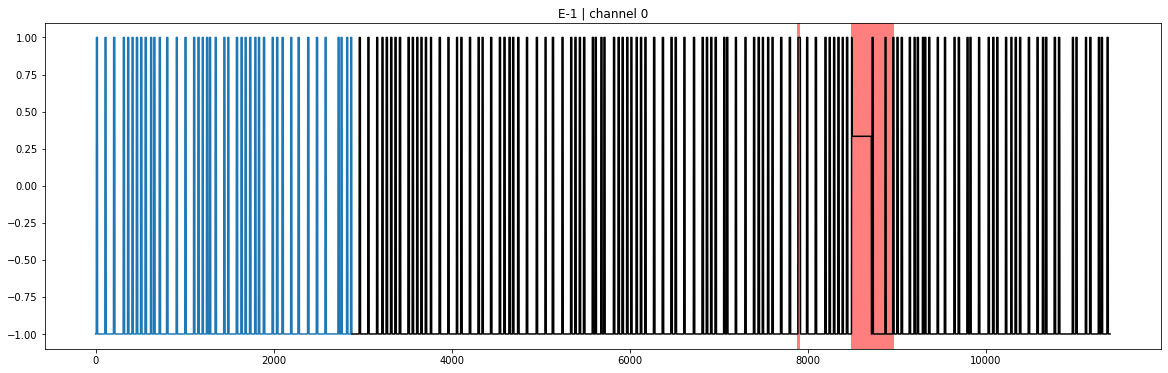

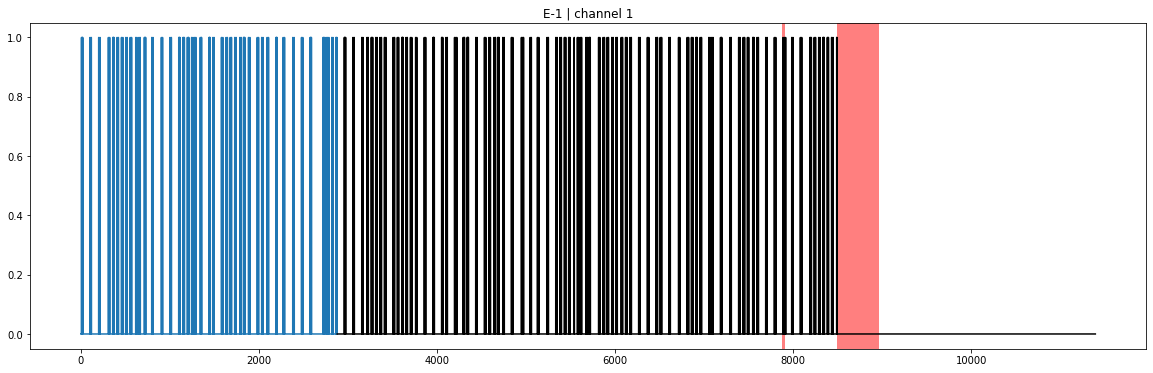

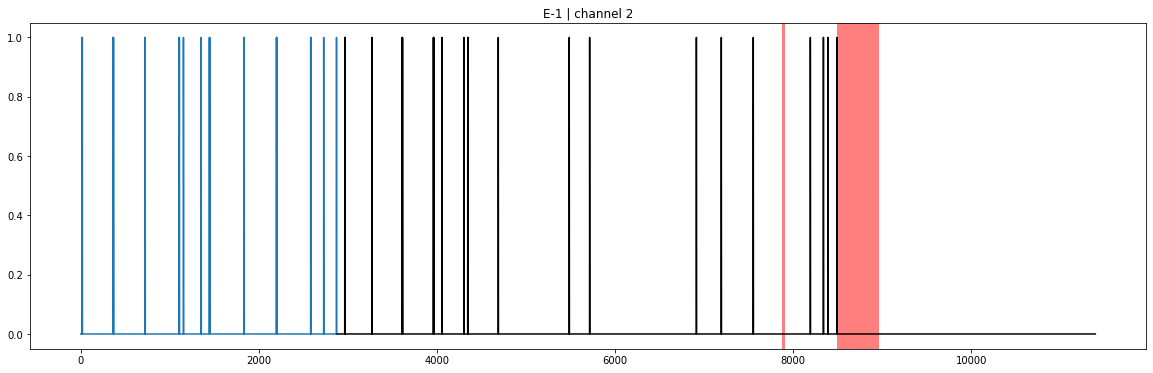

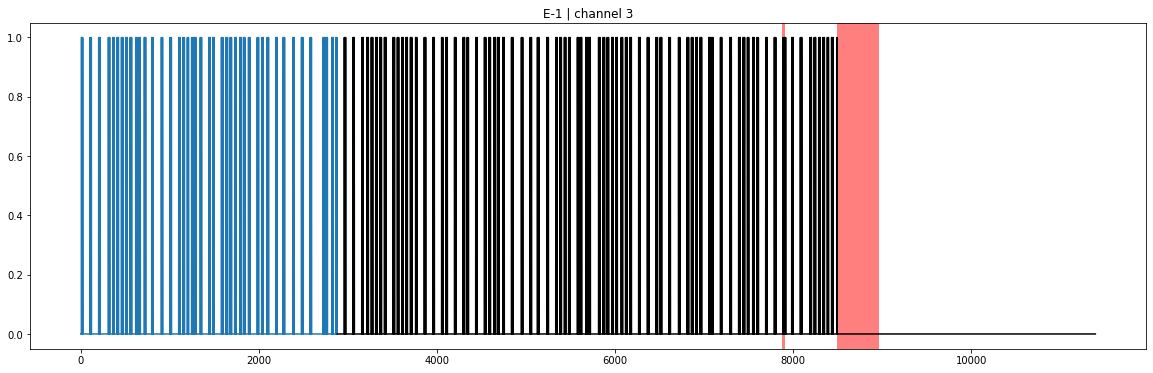

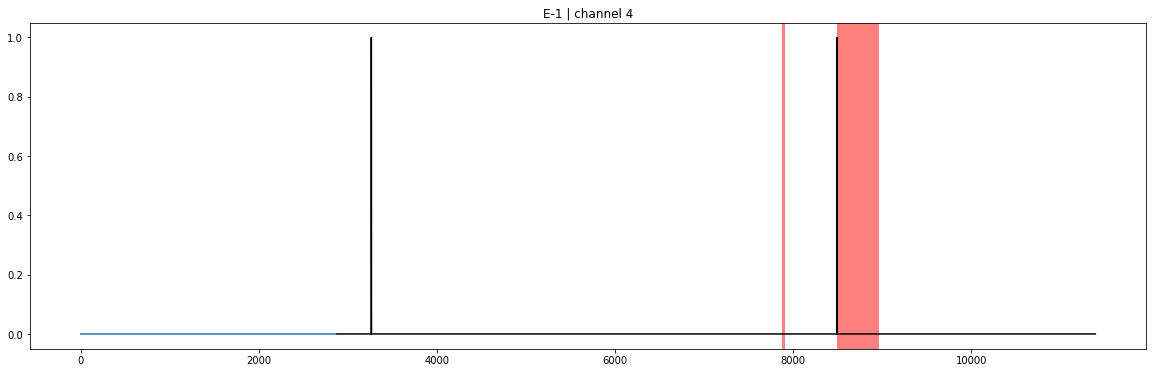

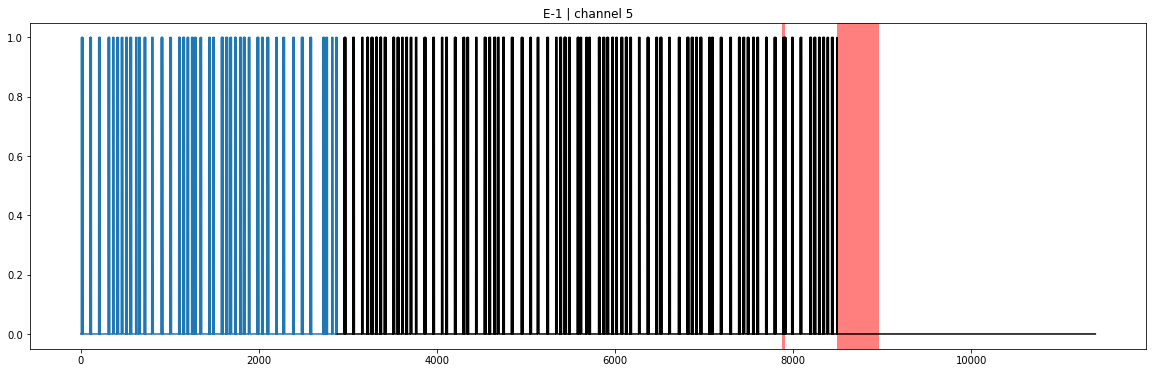

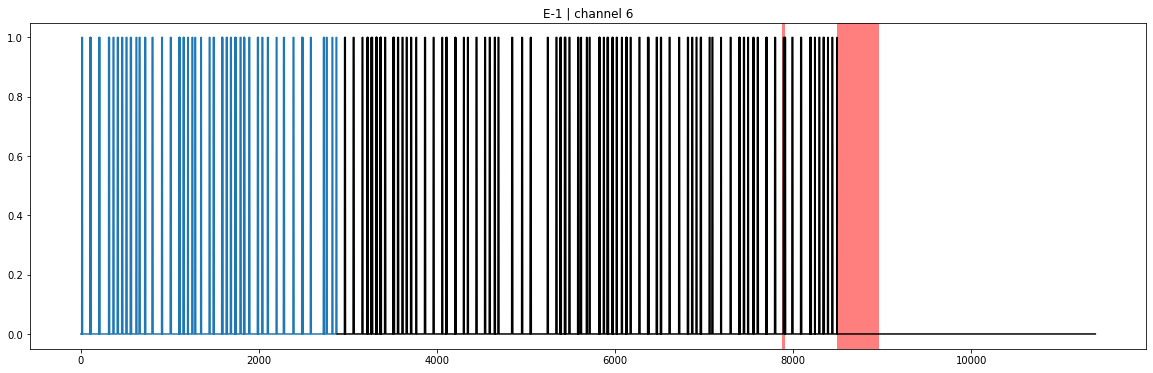

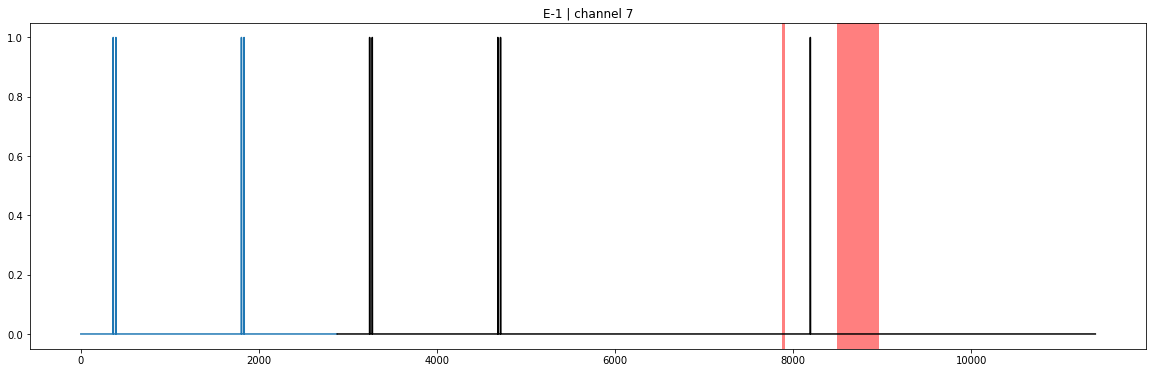

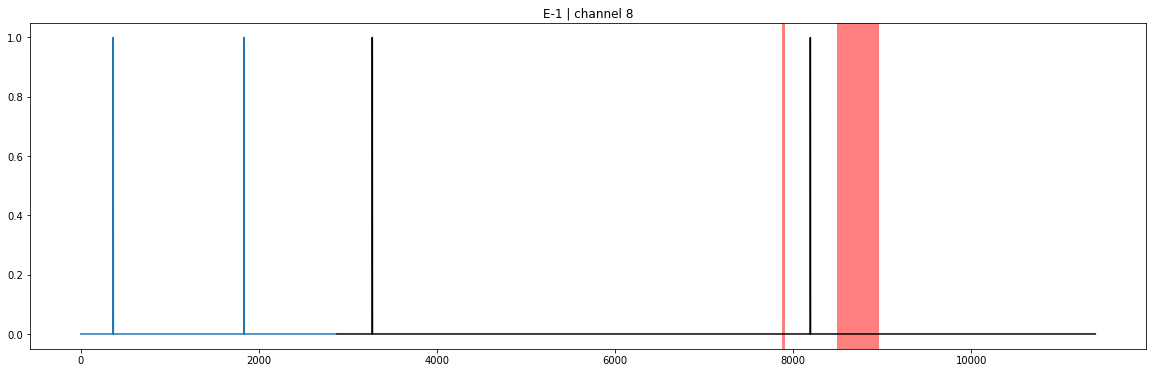

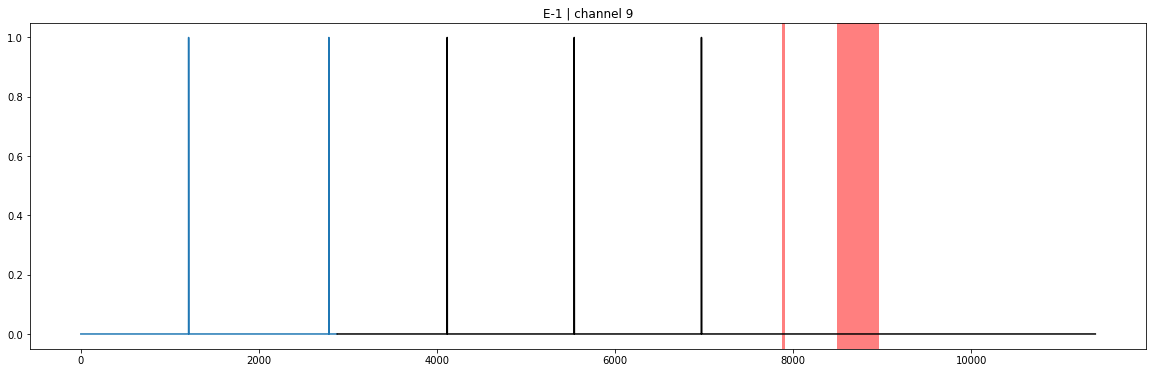

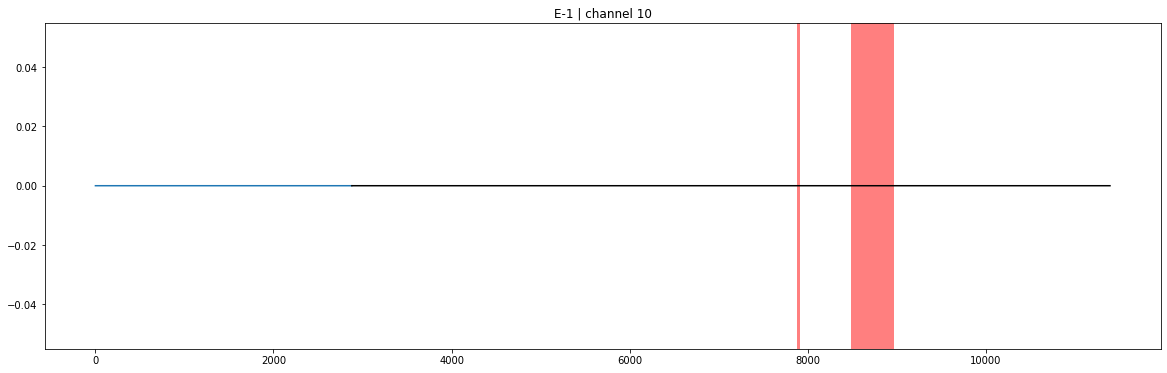

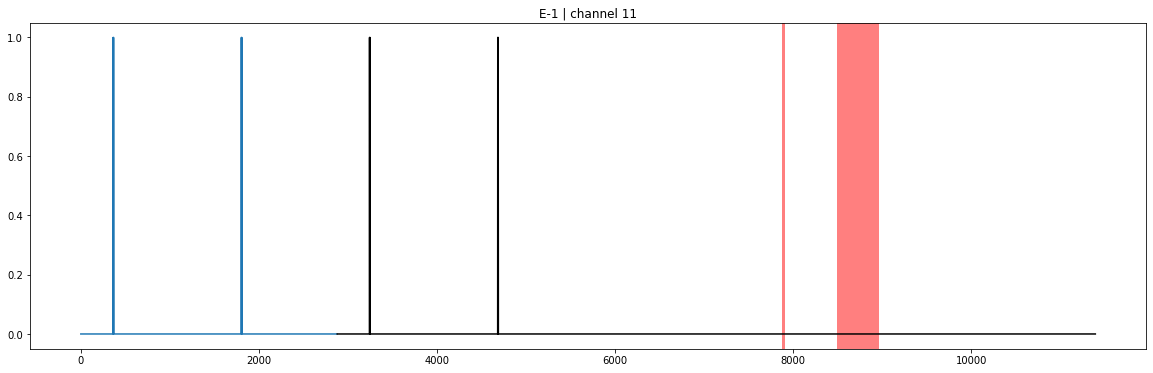

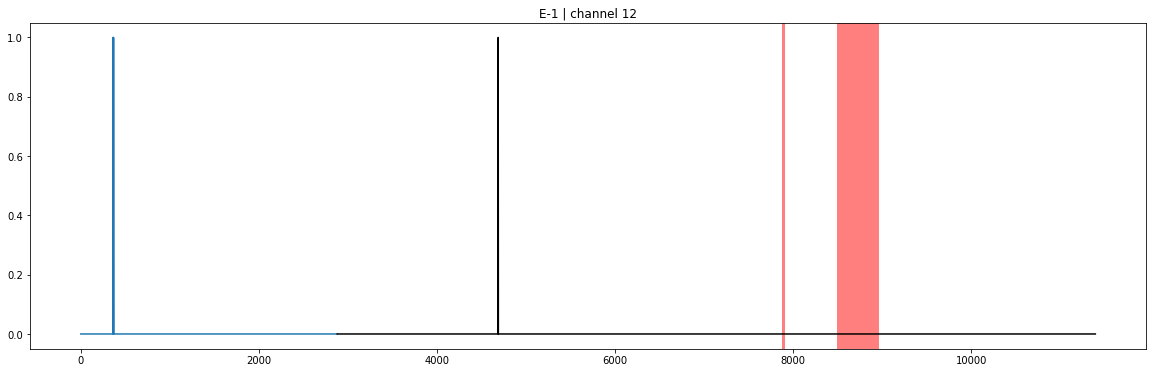

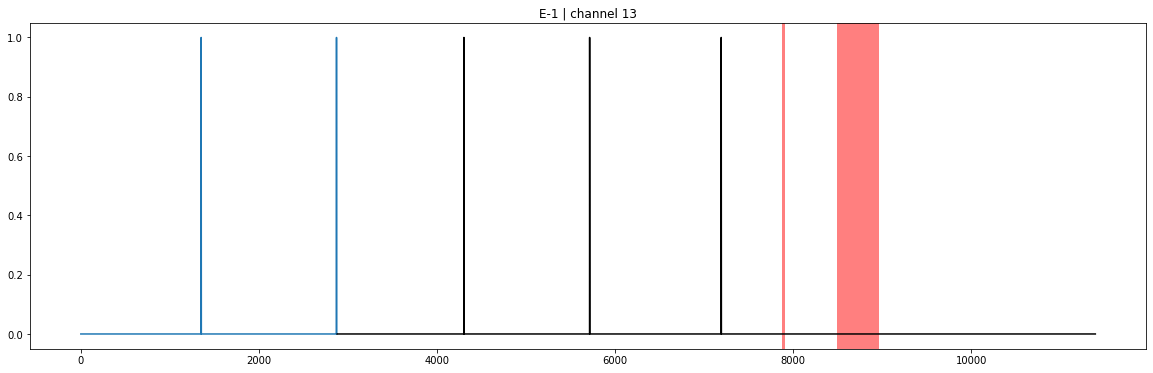

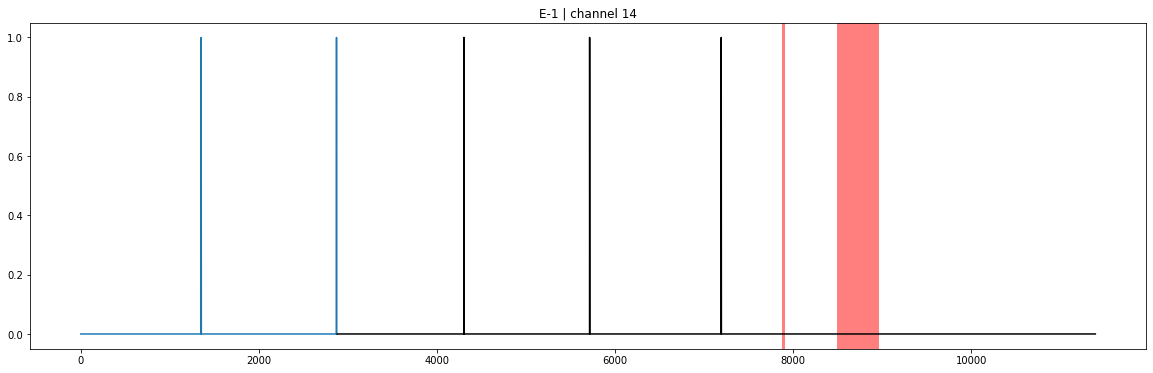

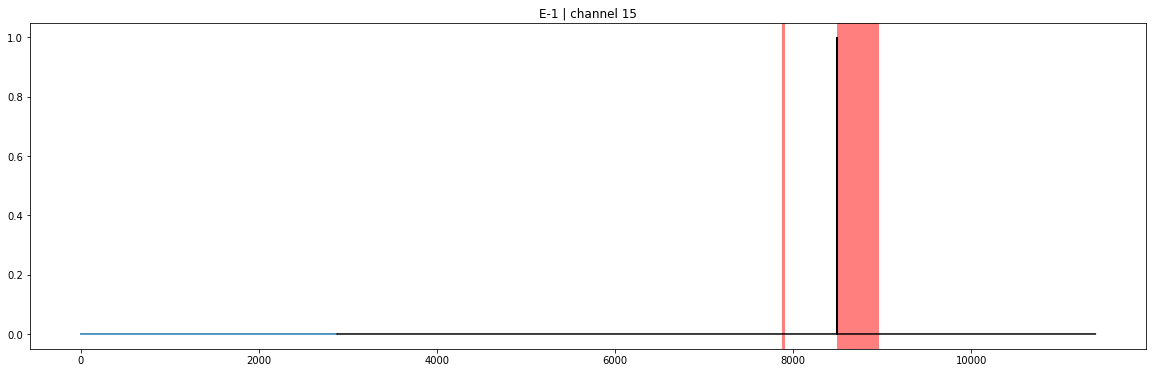

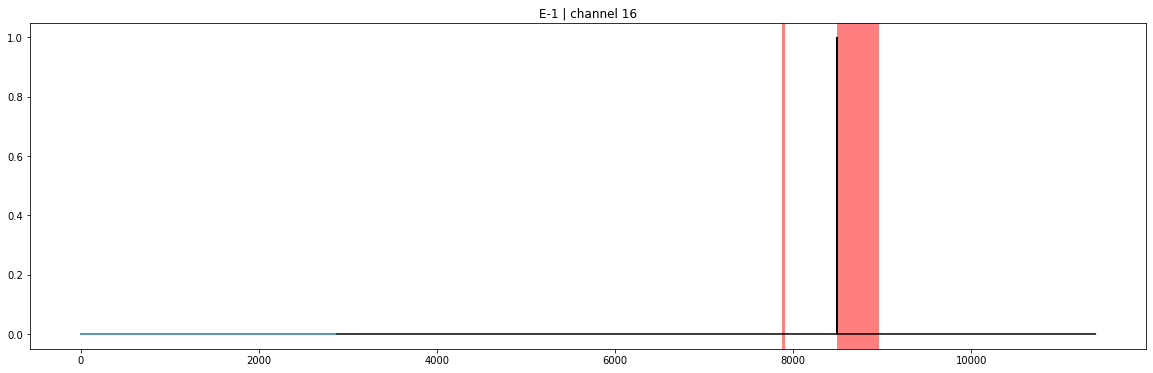

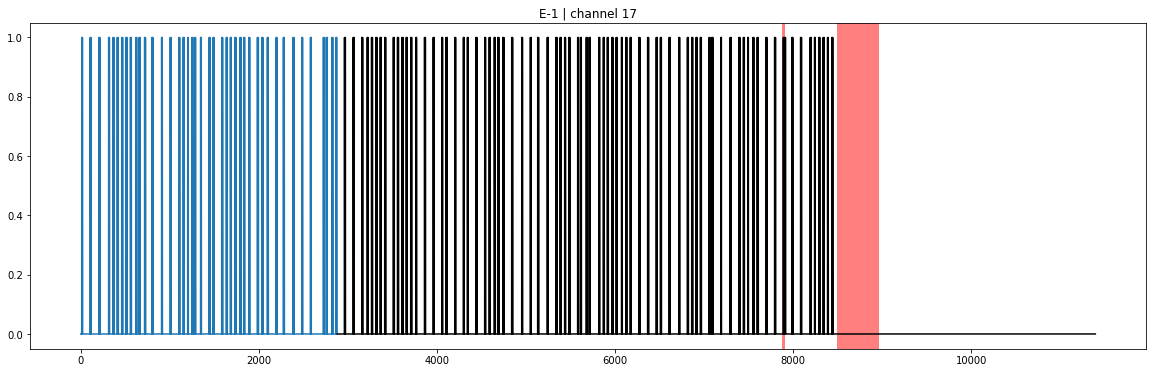

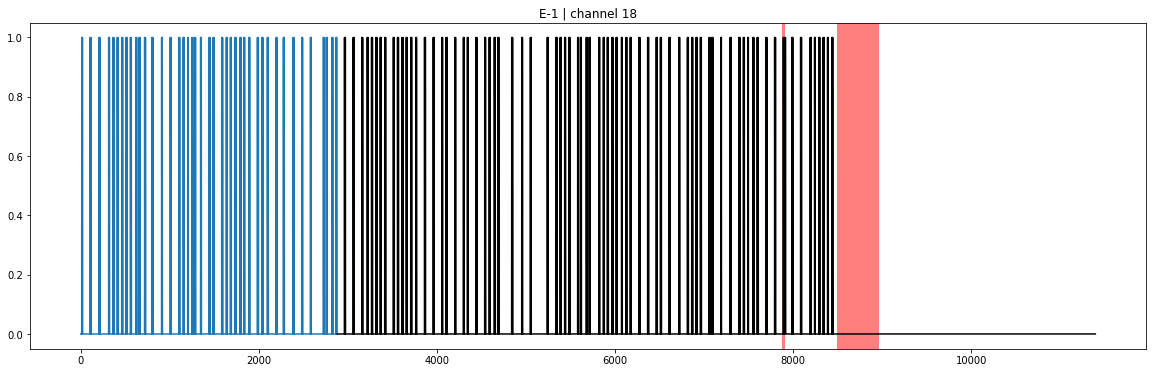

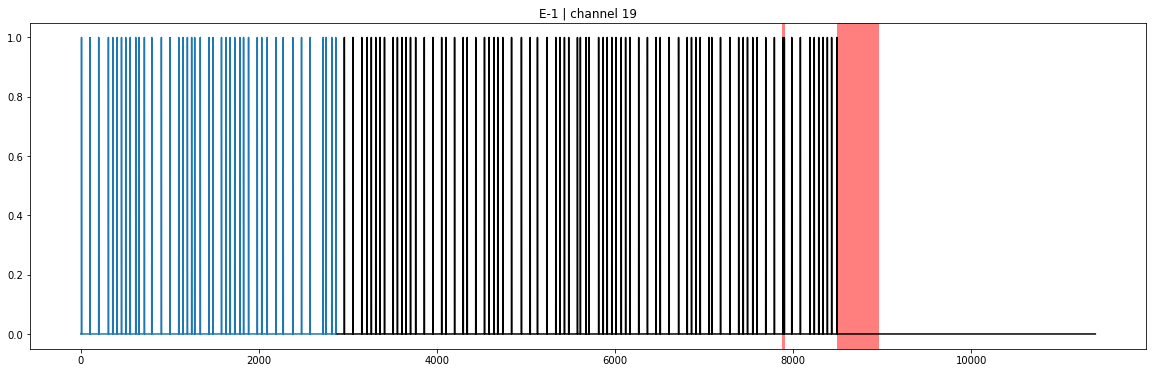

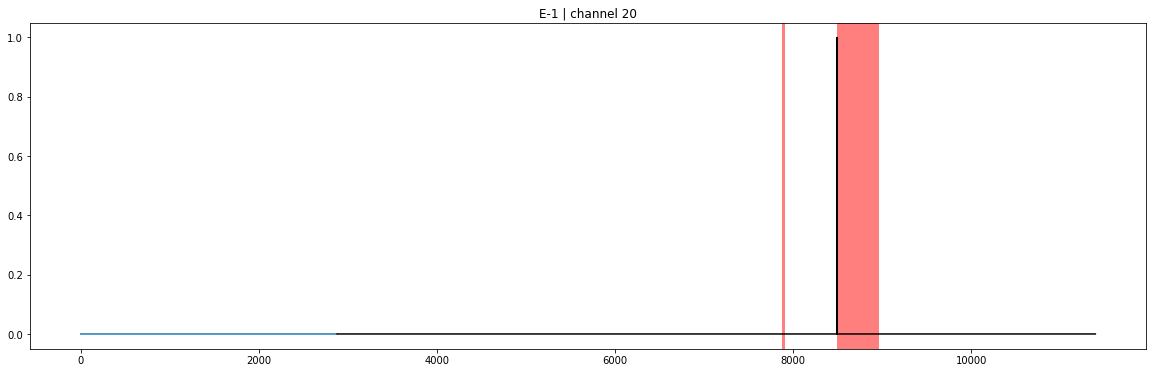

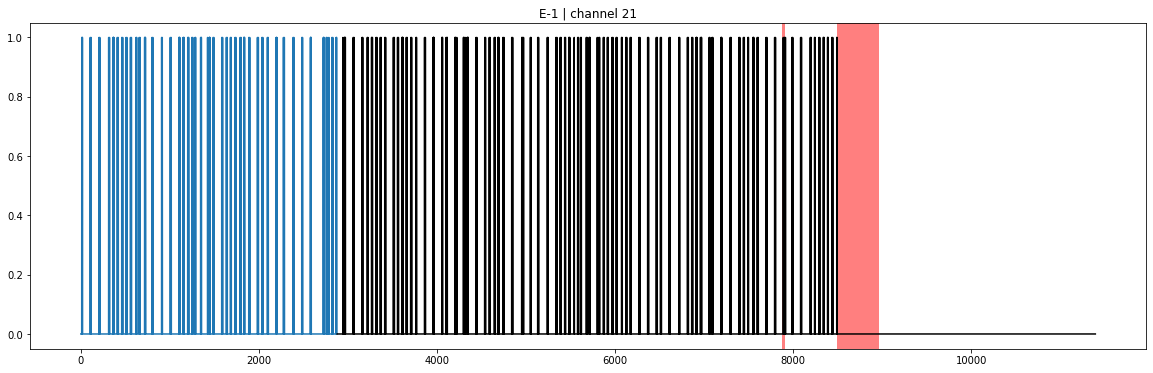

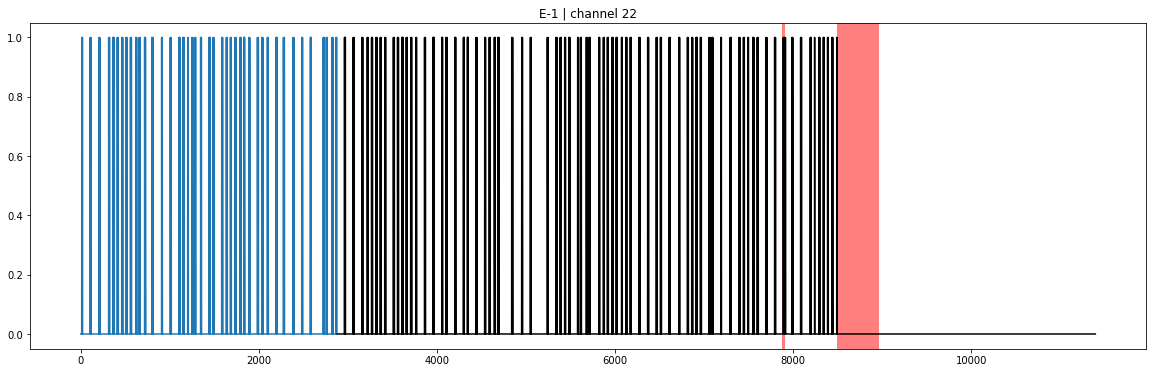

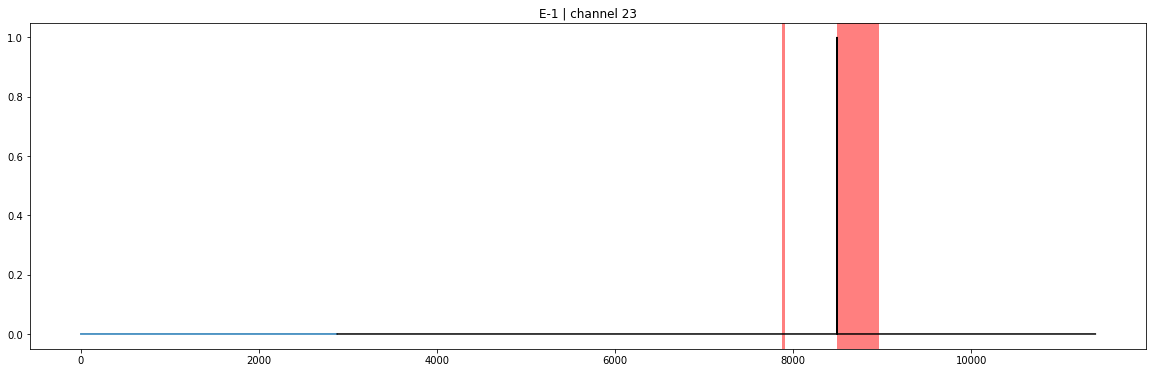

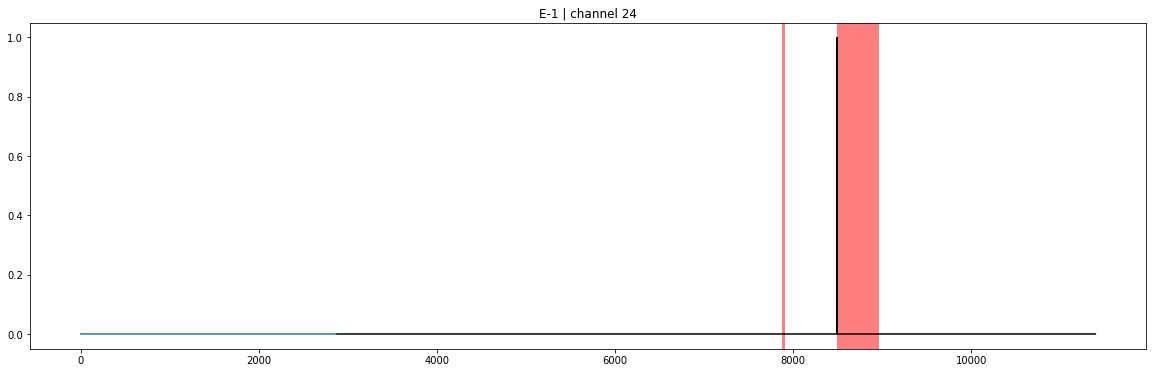

E-1
chan: E-10
[[5000, 5050], [5601, 5871]]


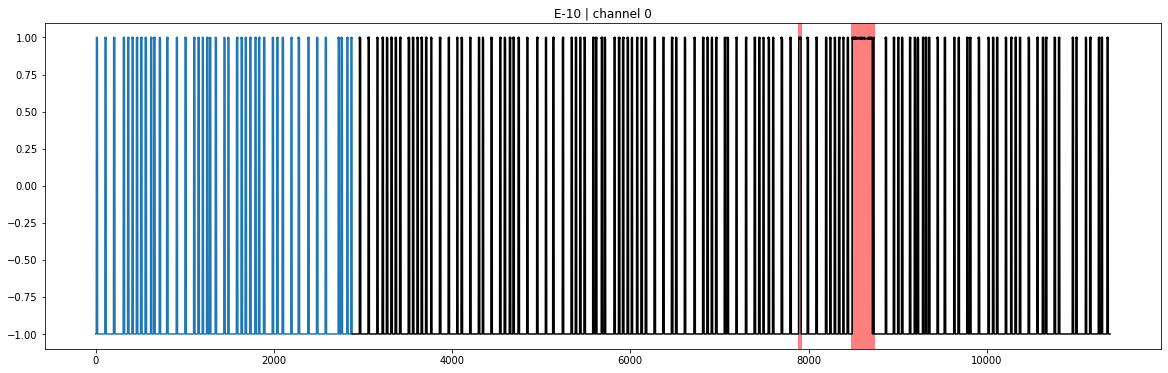

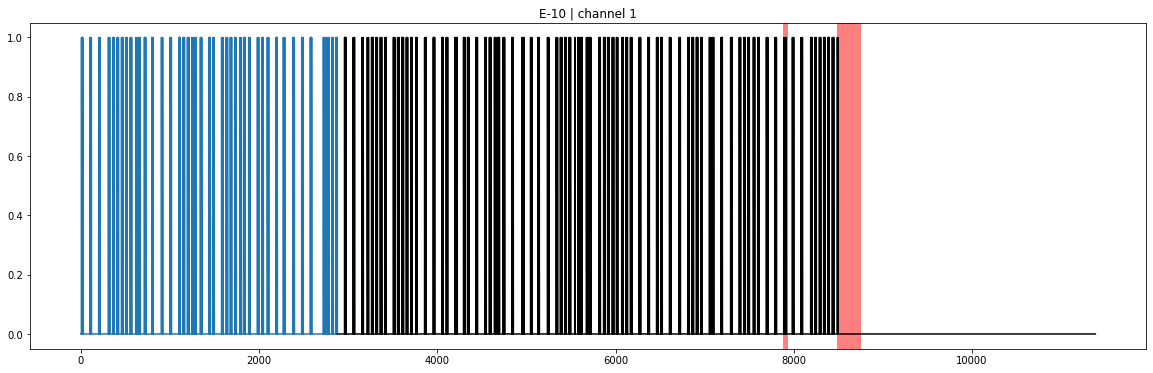

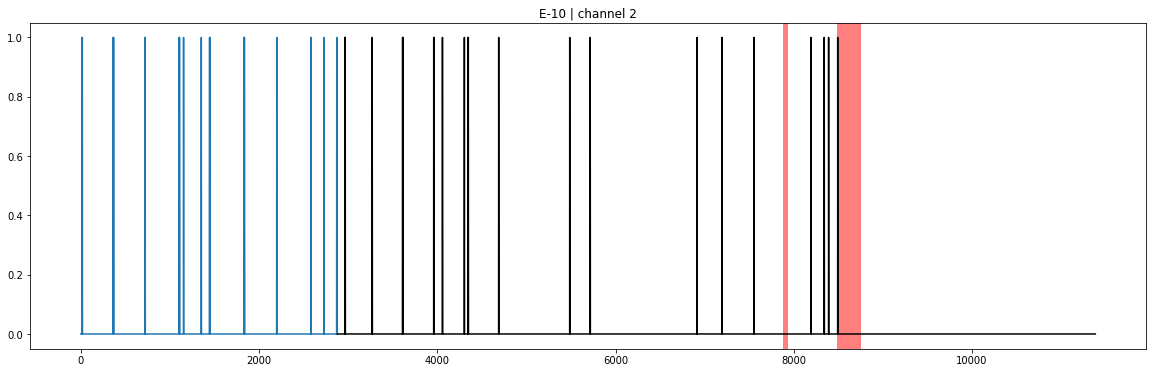

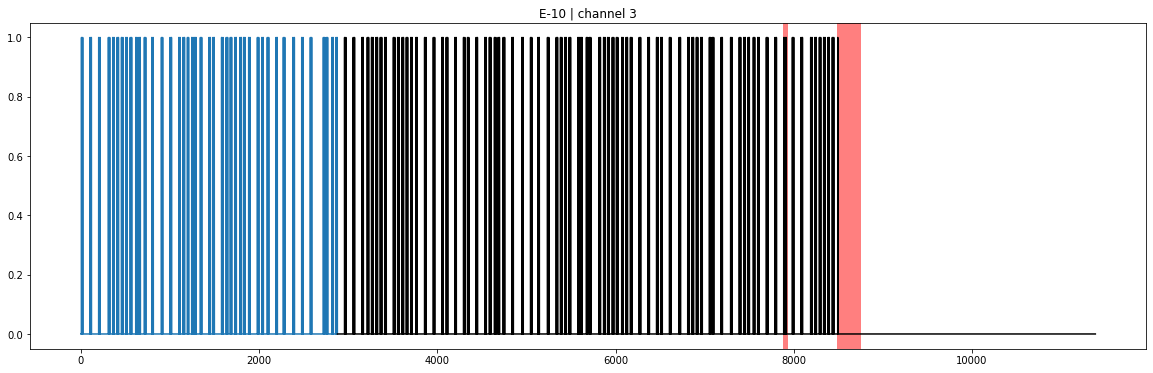

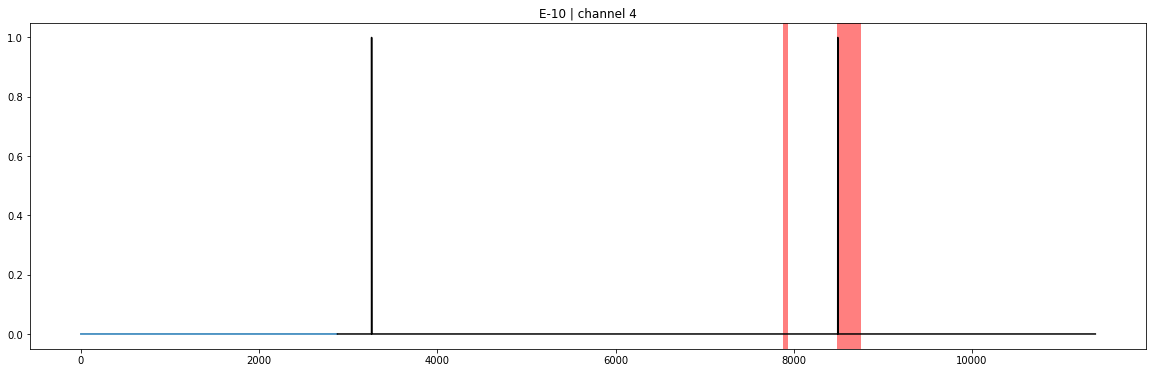

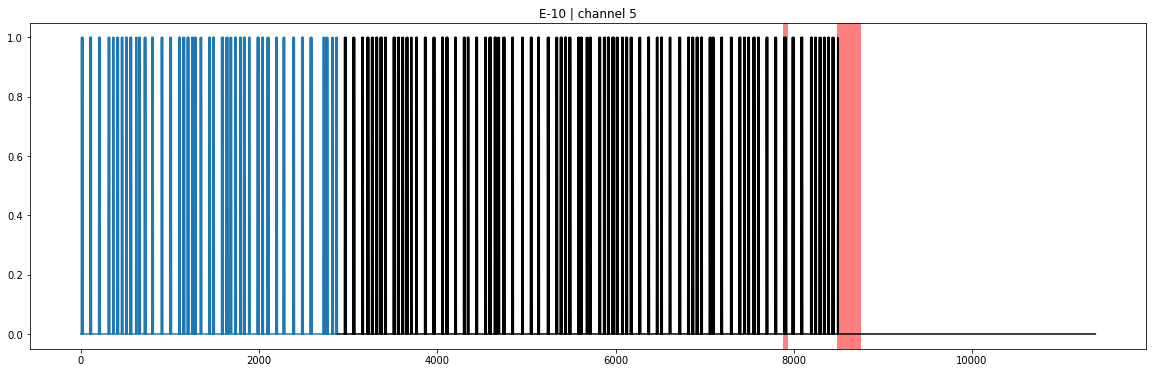

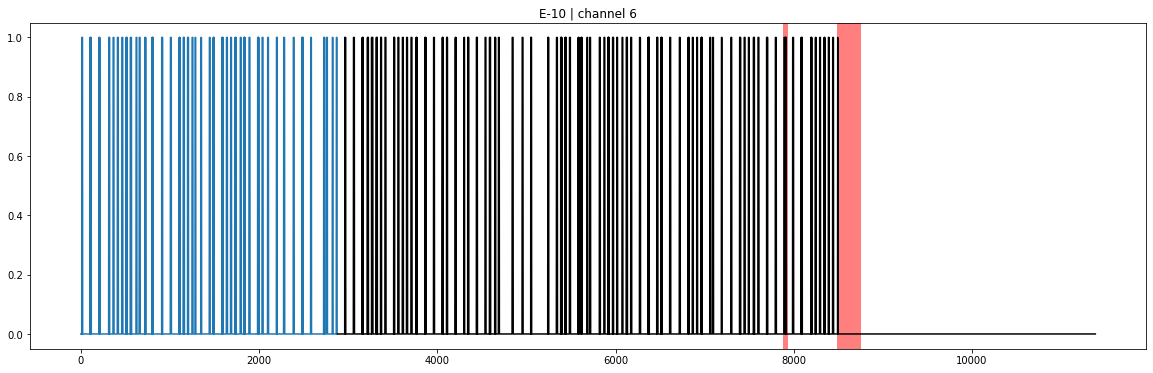

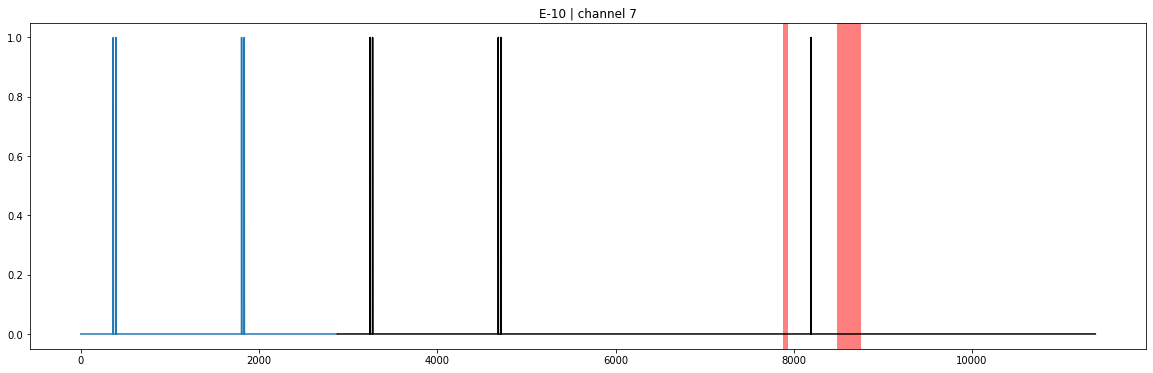

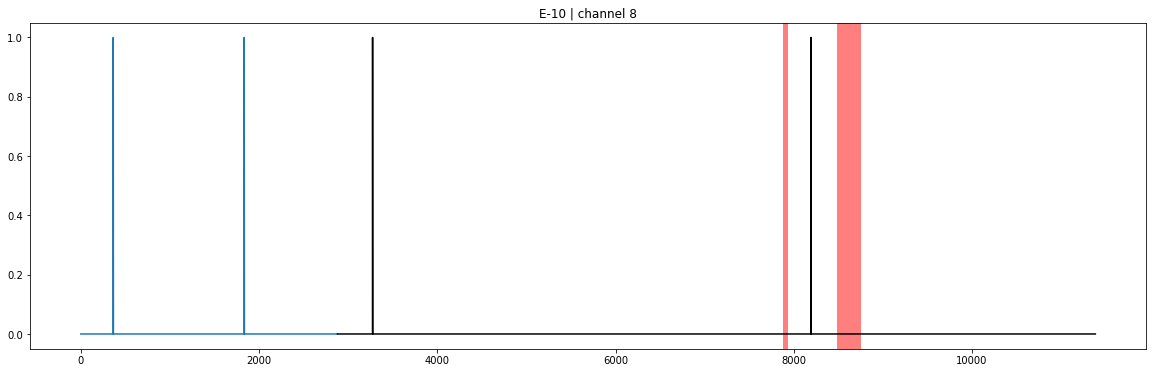

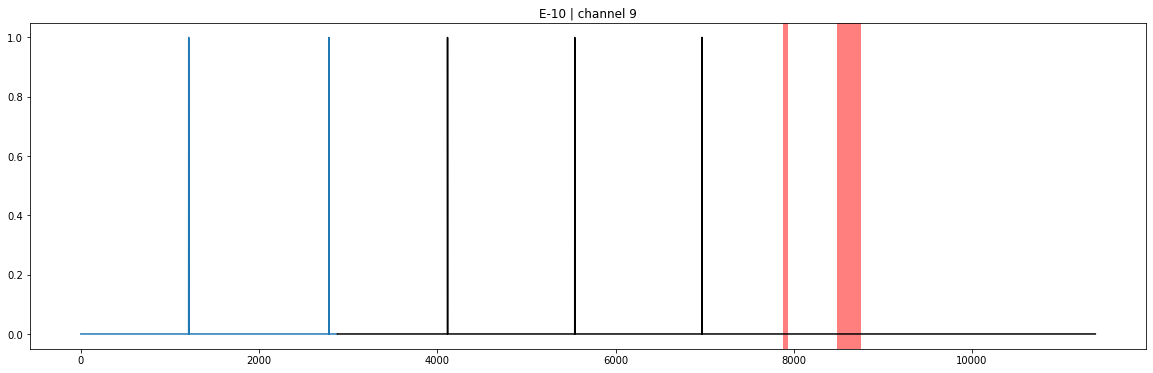

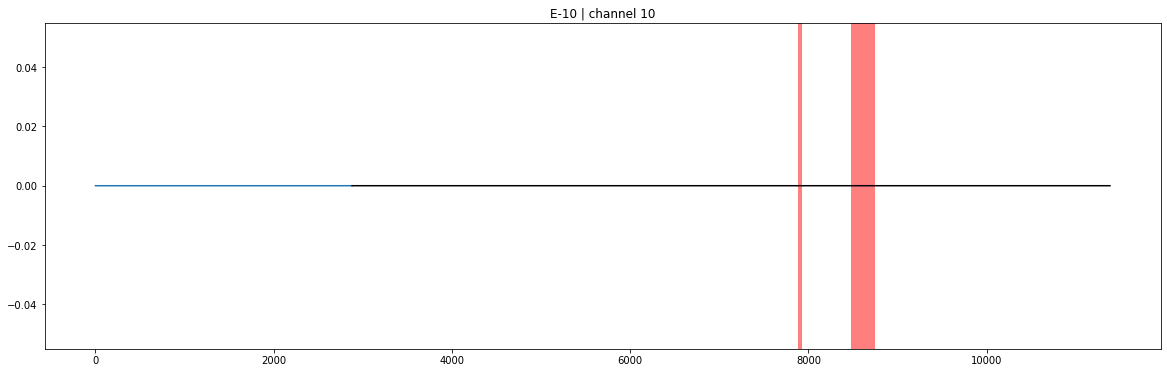

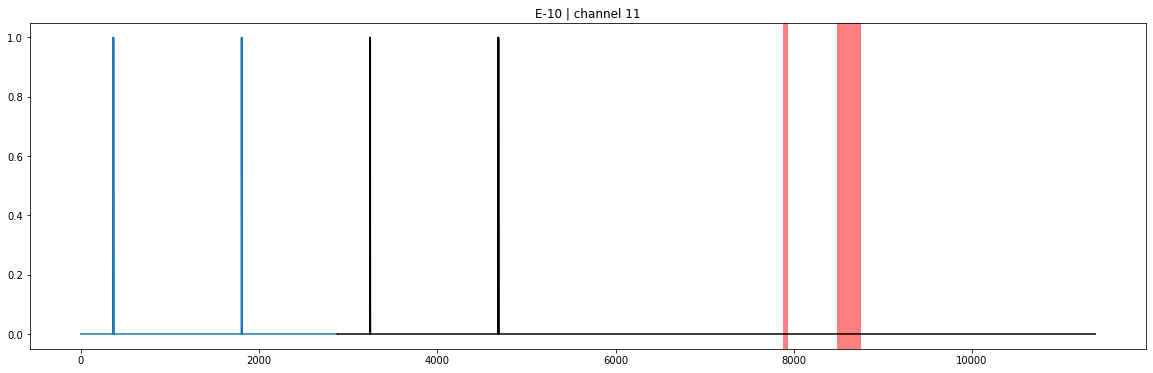

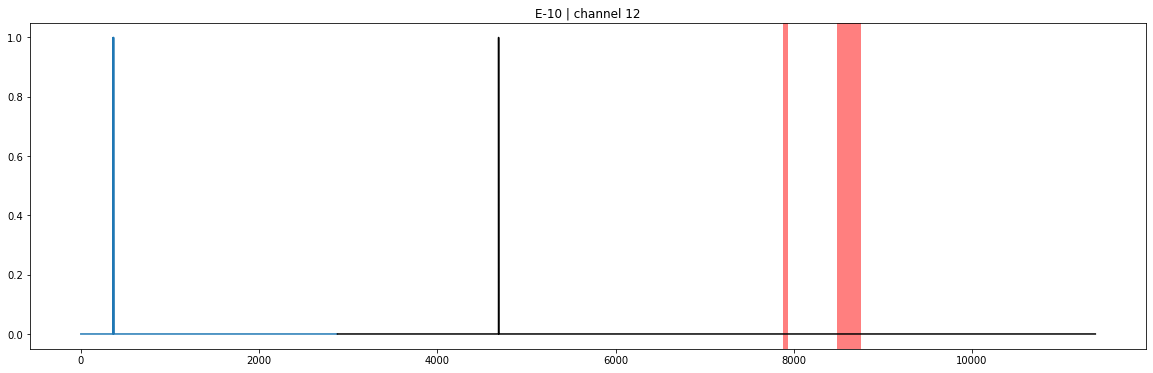

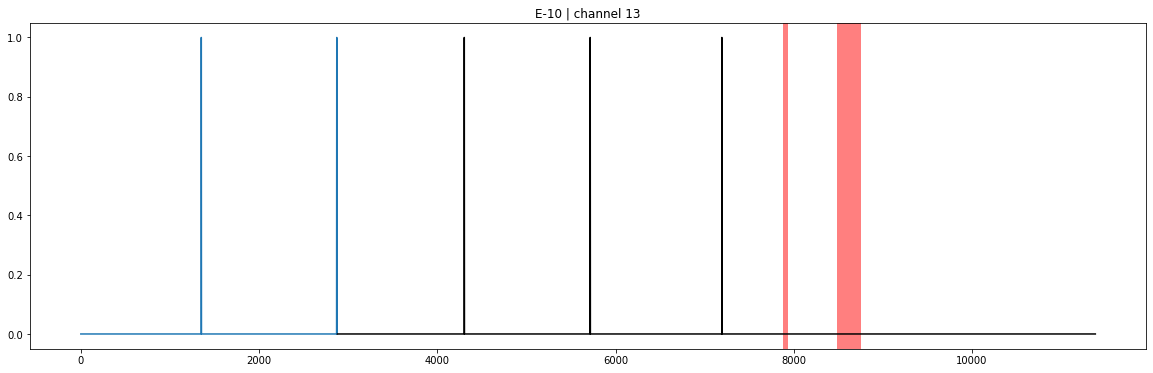

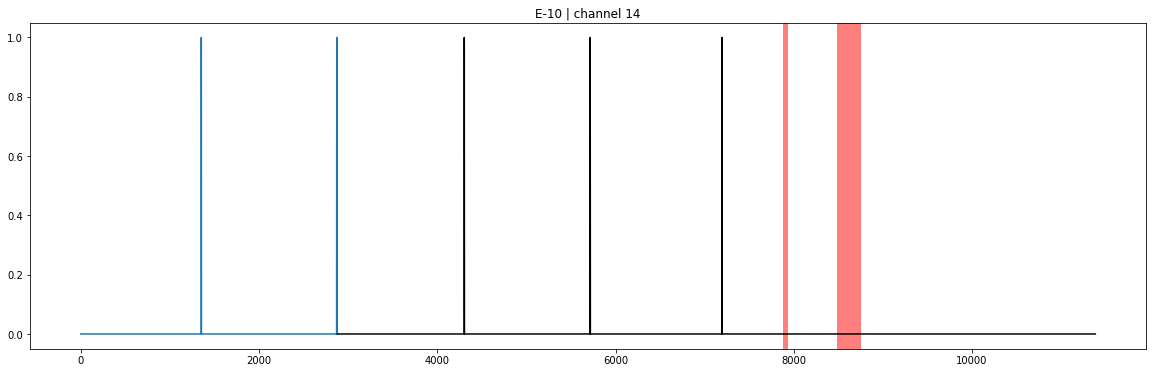

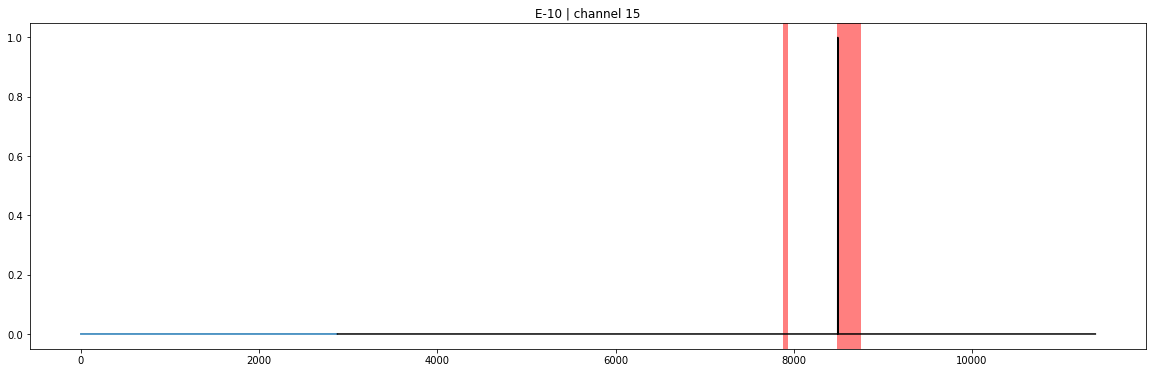

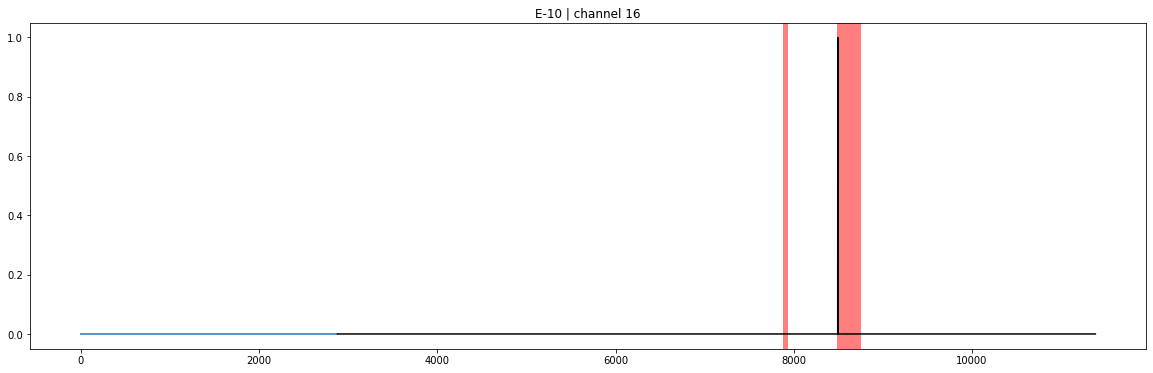

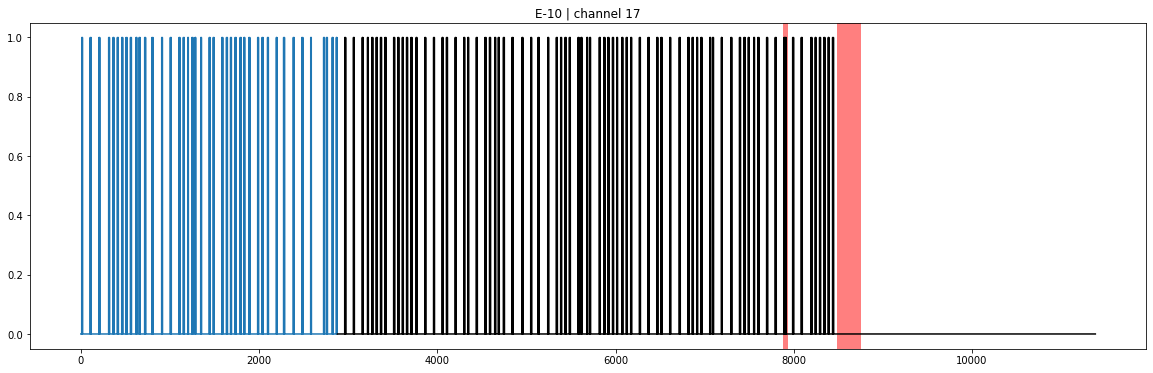

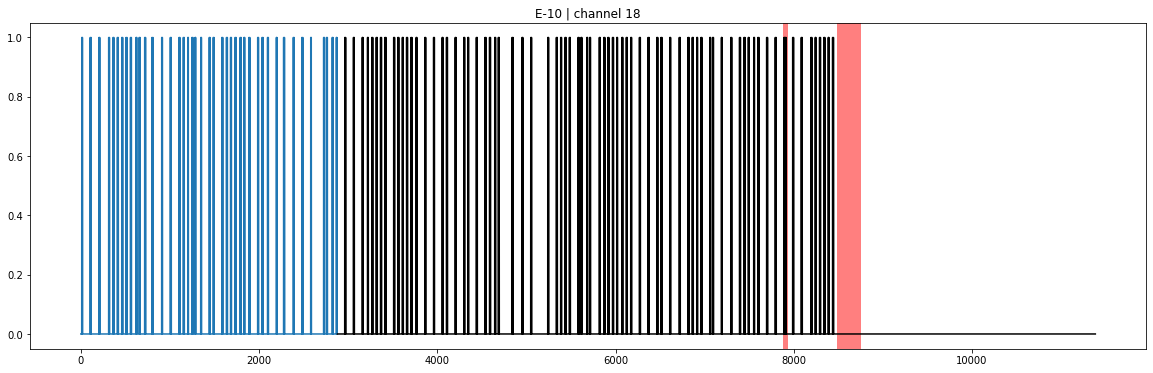

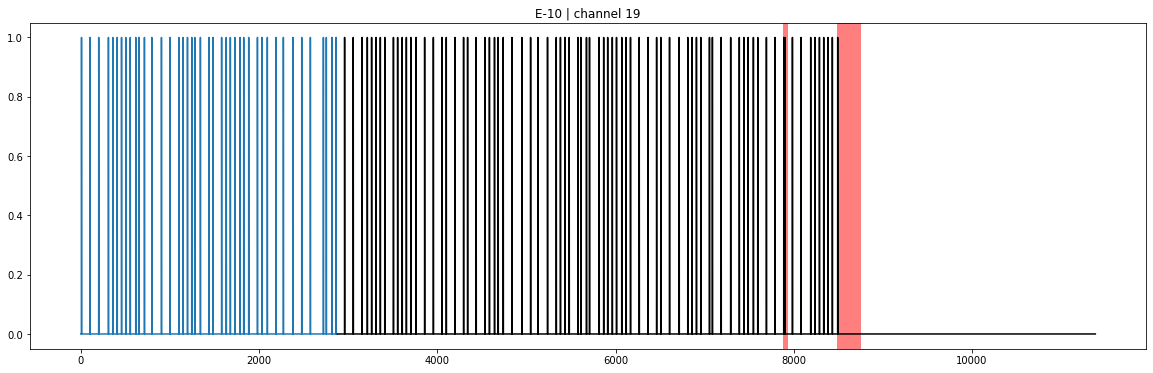

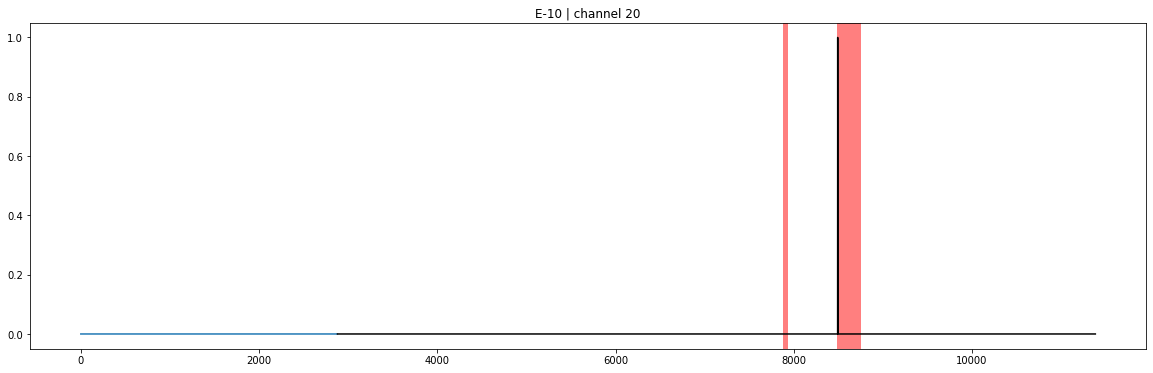

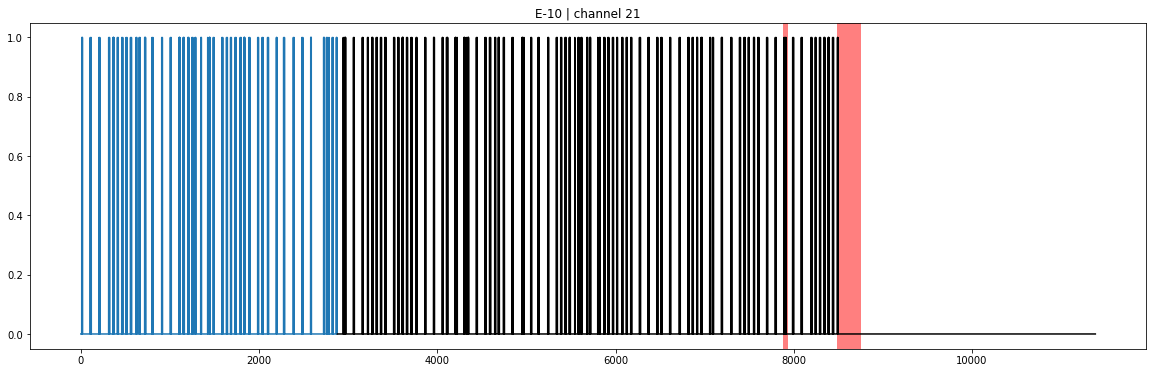

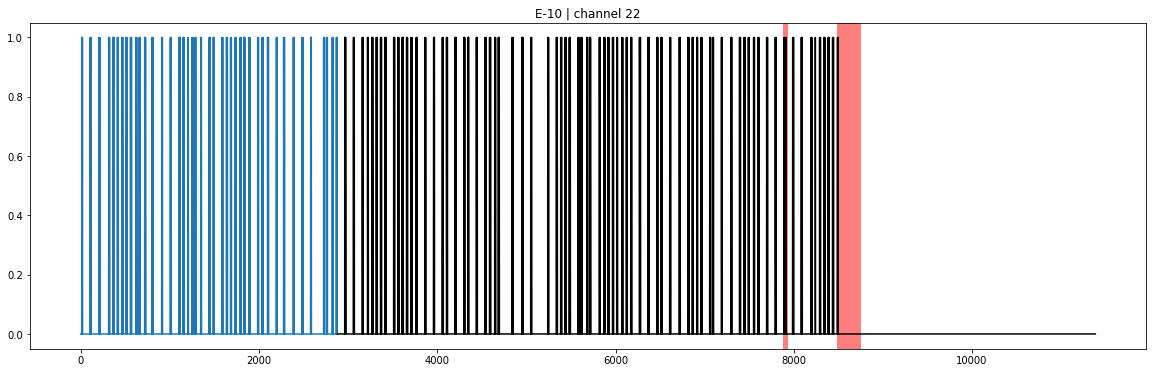

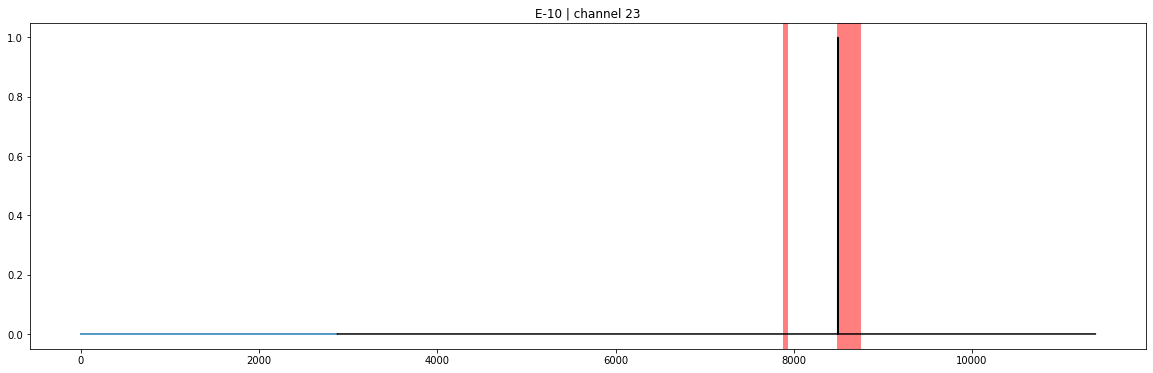

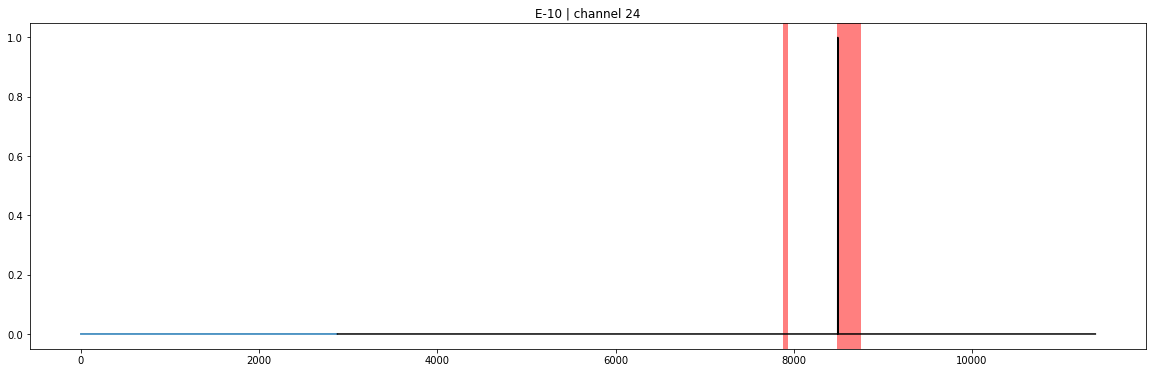

E-10
chan: E-11
[[5000, 5050], [5614, 5857]]


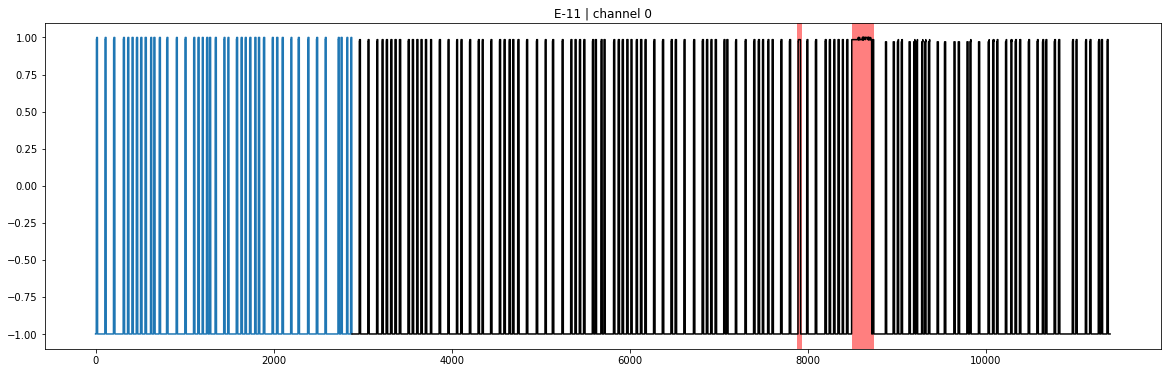

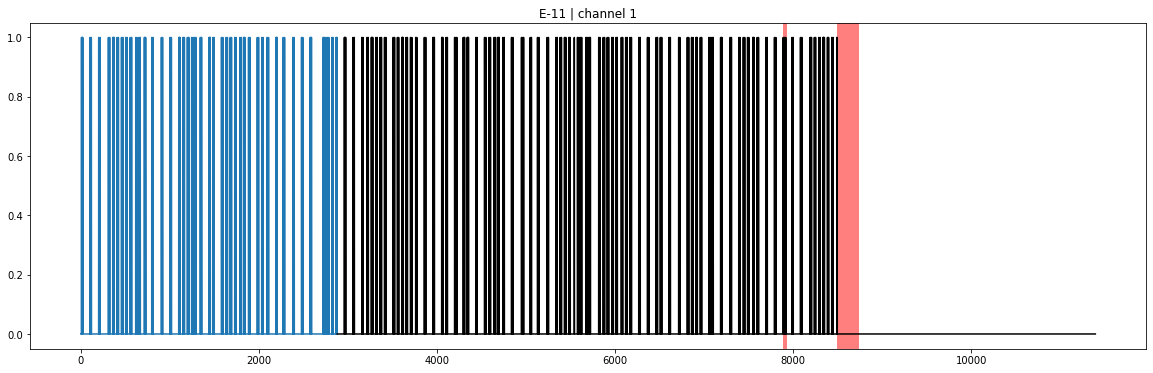

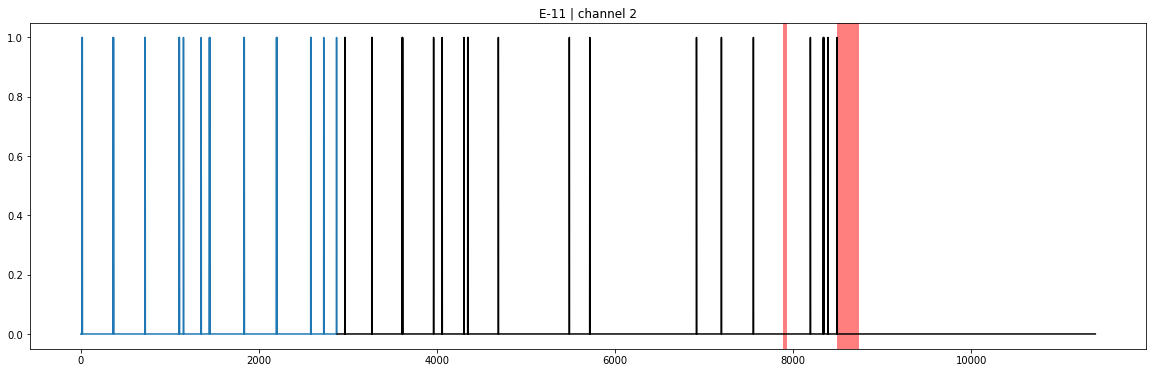

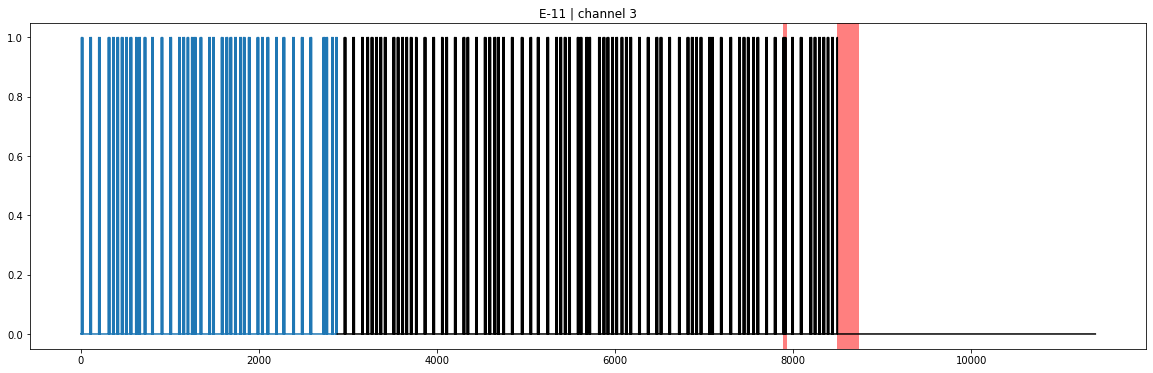

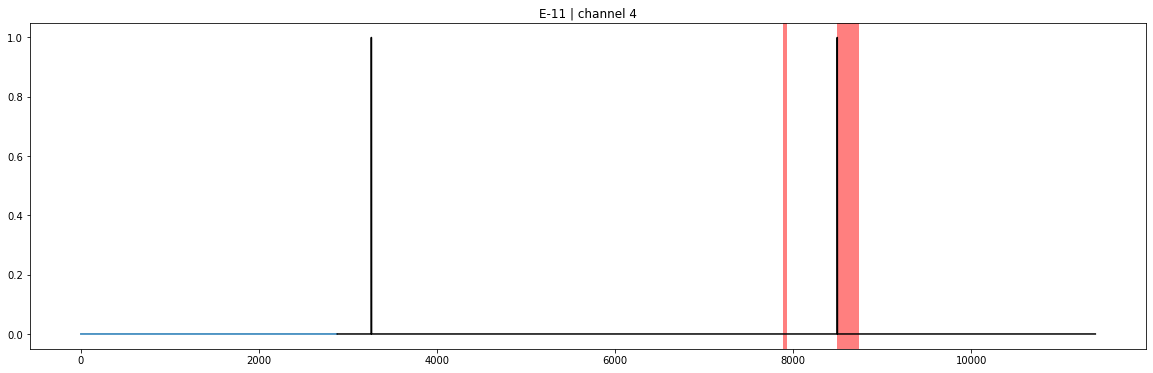

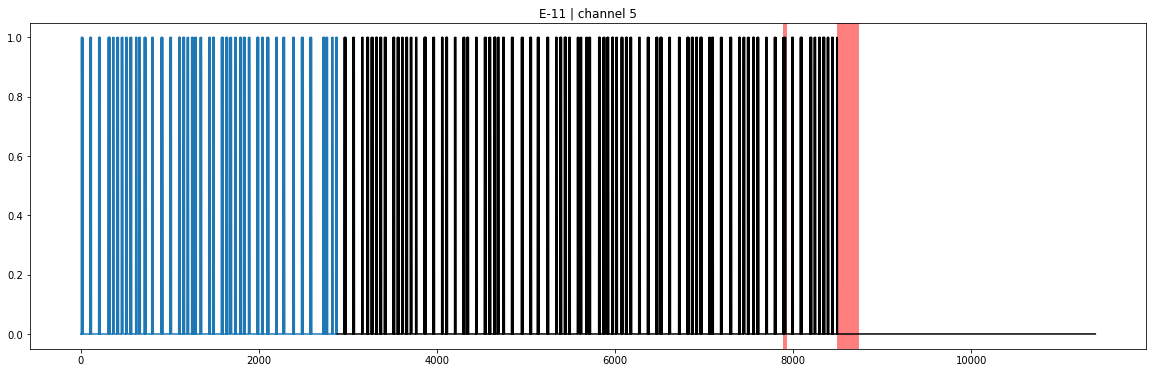

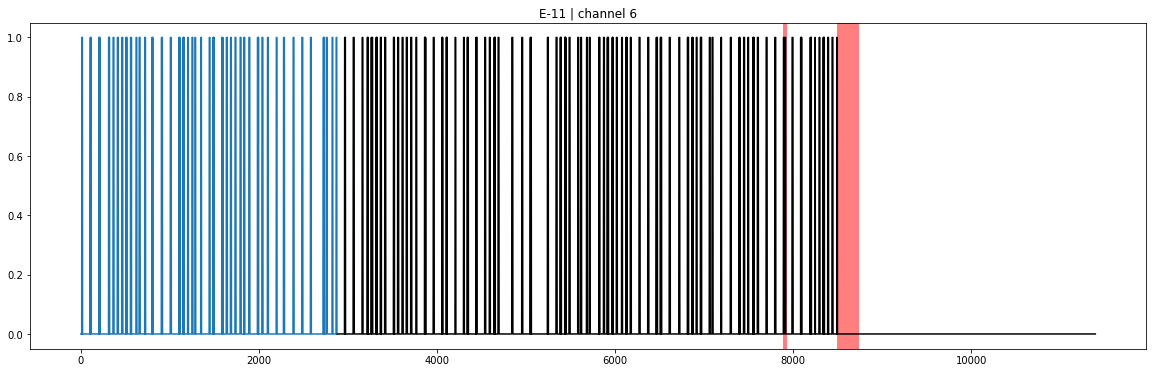

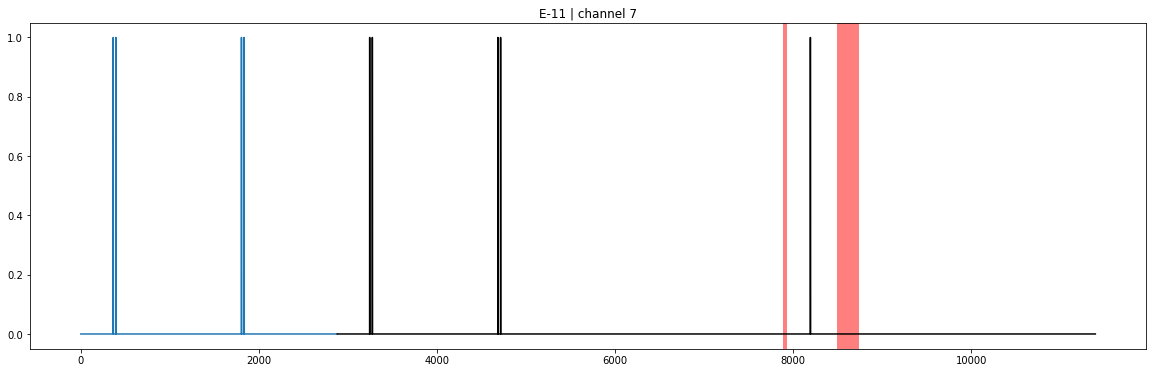

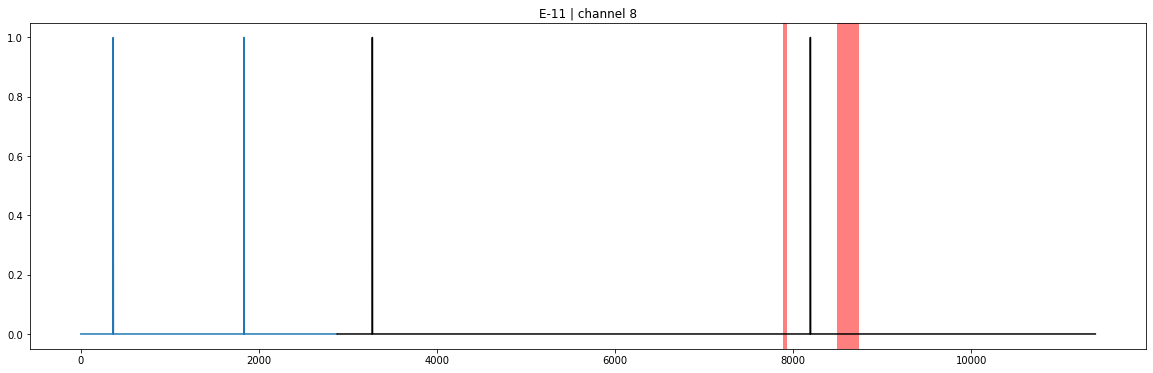

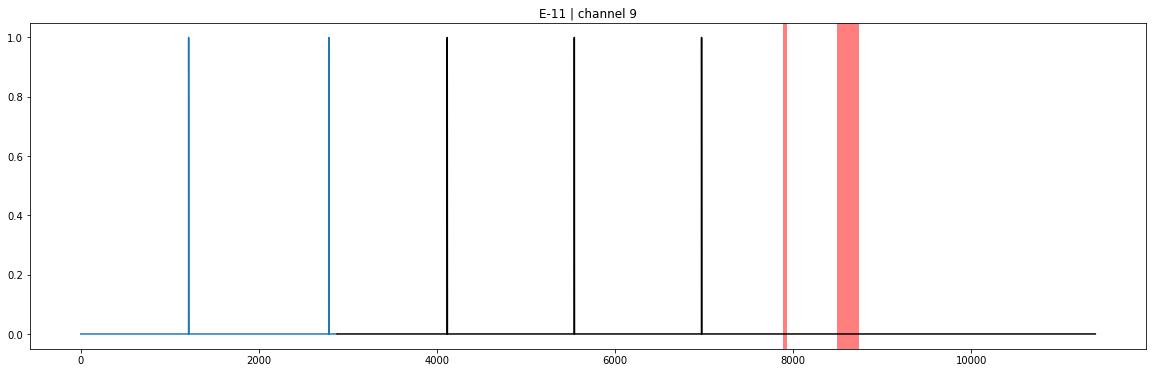

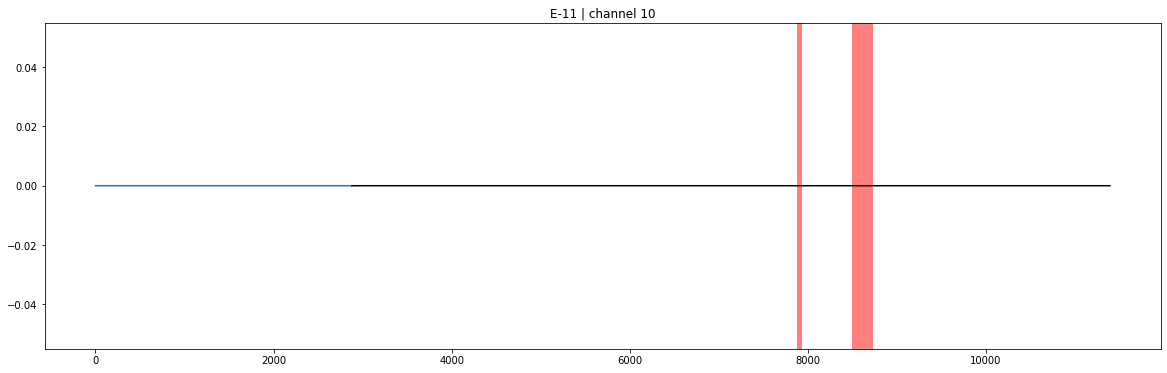

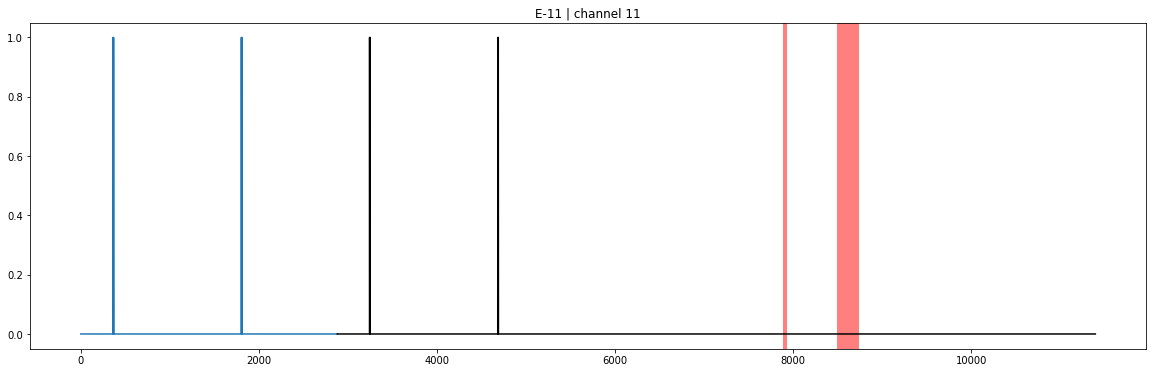

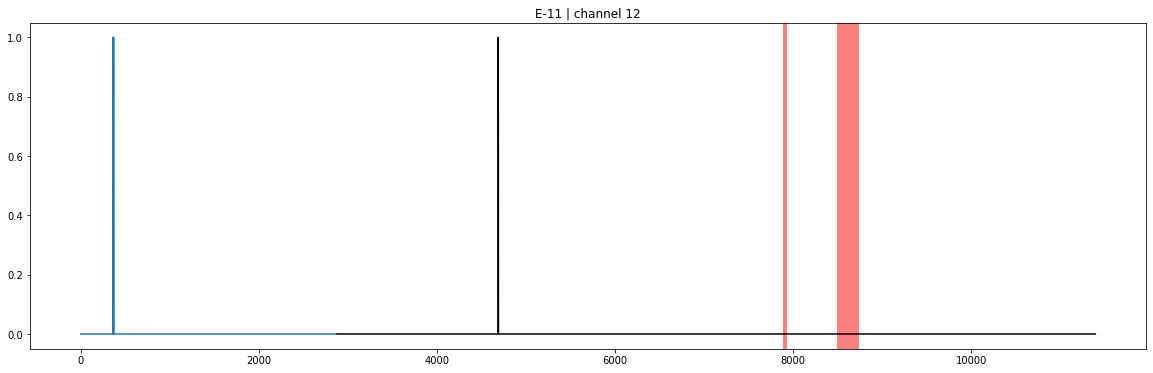

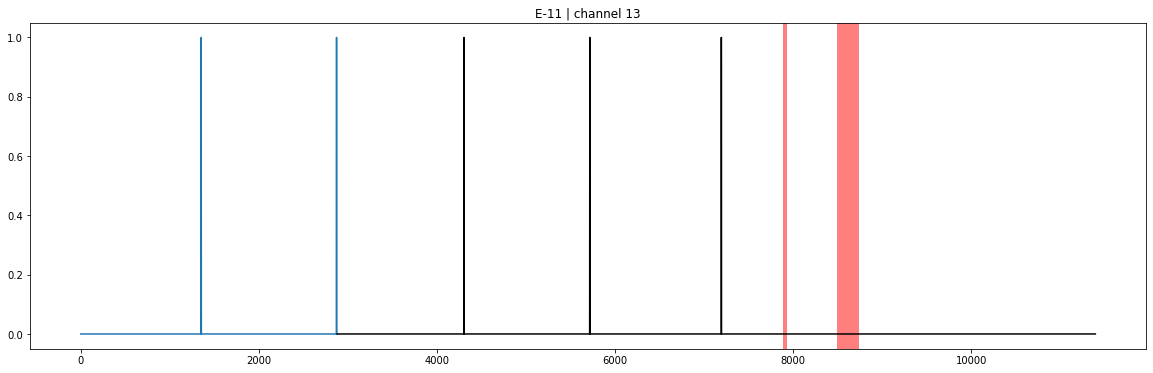

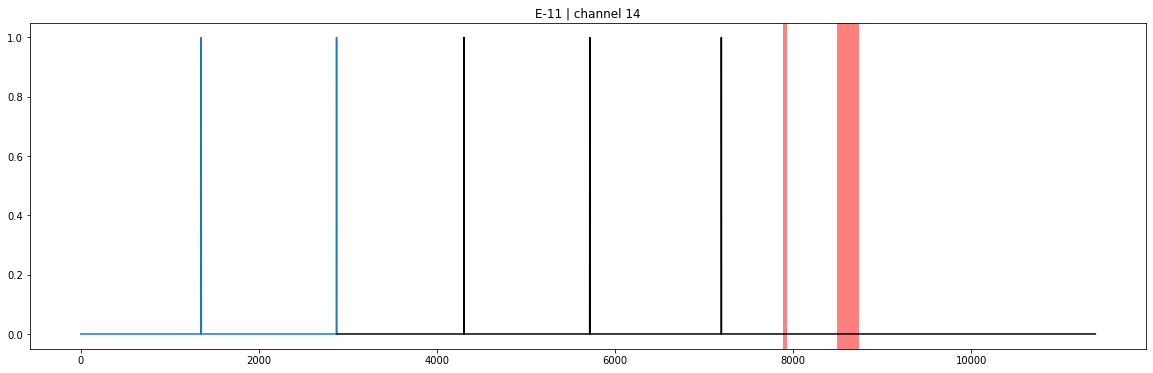

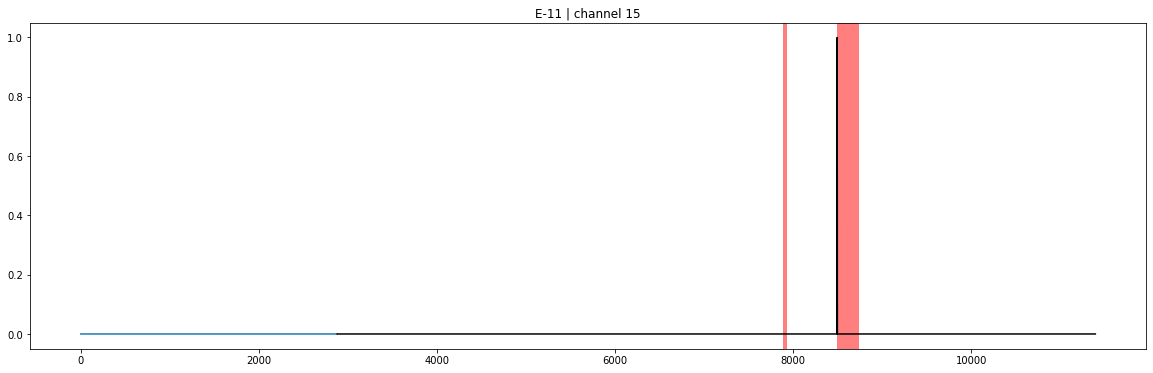

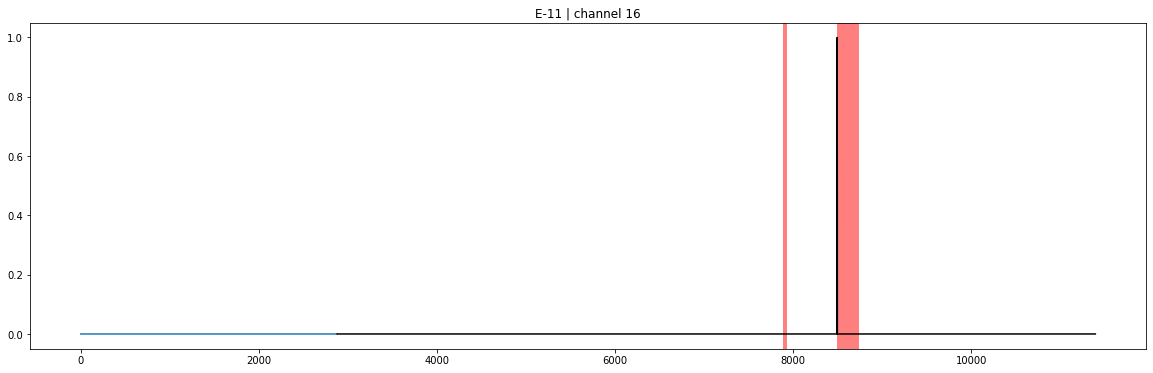

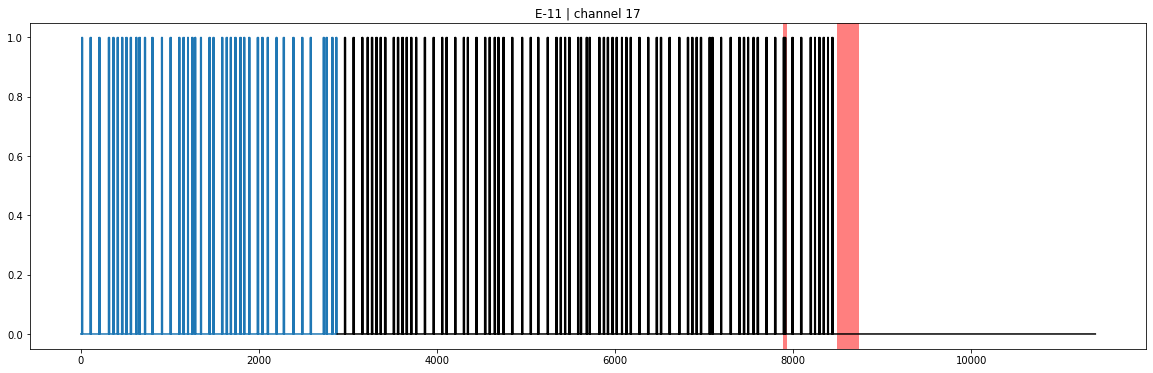

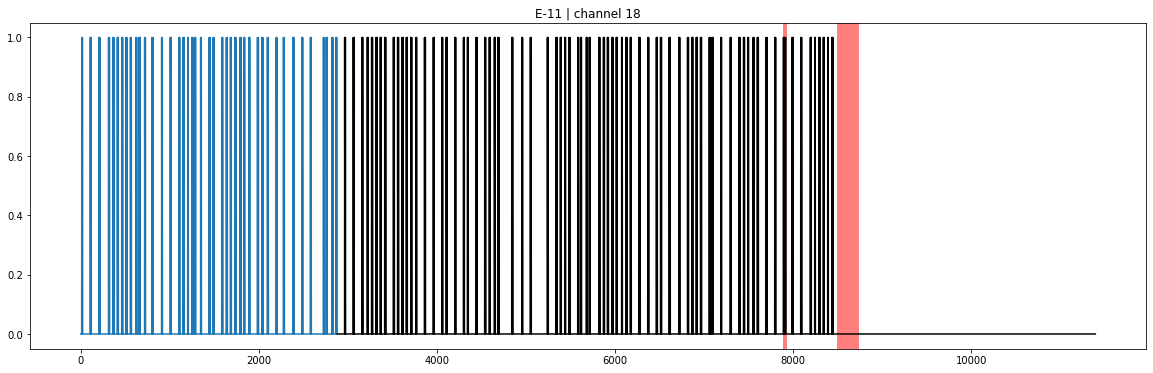

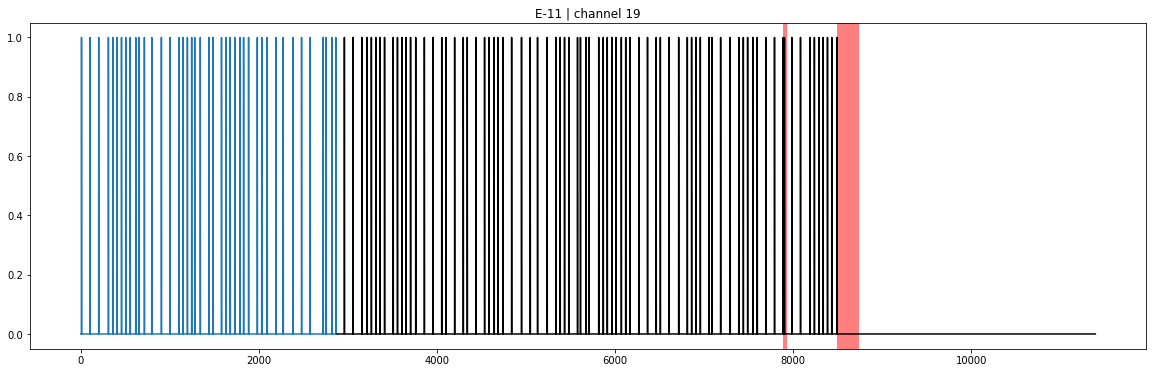

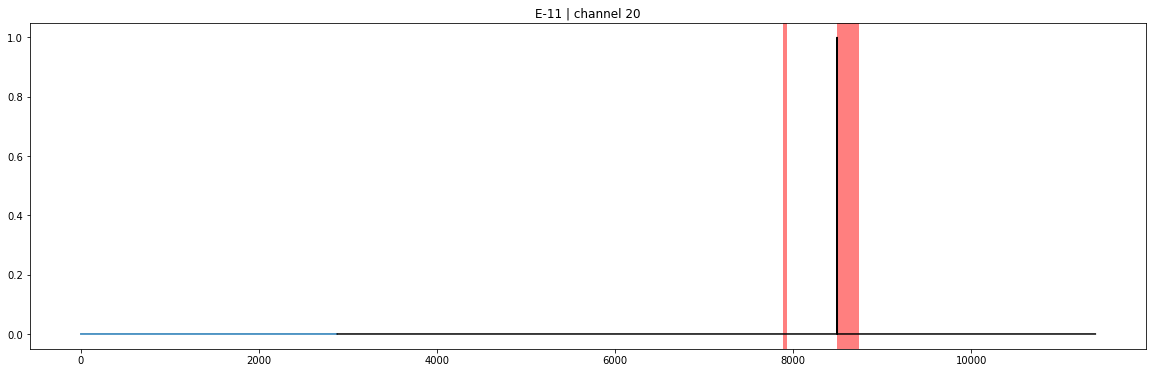

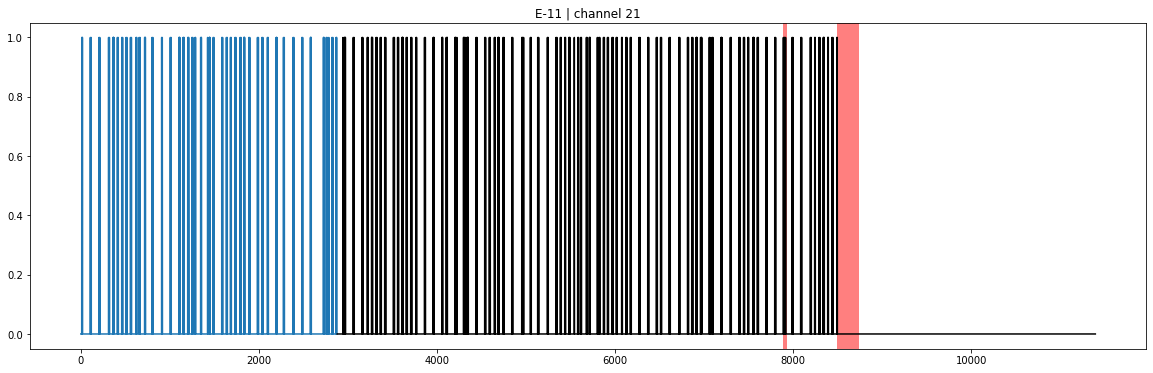

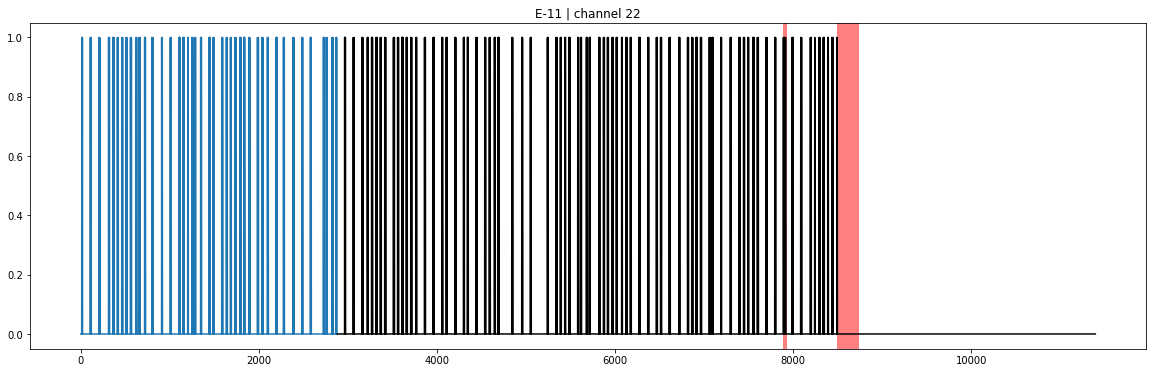

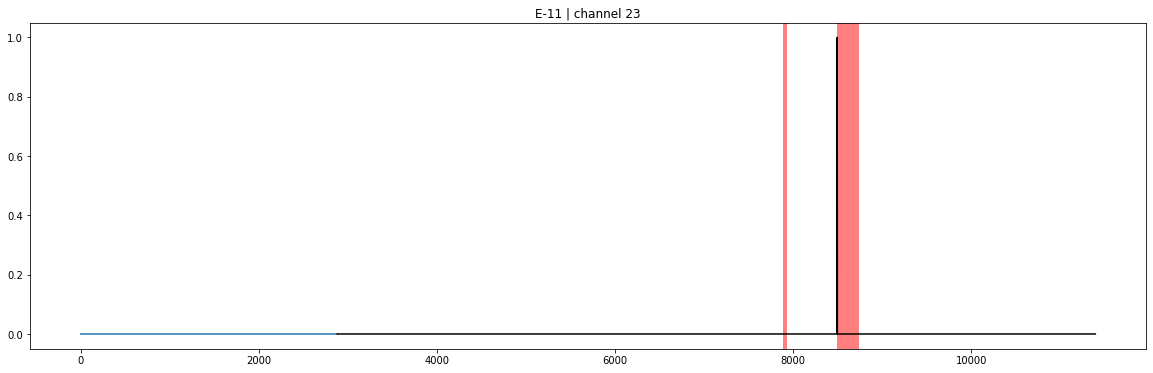

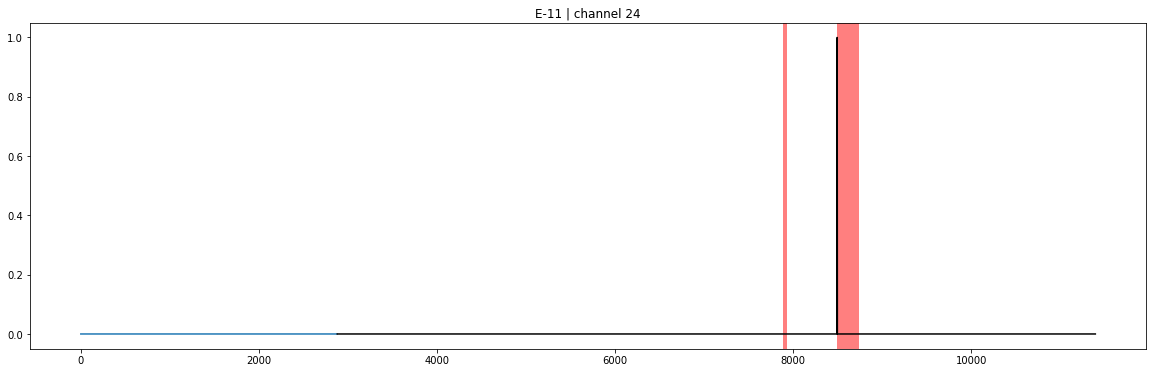

E-11
chan: E-12
[[5610, 6141], [5000, 5050]]


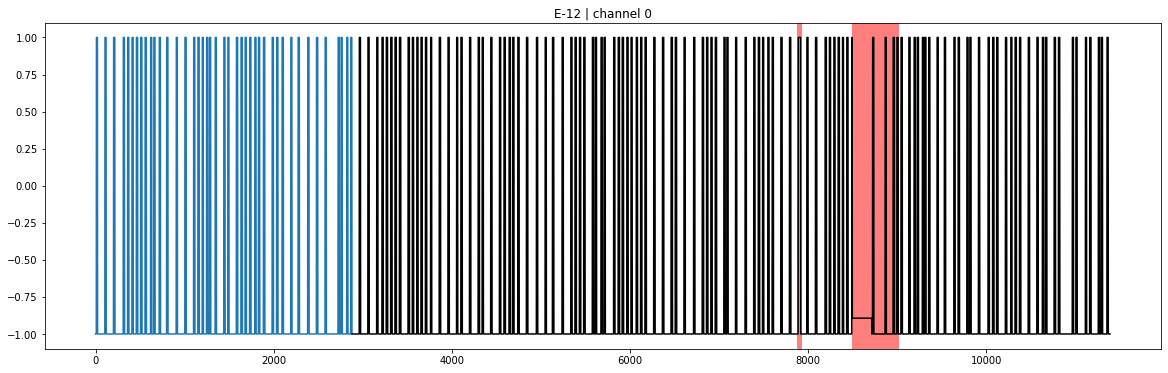

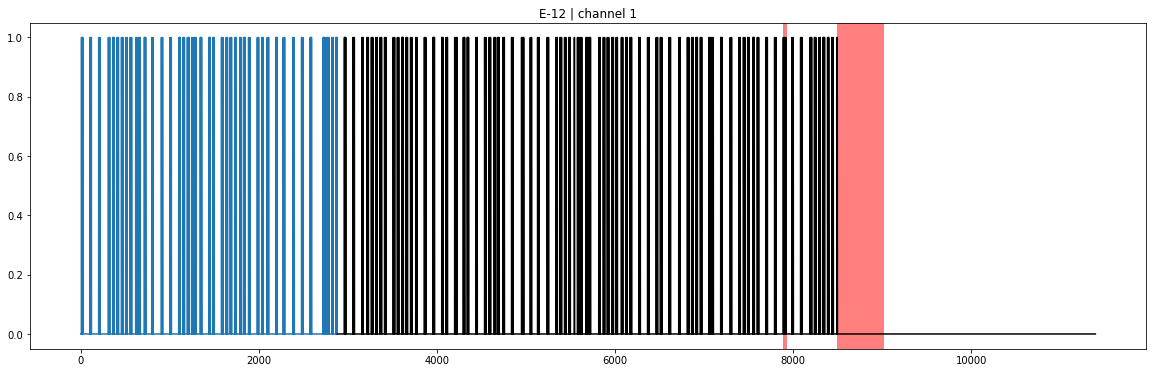

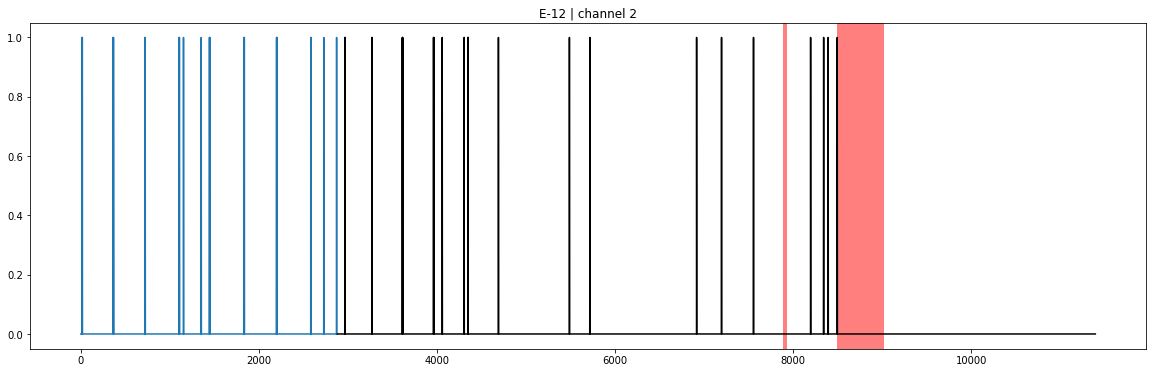

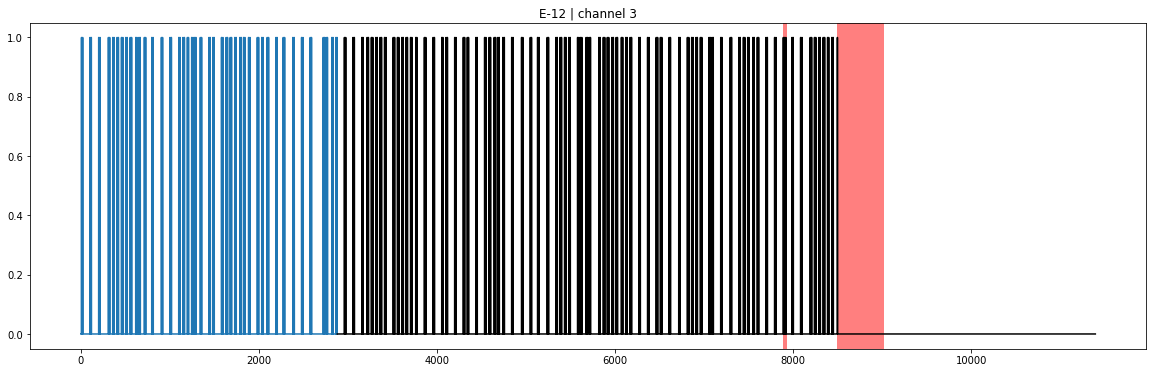

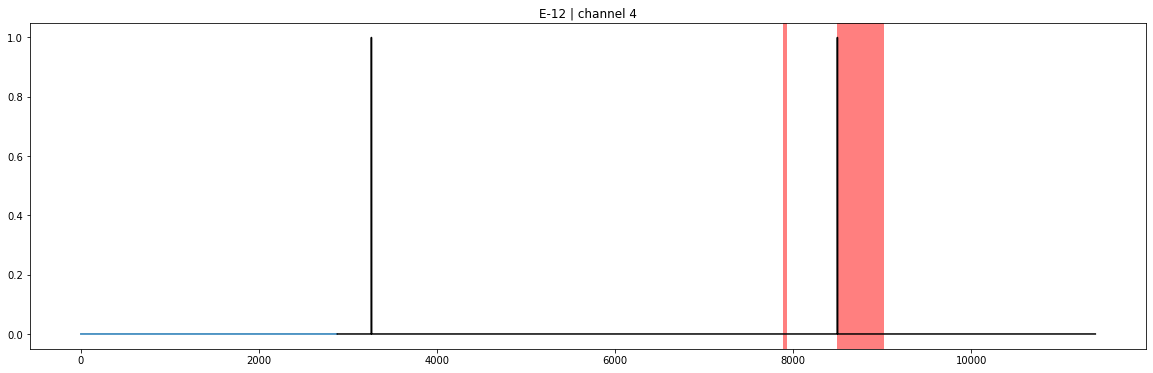

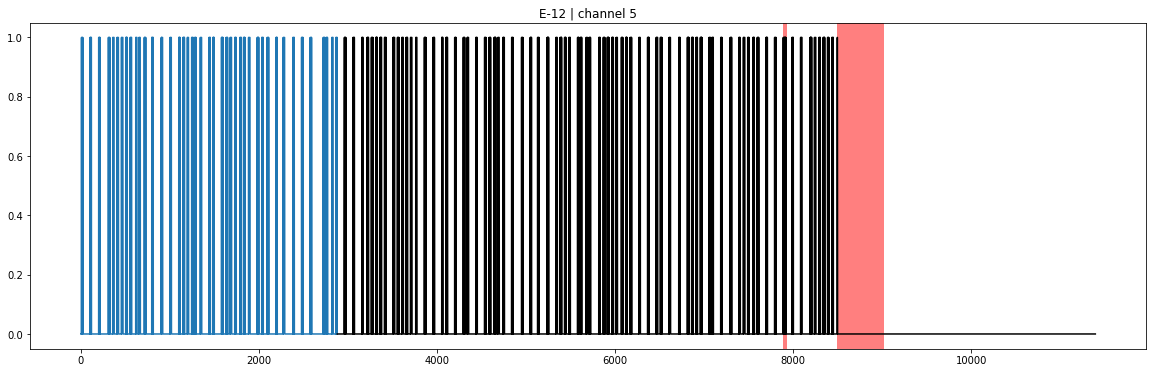

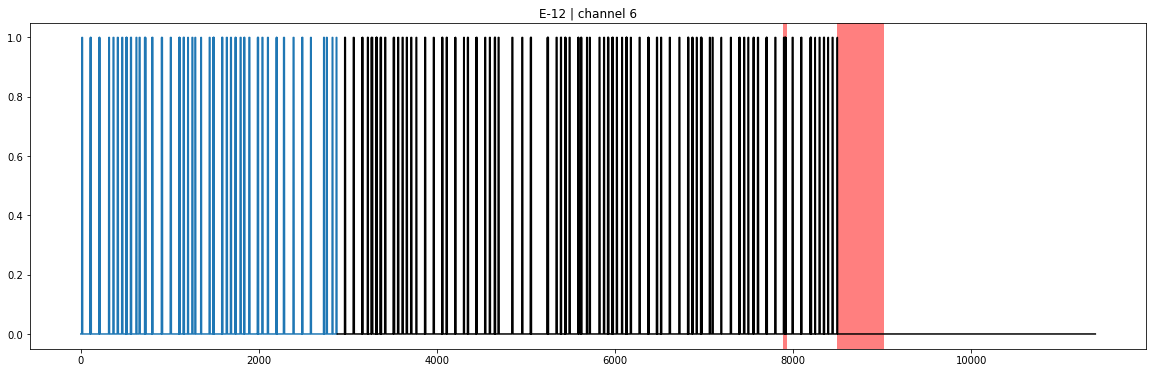

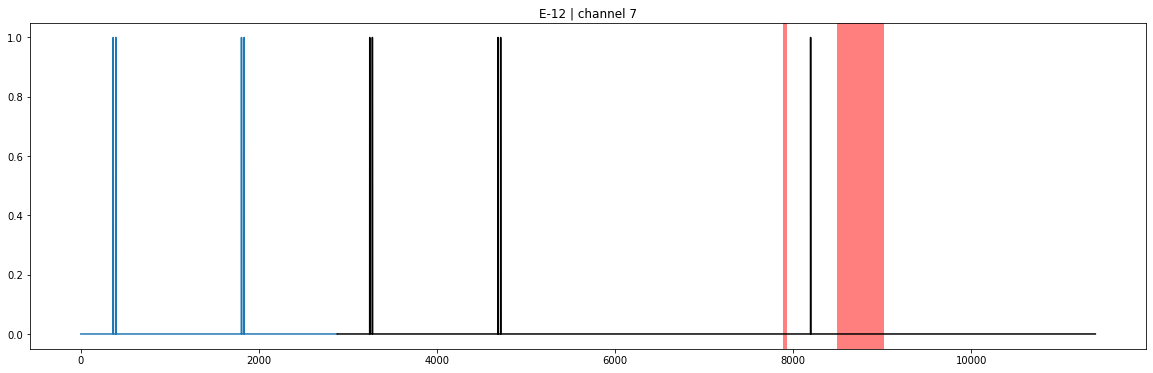

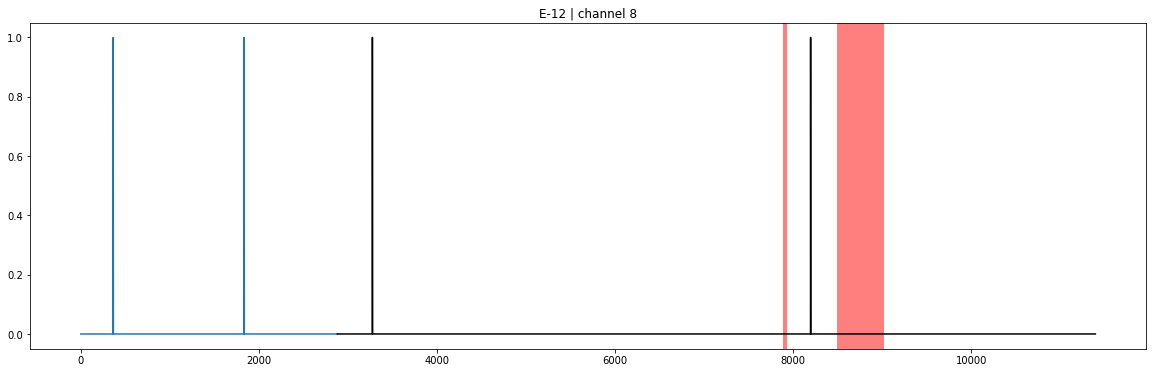

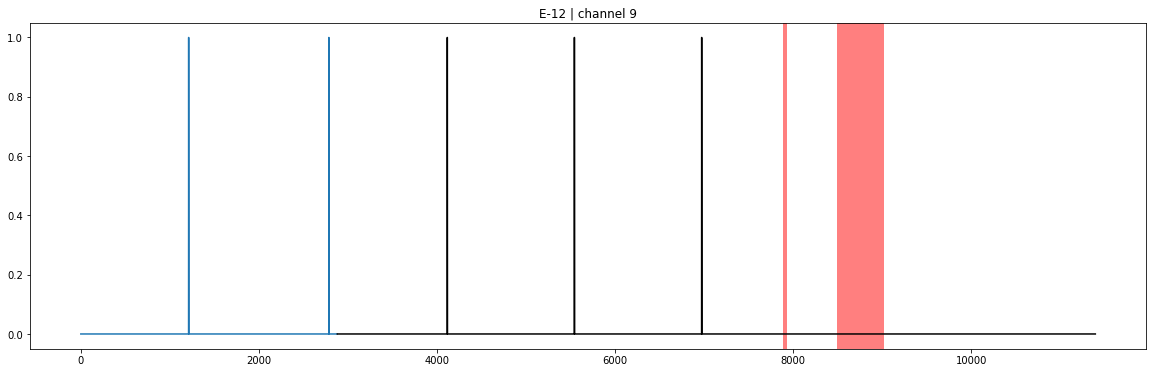

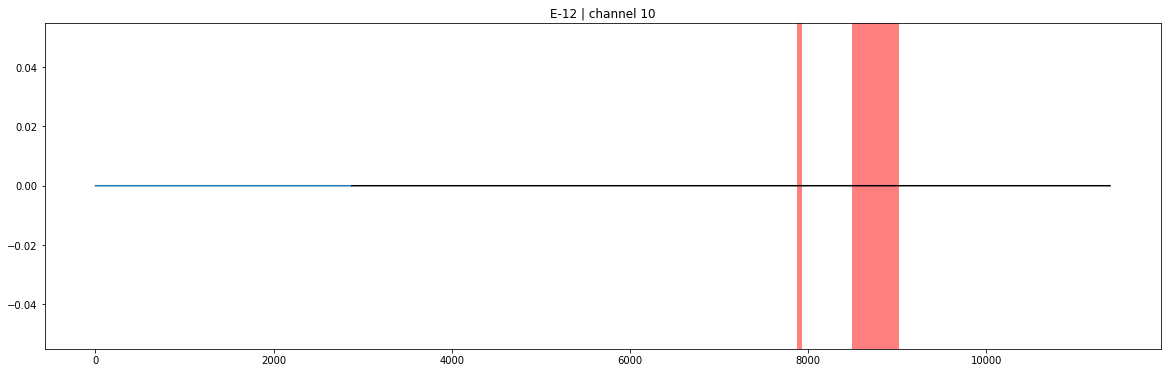

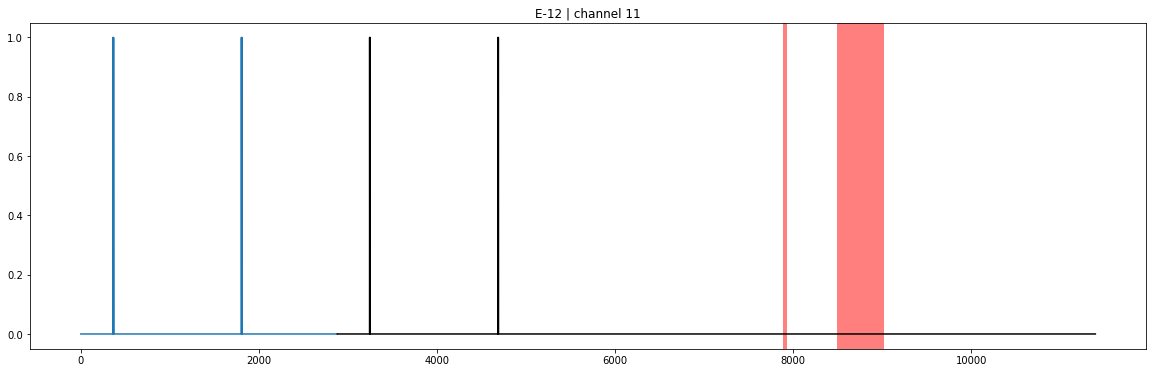

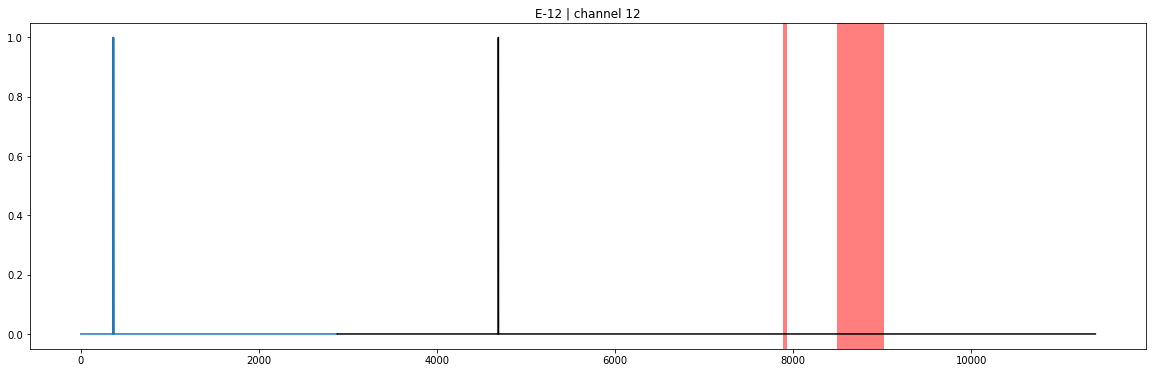

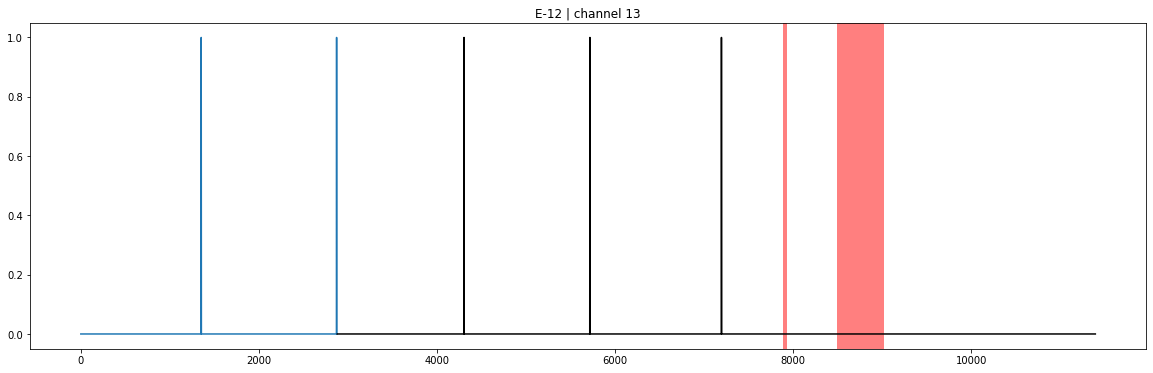

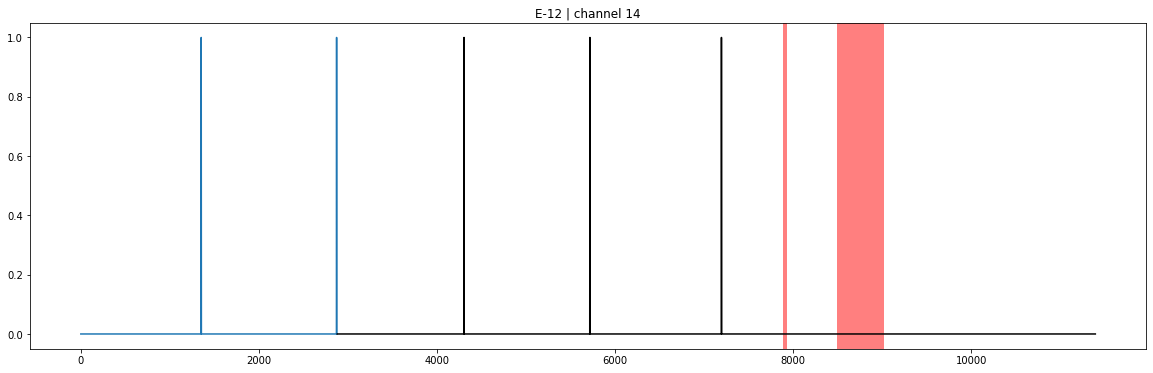

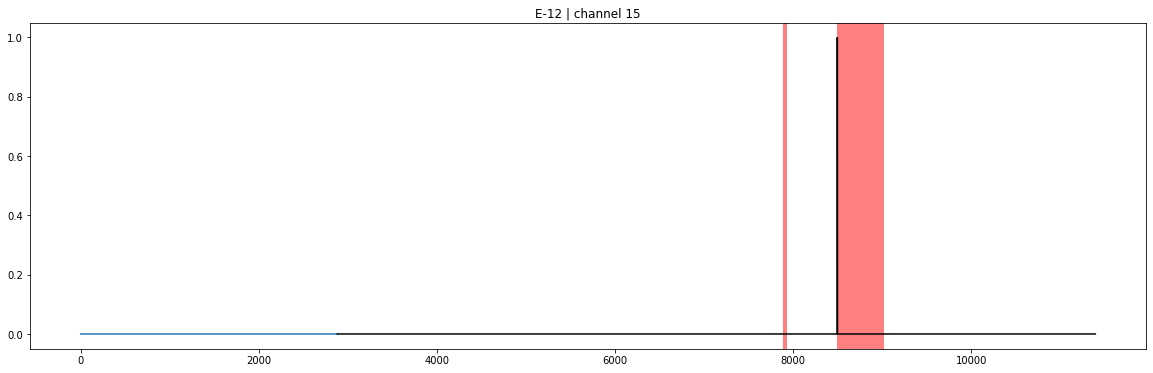

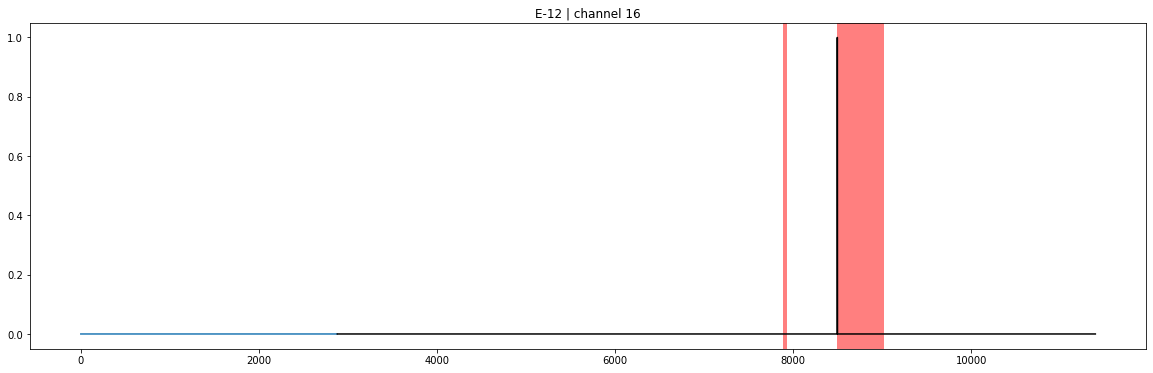

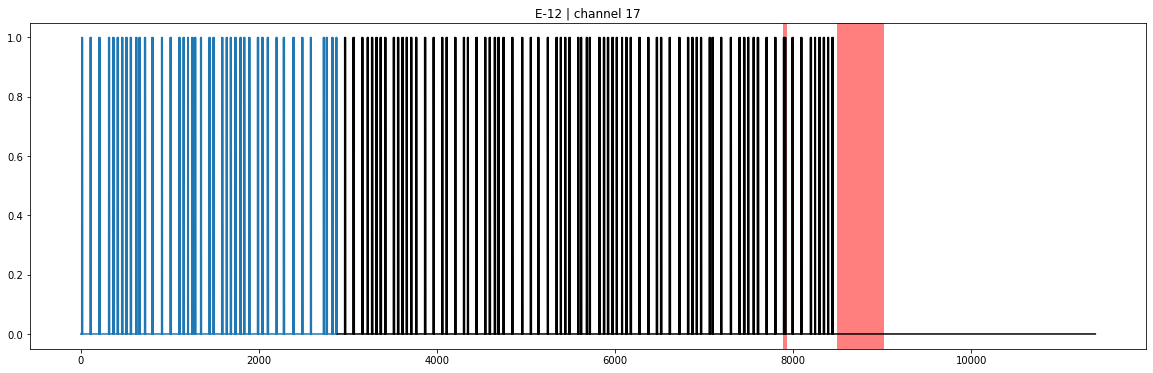

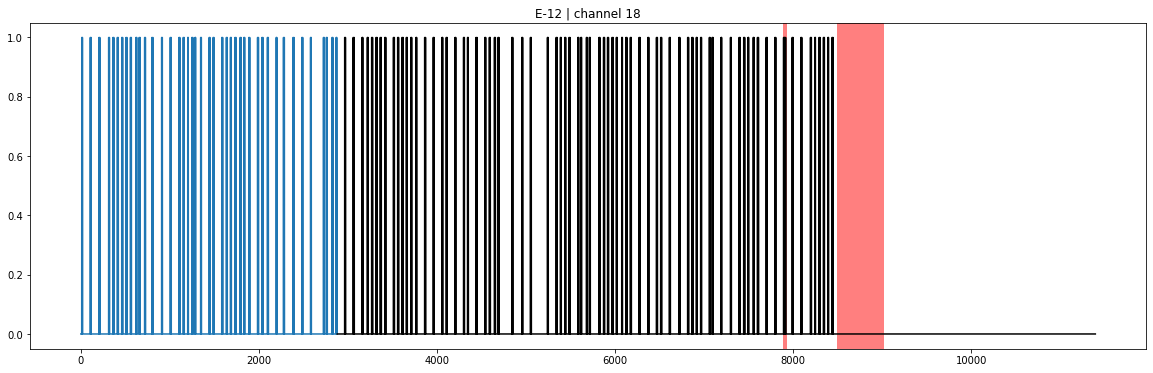

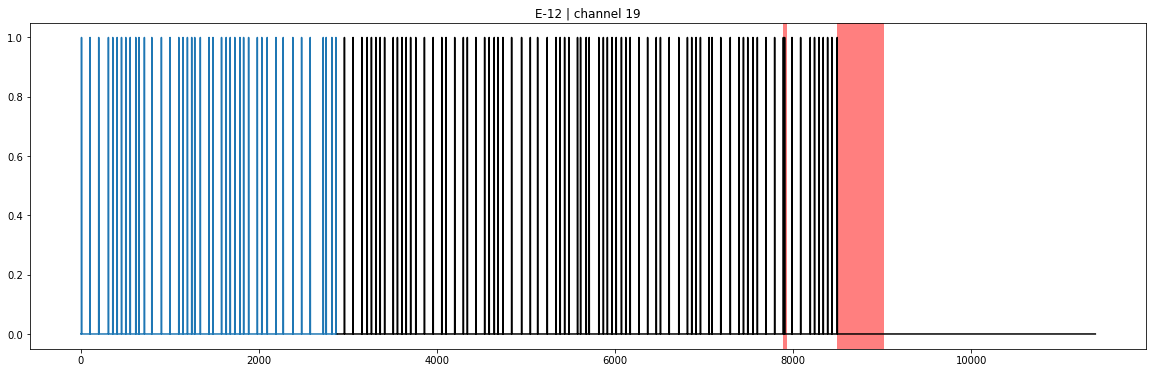

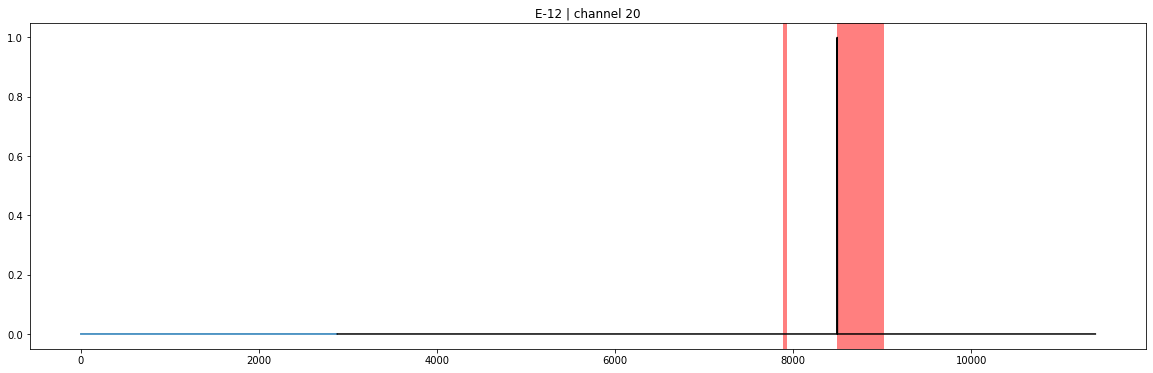

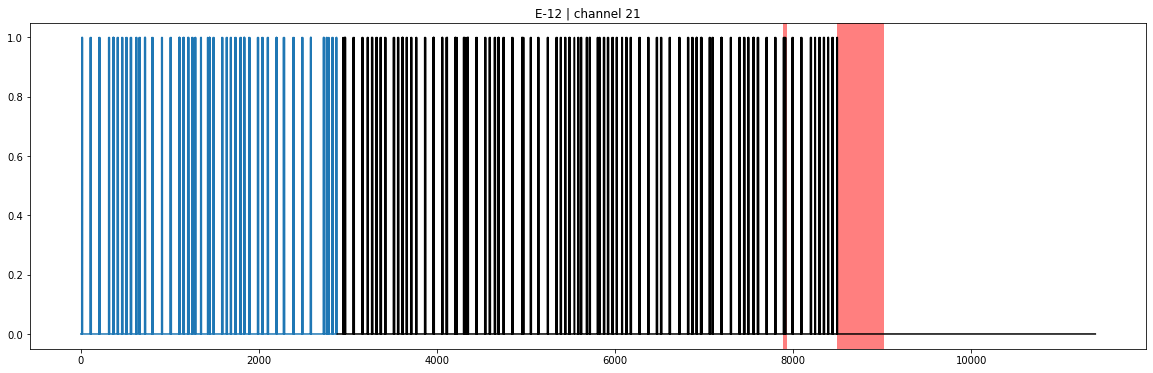

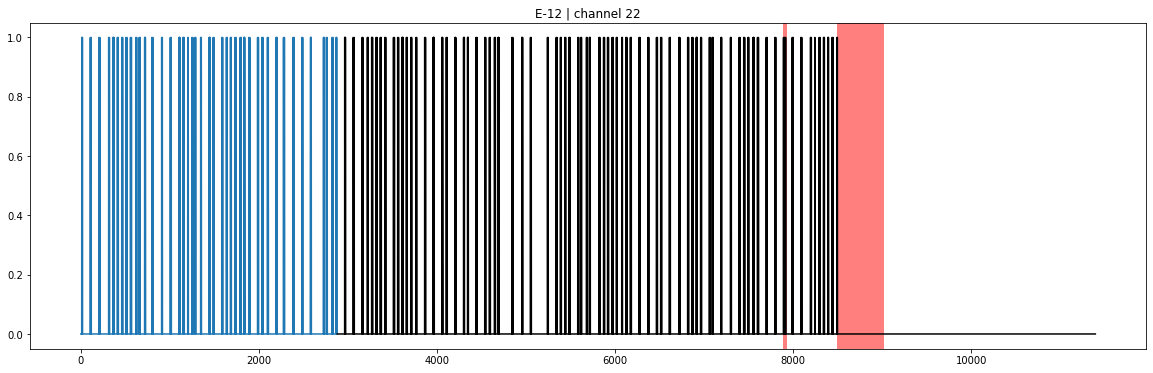

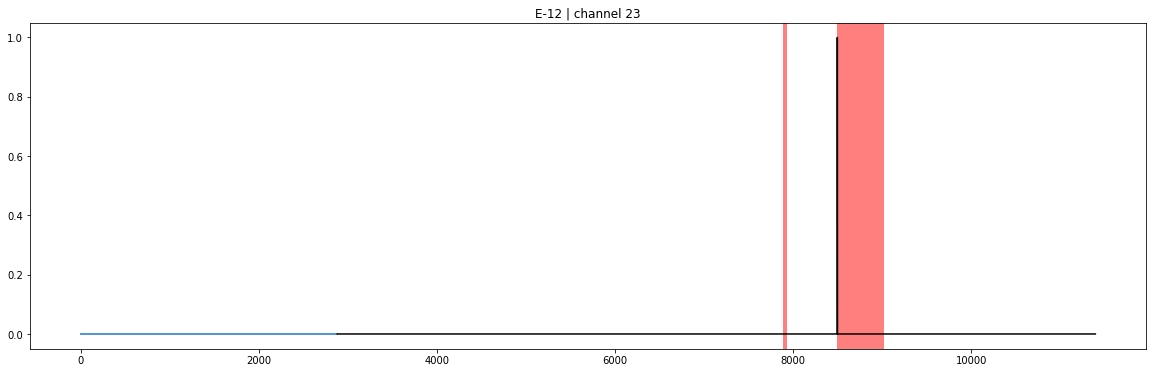

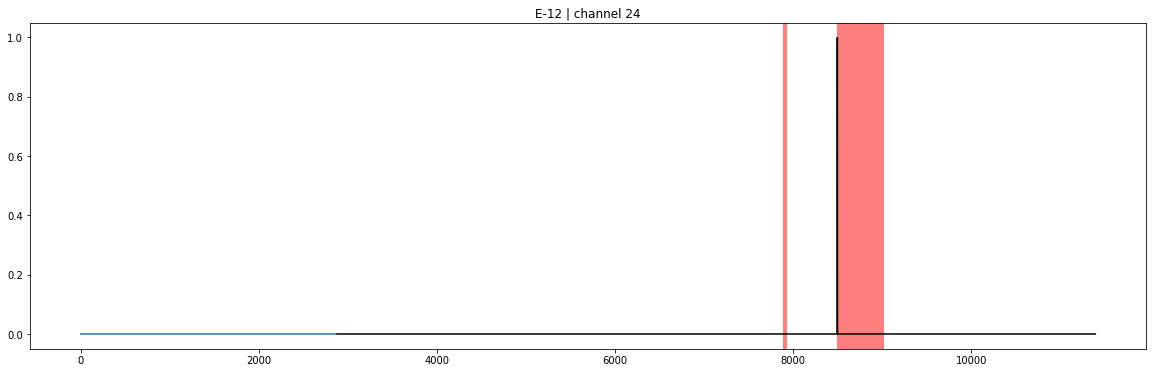

E-12
chan: E-13
[[5309, 5410], [5600, 5640], [6449, 6569]]


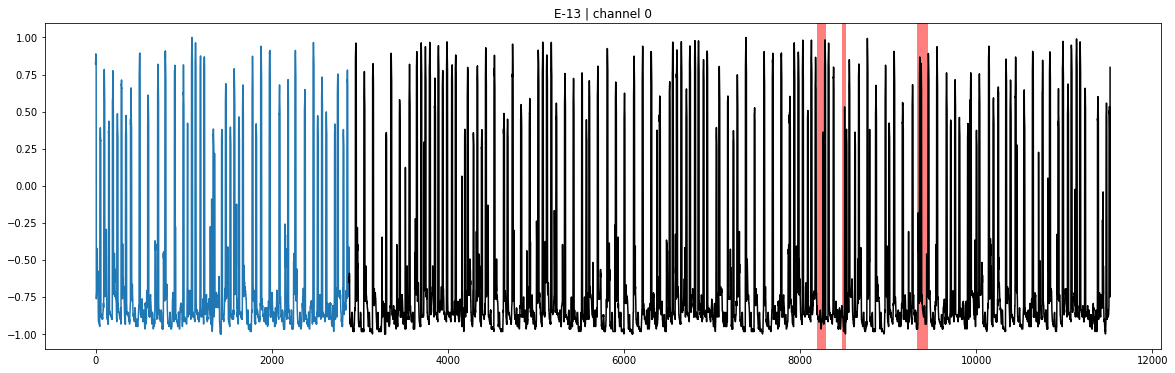

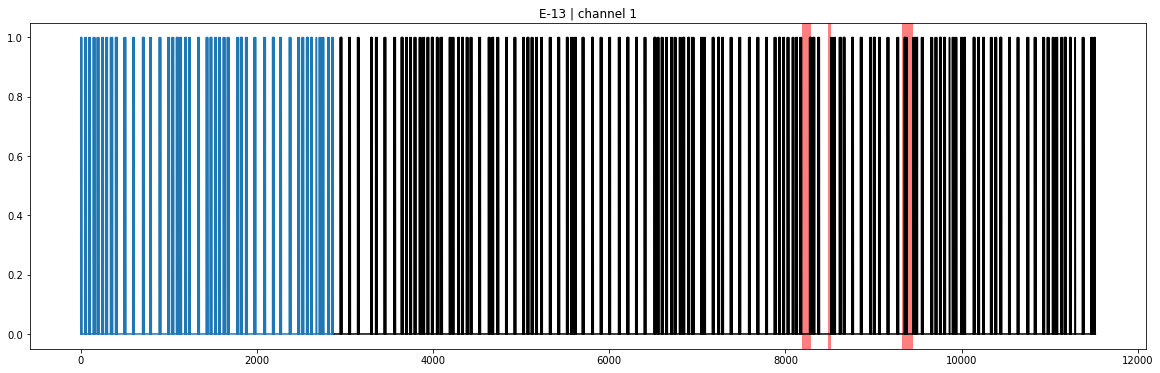

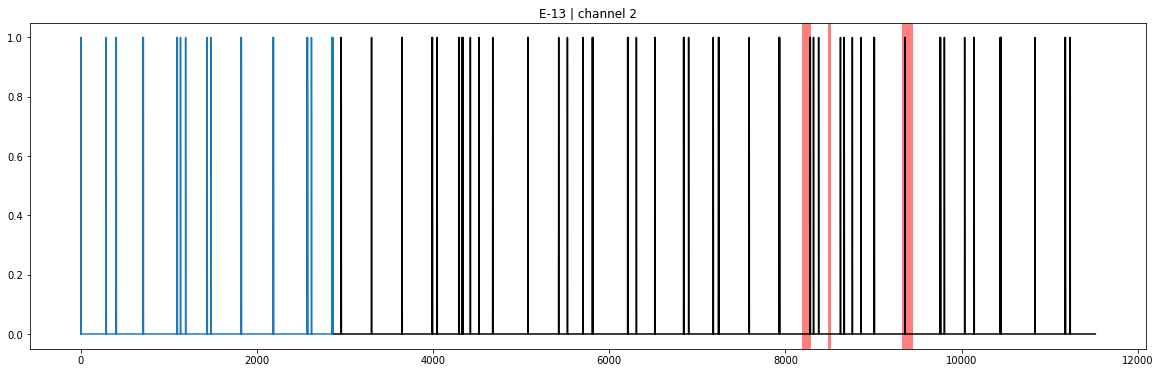

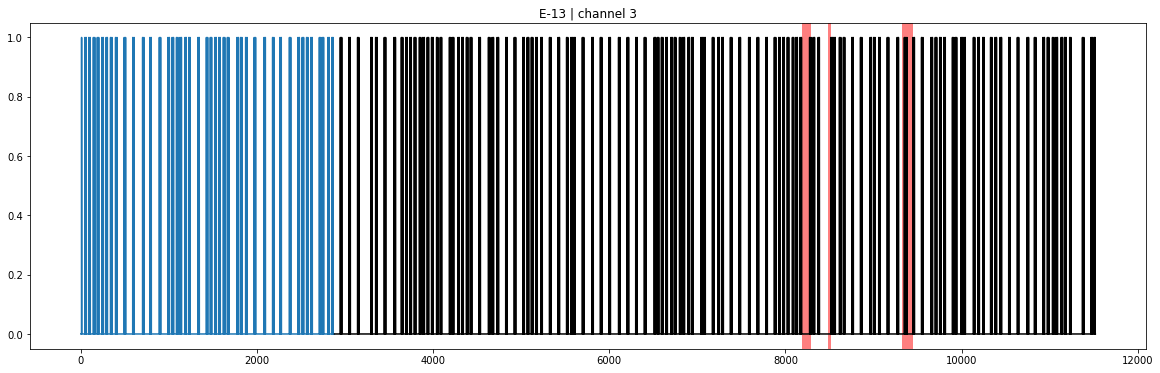

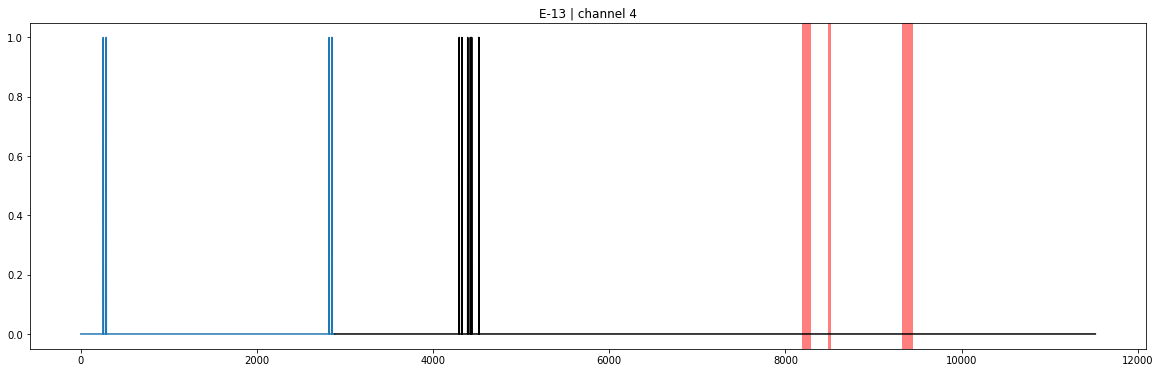

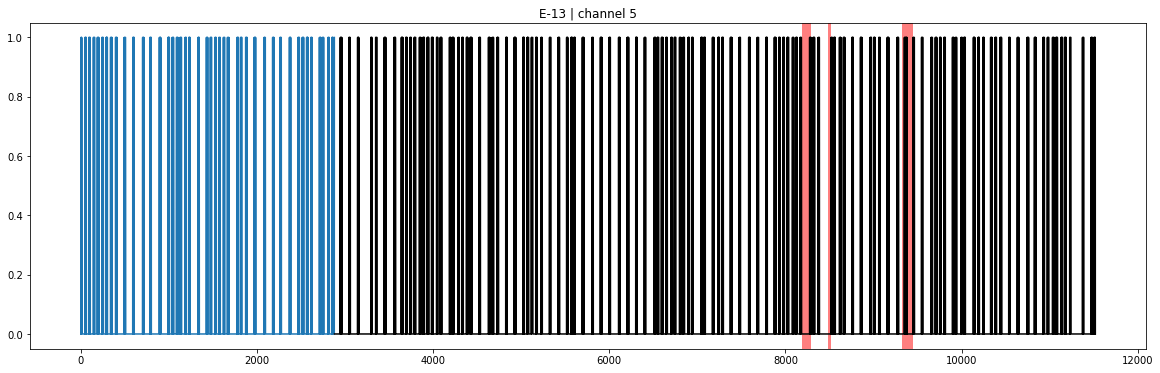

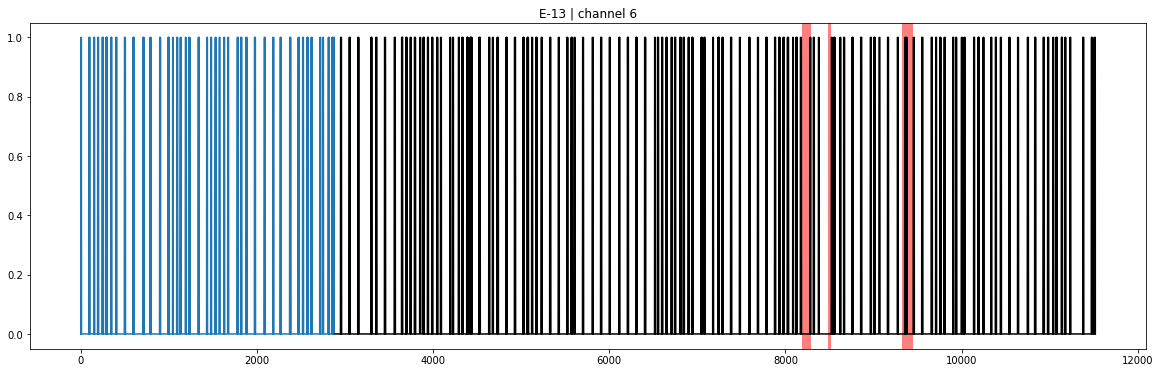

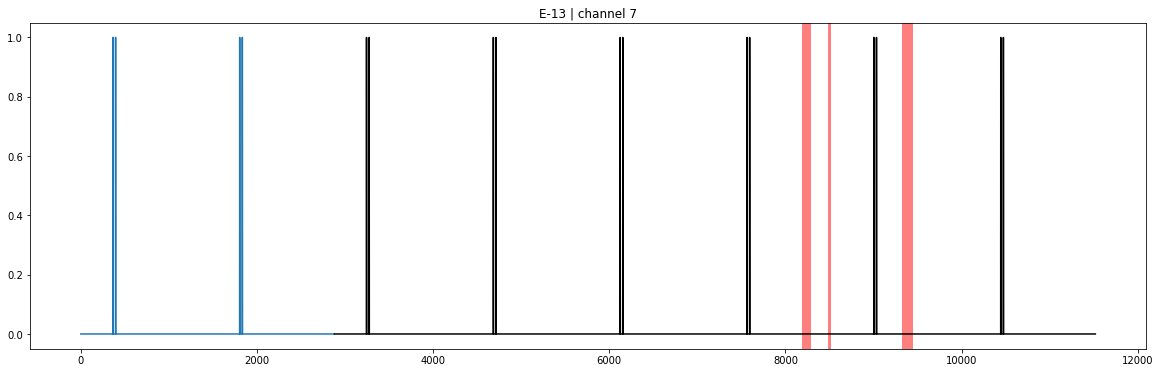

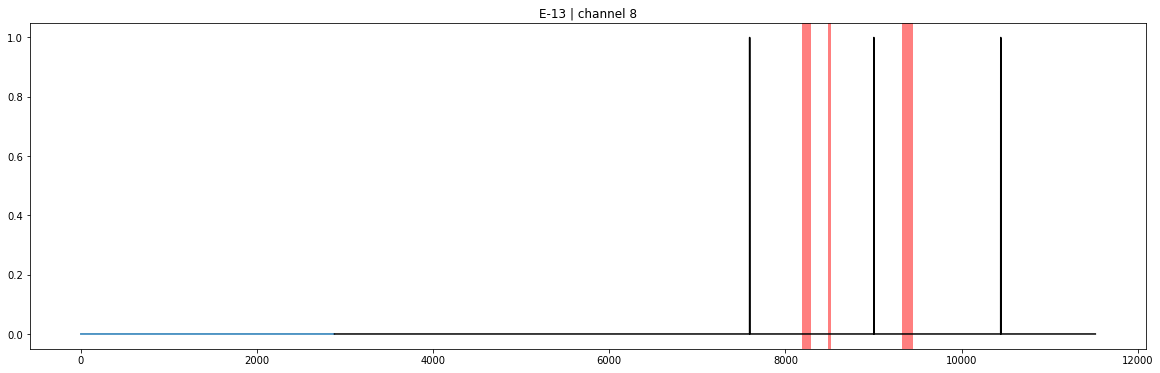

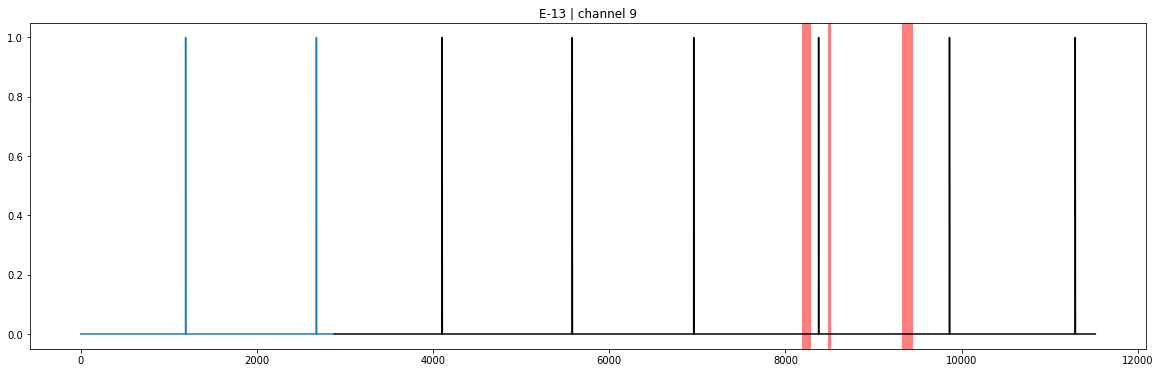

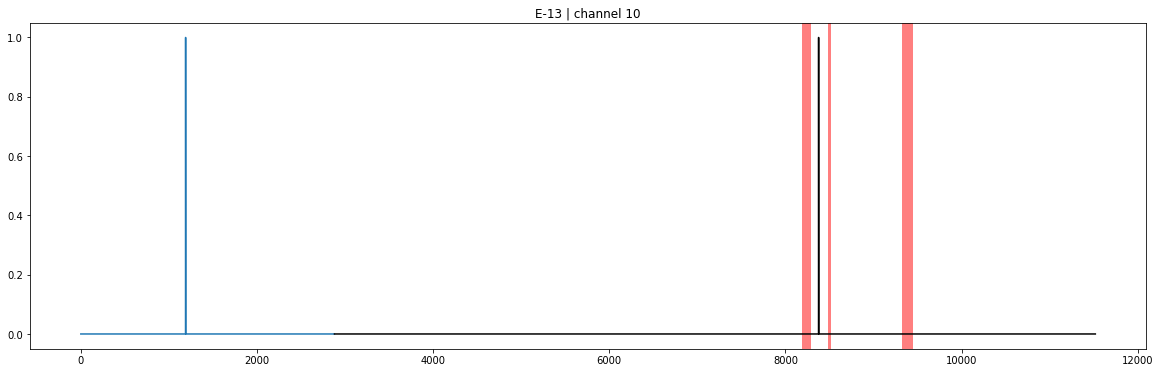

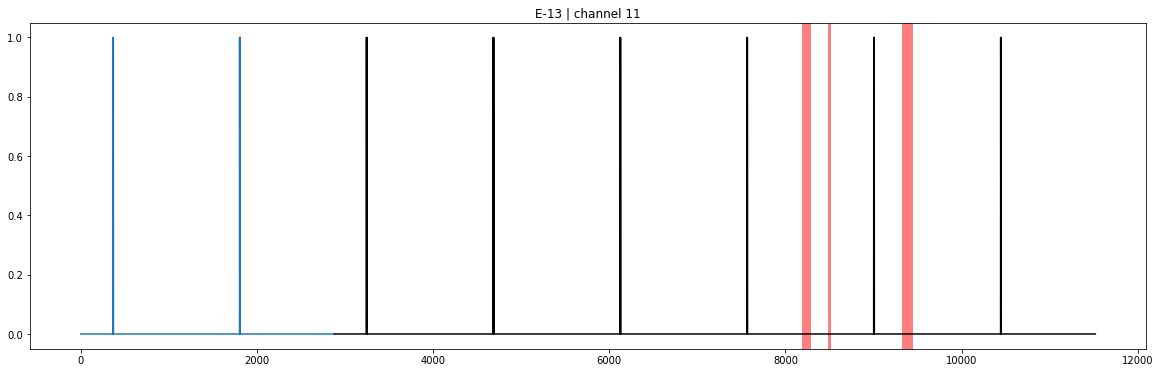

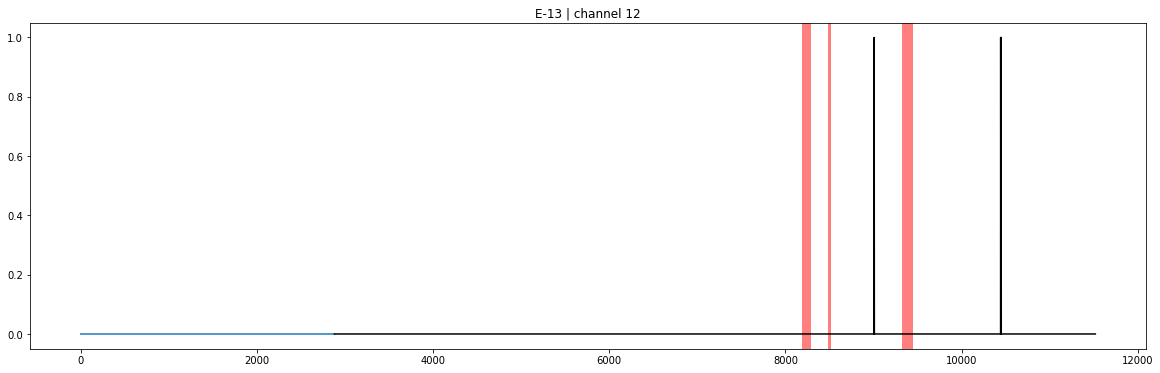

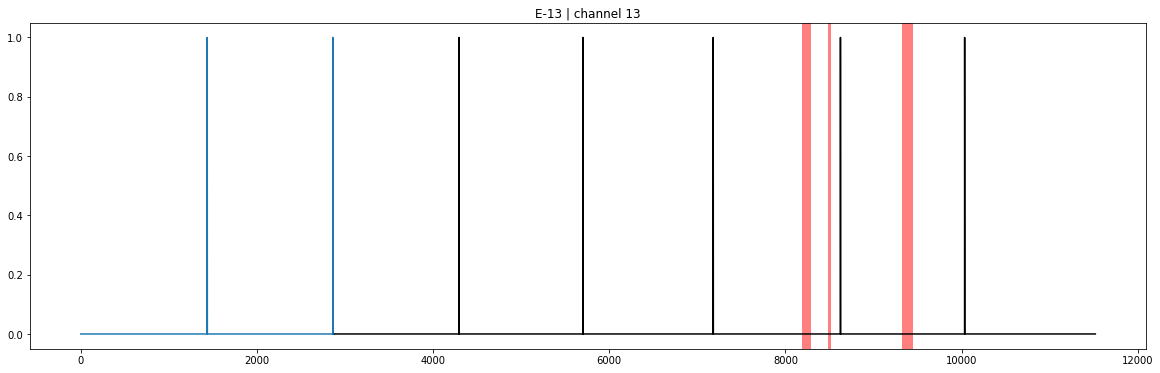

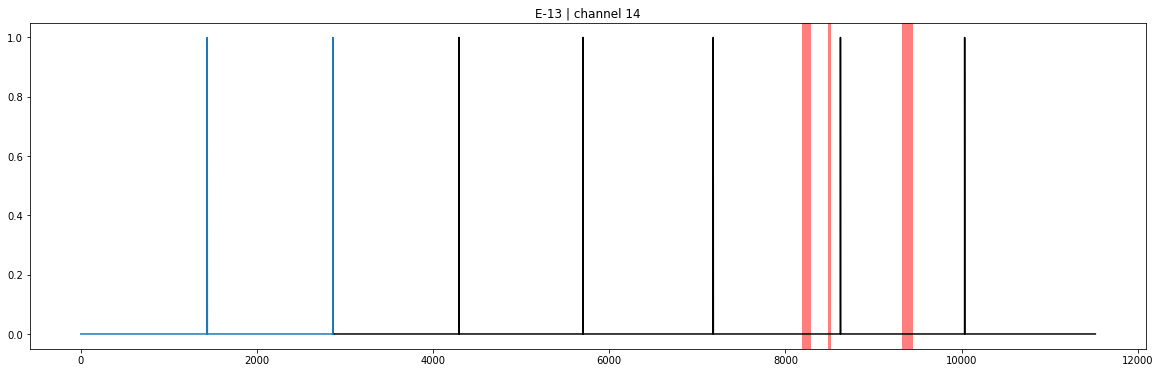

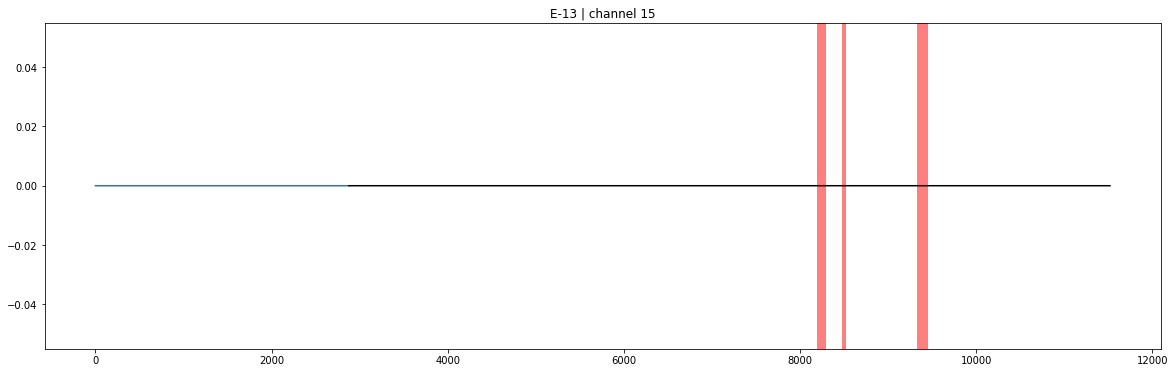

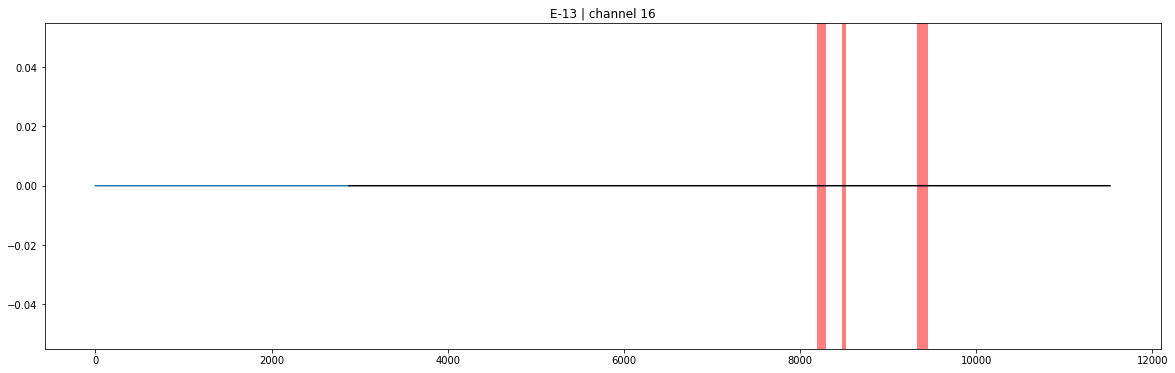

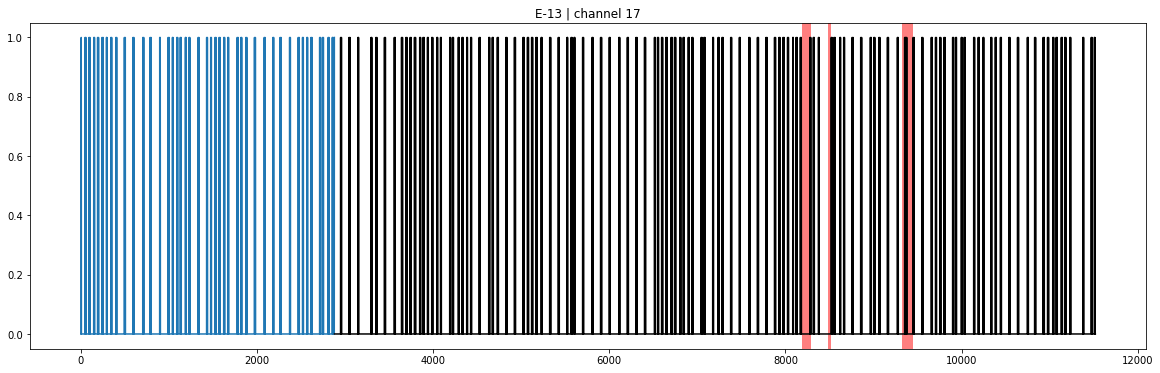

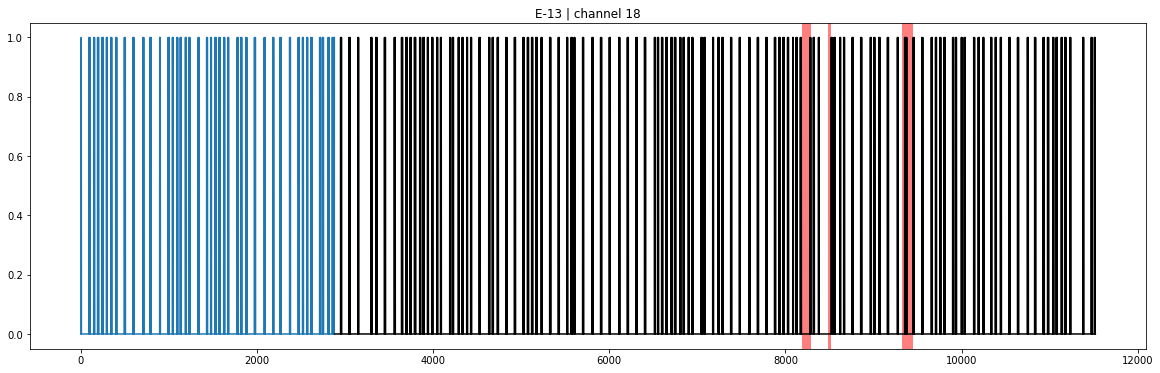

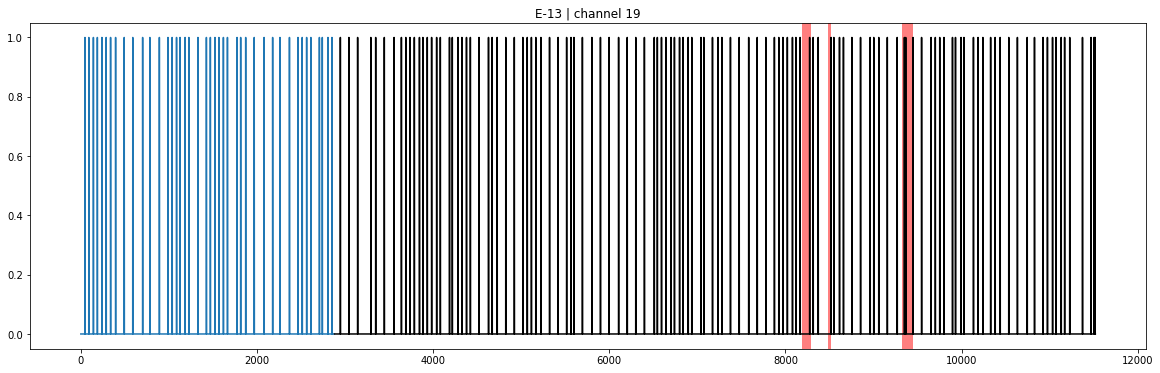

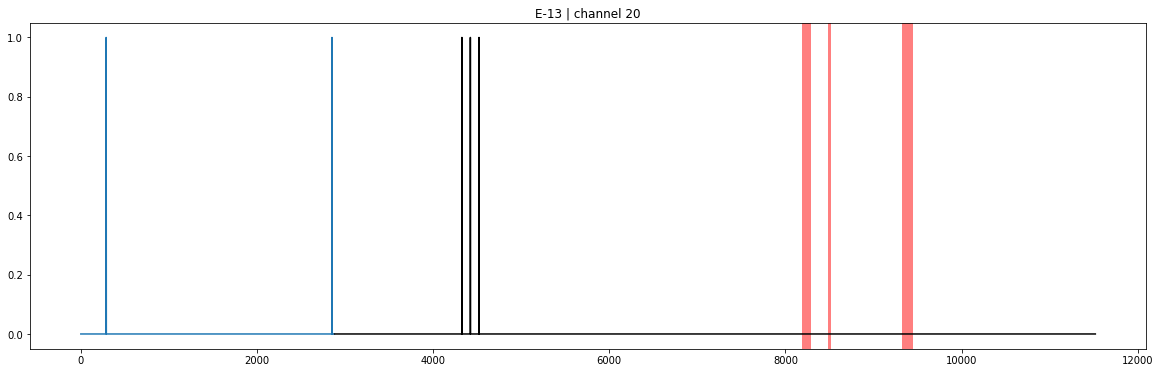

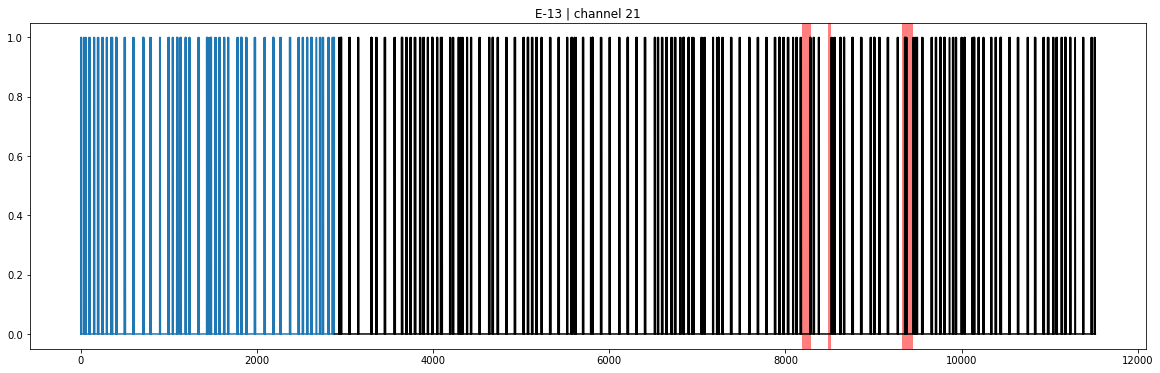

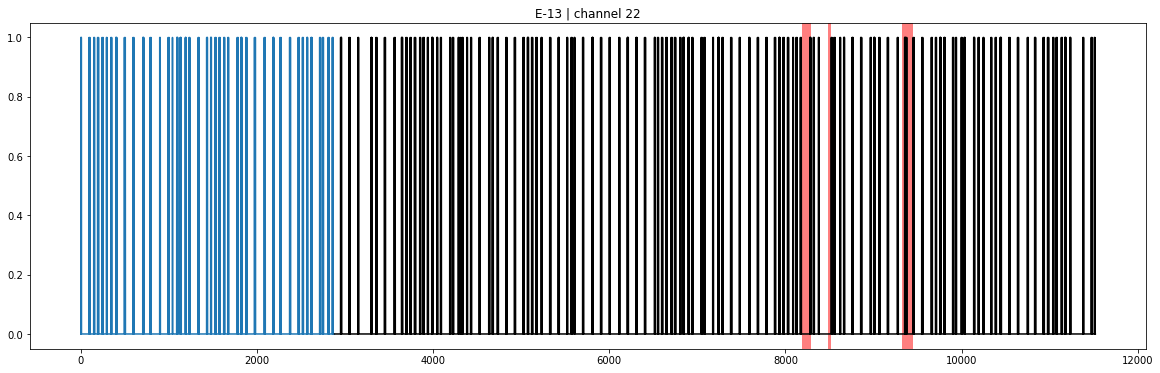

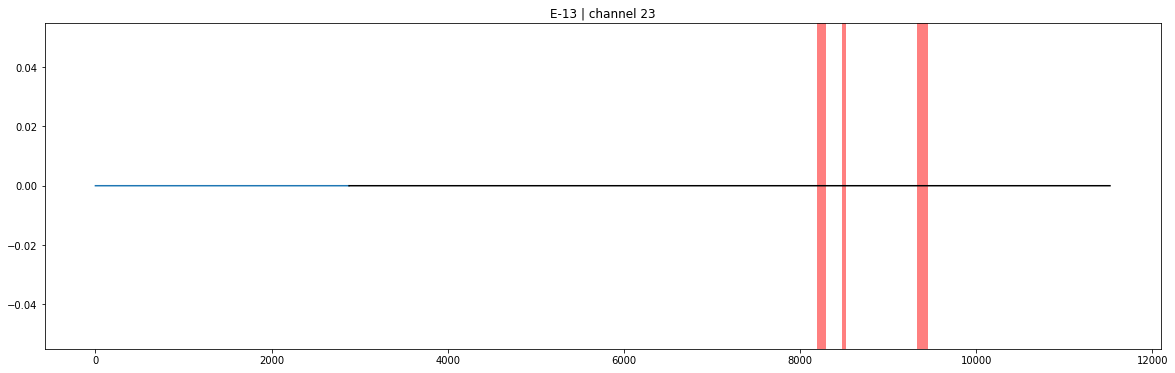

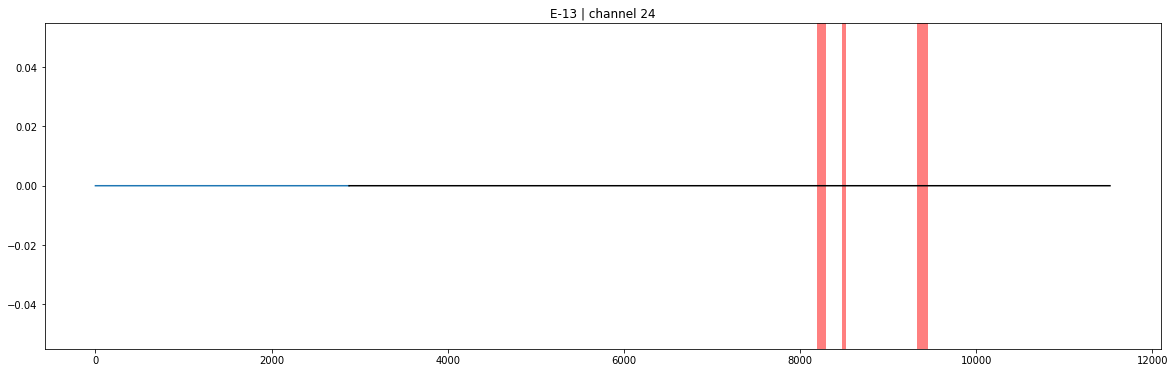

E-13
chan: E-2
E-2
chan: E-3
E-3
chan: E-4
E-4
chan: E-5
E-5
chan: E-6
E-6
chan: E-7
E-7
chan: E-8
E-8
chan: E-9
E-9
chan: F-1
F-1
chan: F-2
F-2
chan: F-3
F-3
chan: G-1
G-1
chan: G-2
G-2
chan: G-3
G-3
chan: G-4
G-4
chan: G-6
G-6
chan: G-7
[[3650, 3750], [5050, 5100], [7560, 7675]]


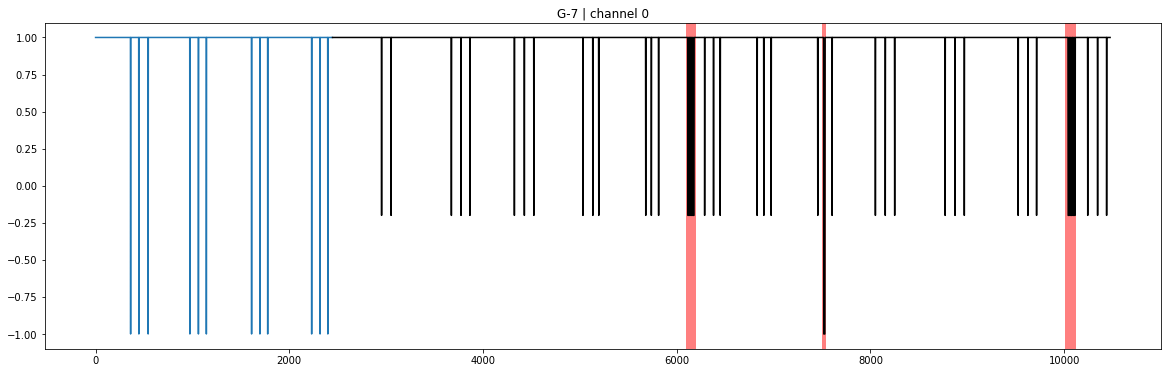

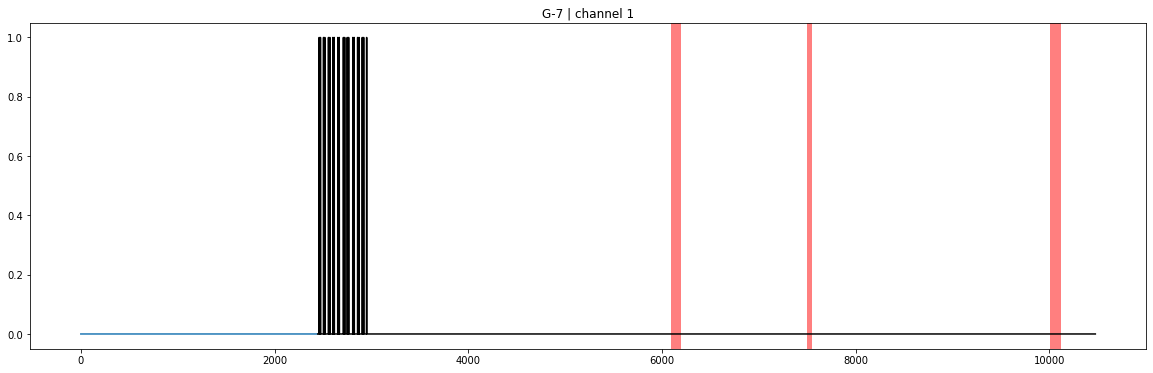

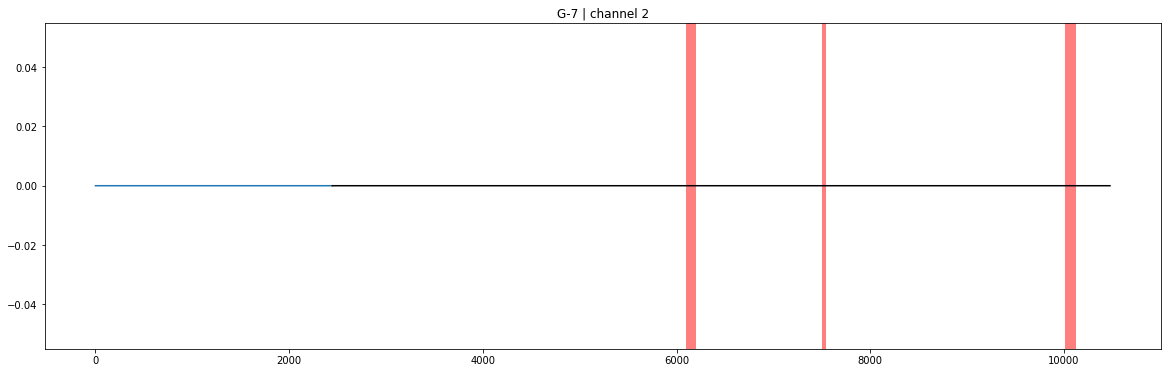

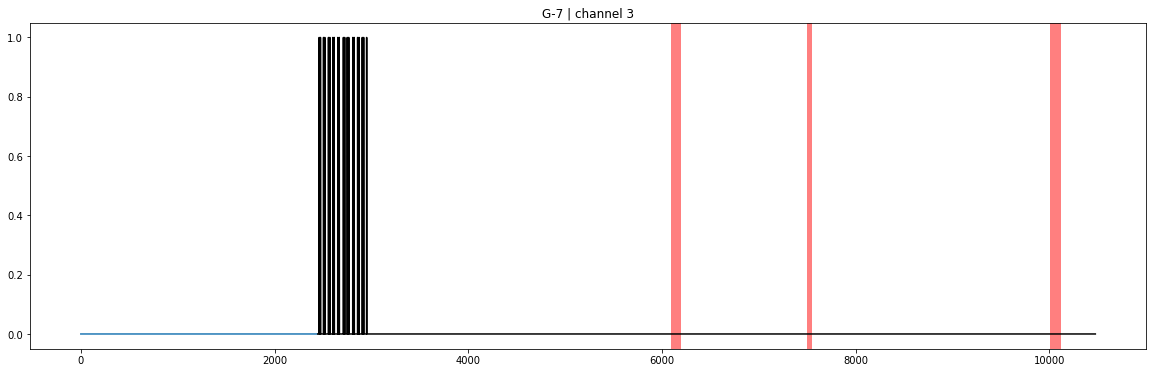

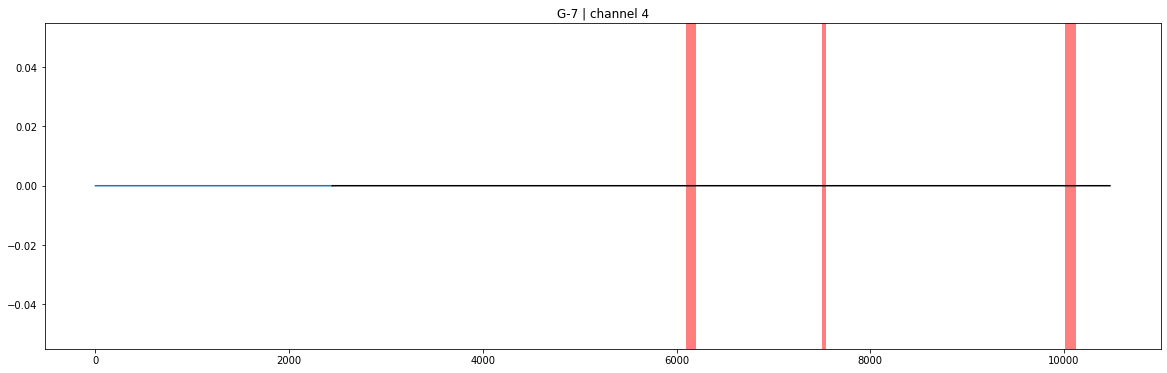

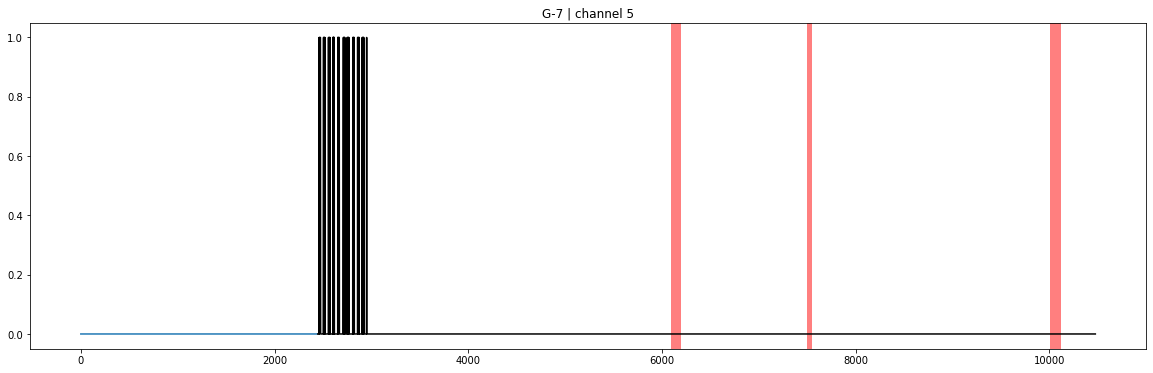

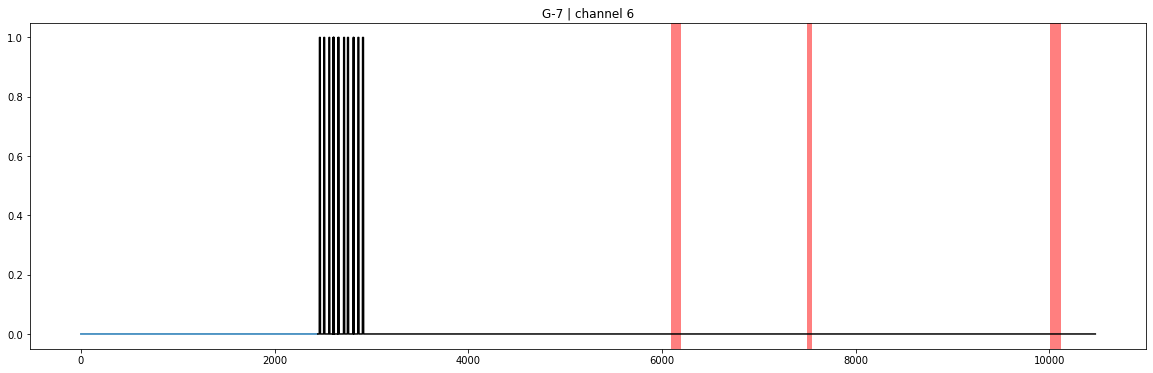

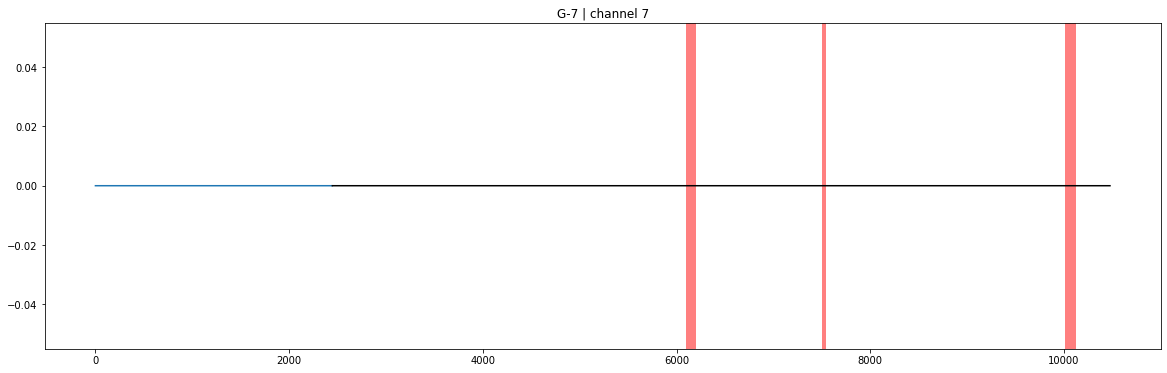

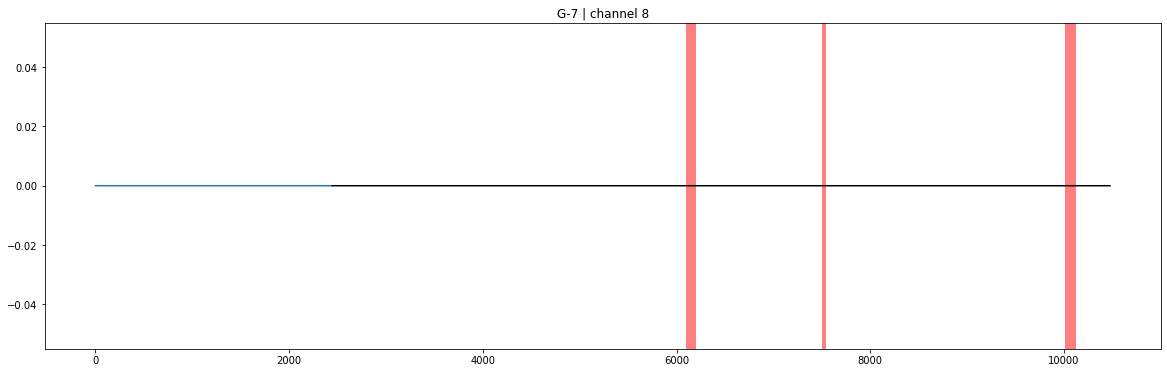

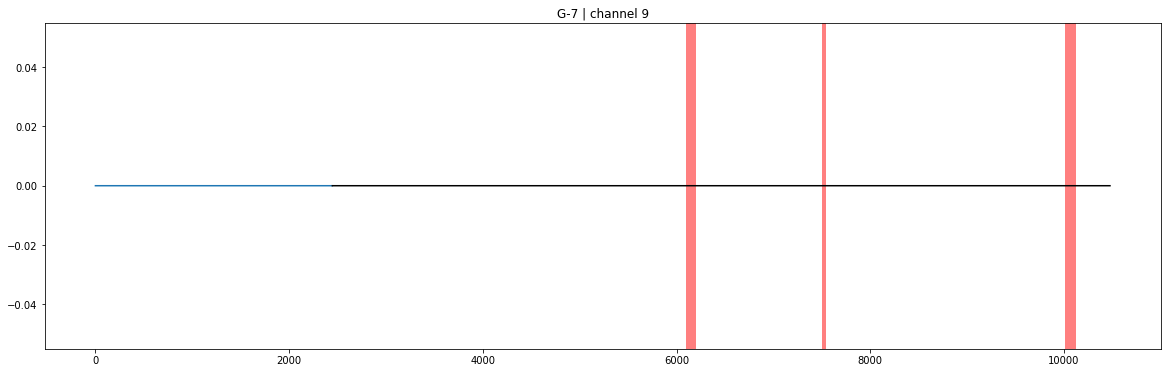

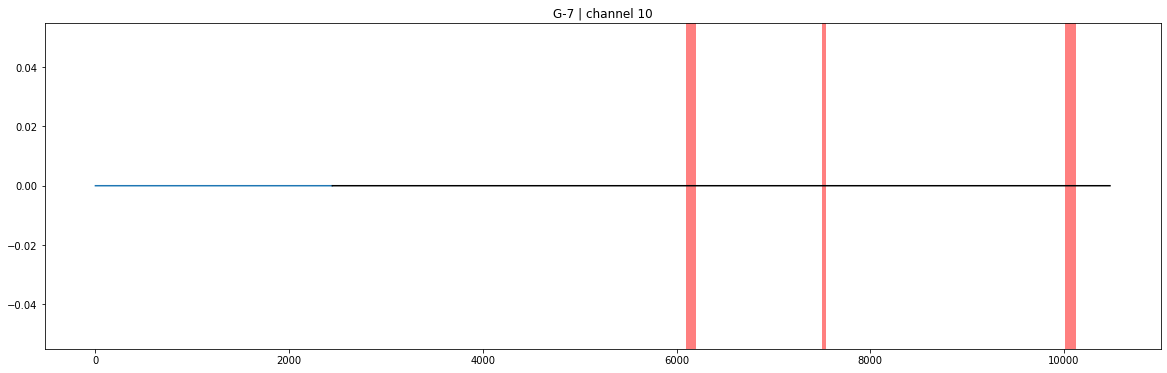

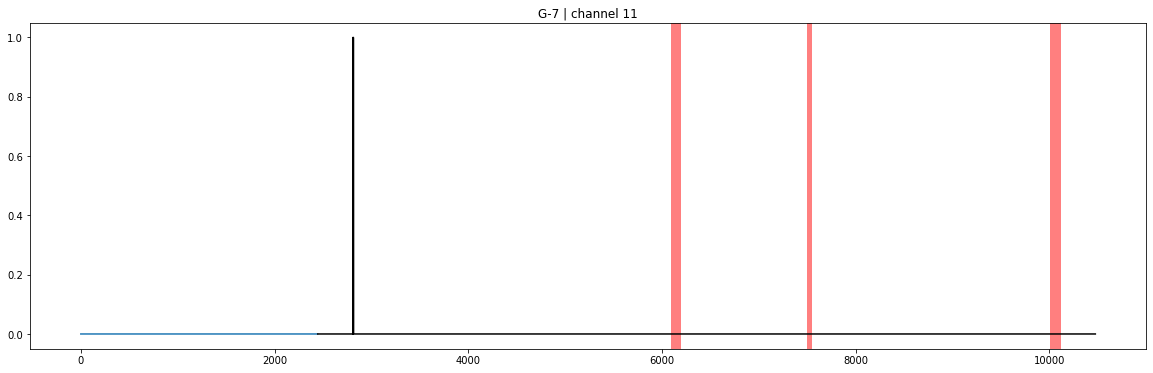

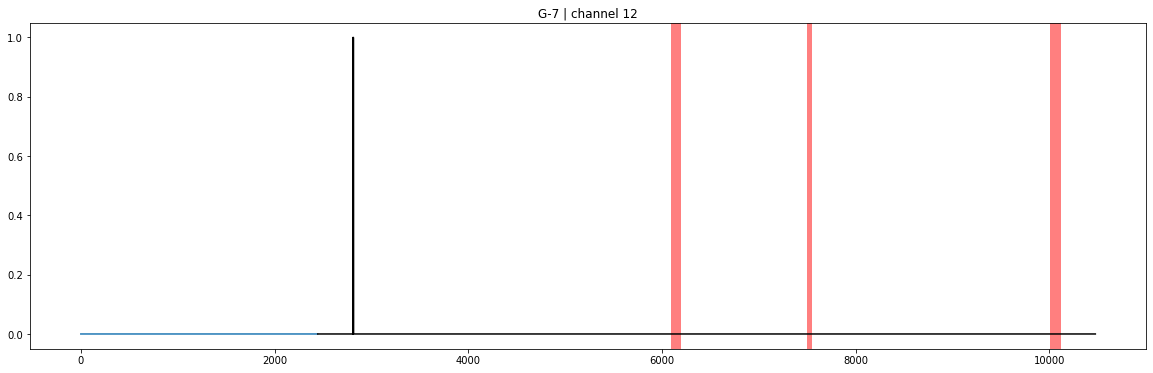

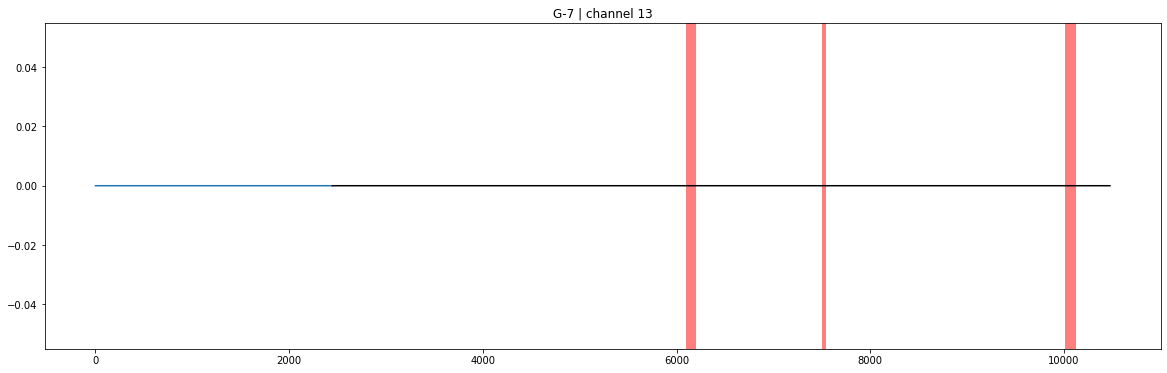

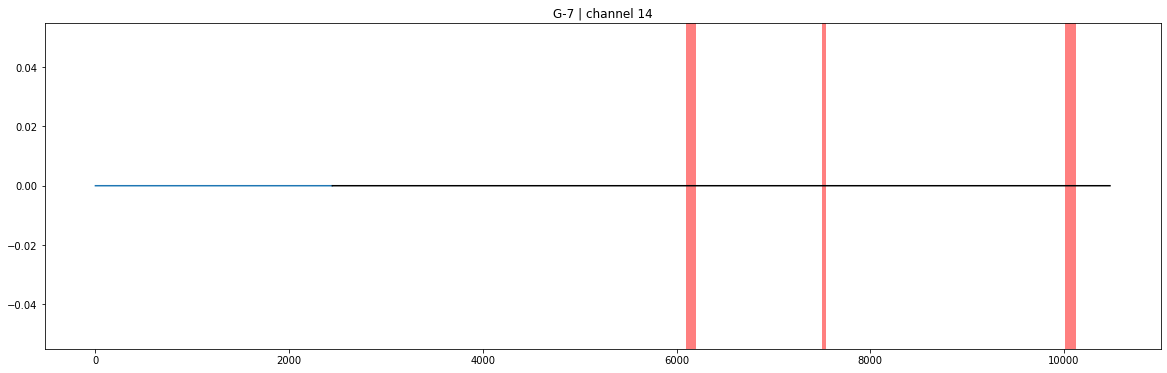

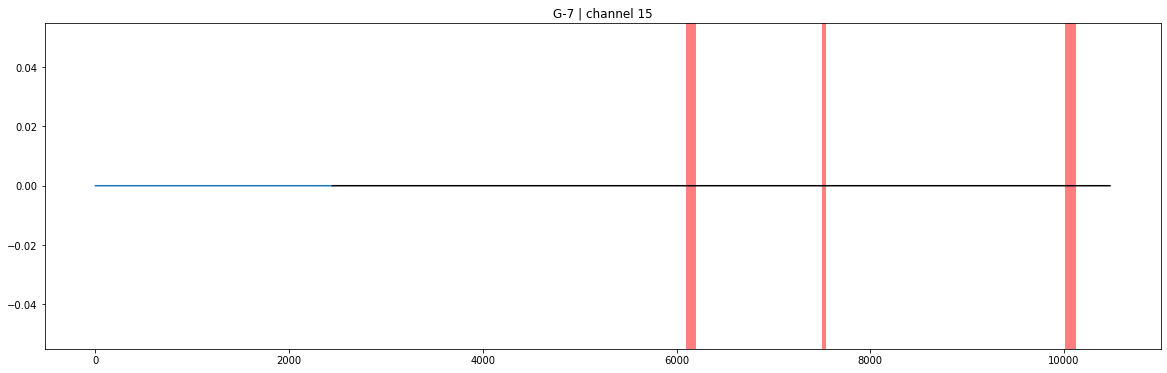

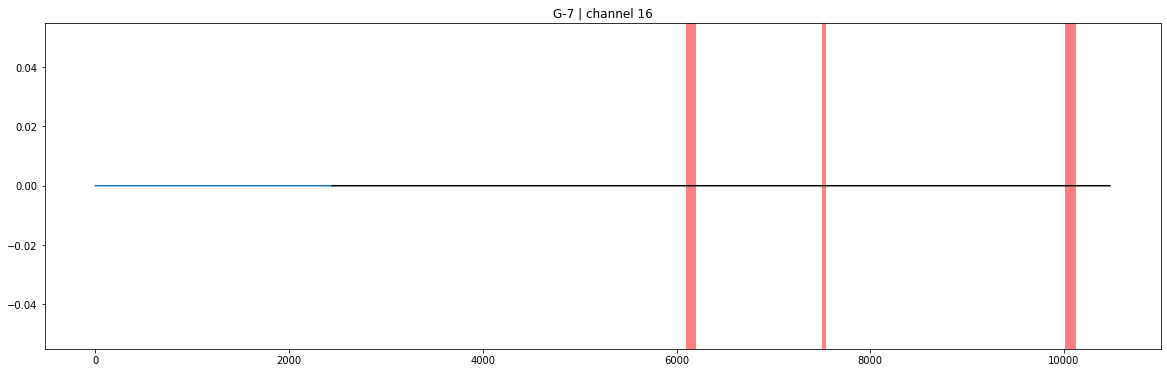

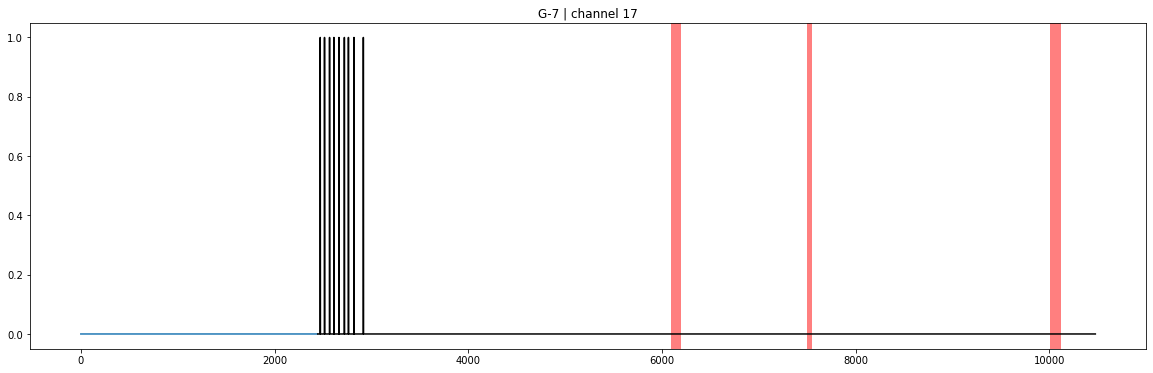

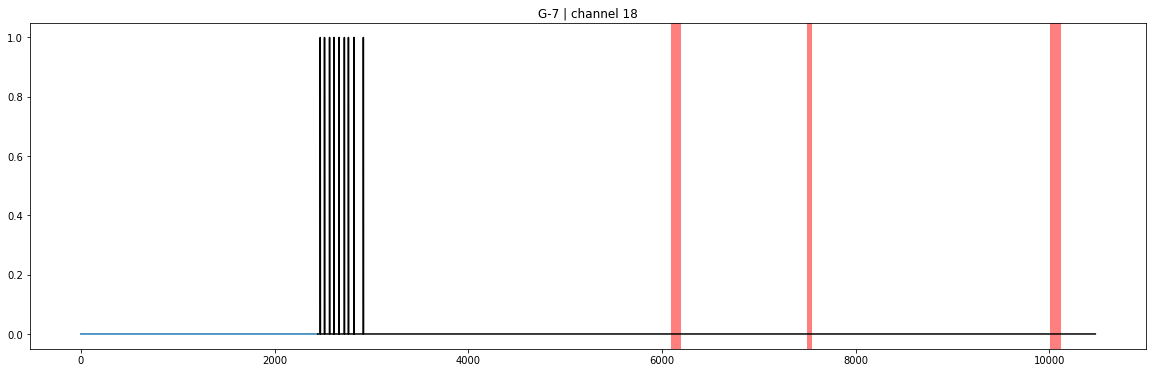

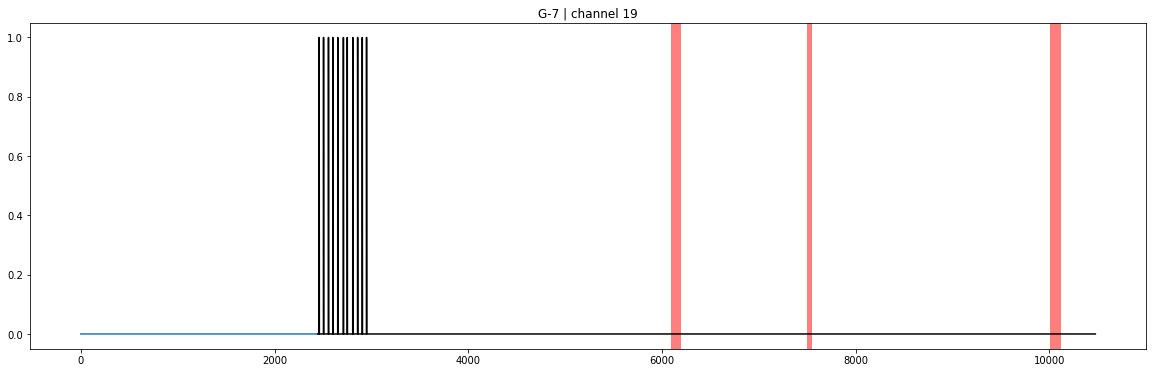

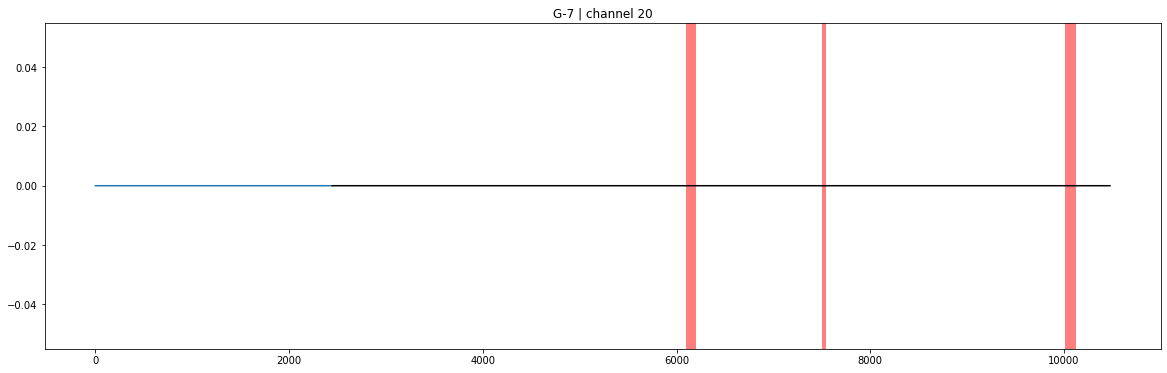

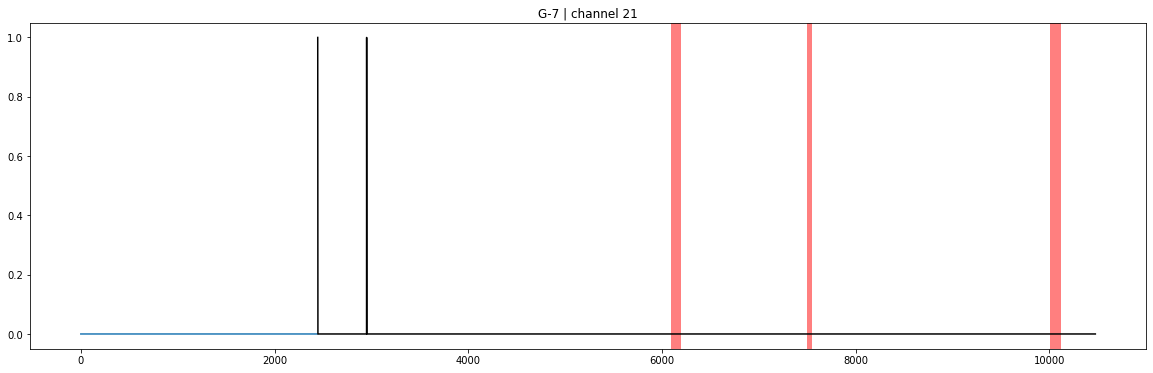

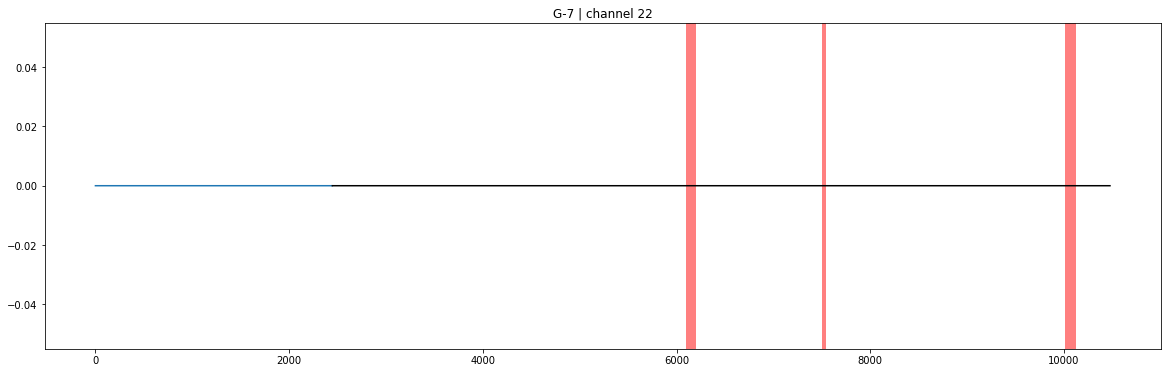

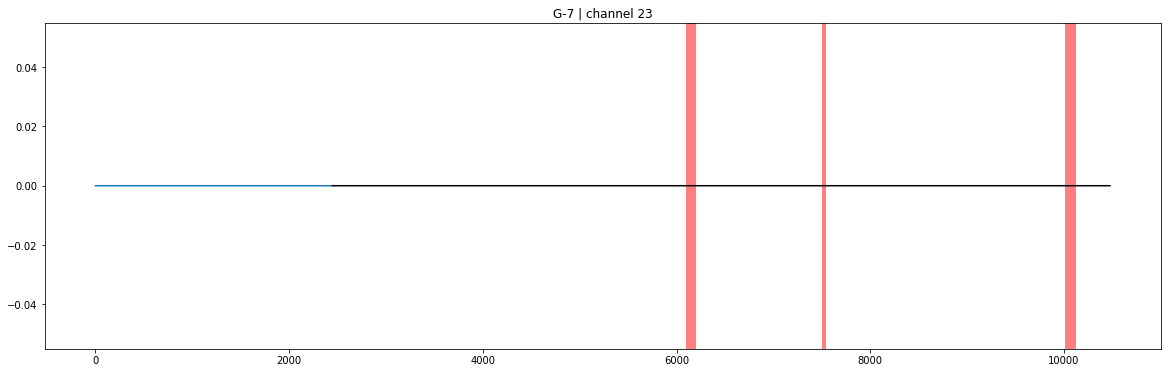

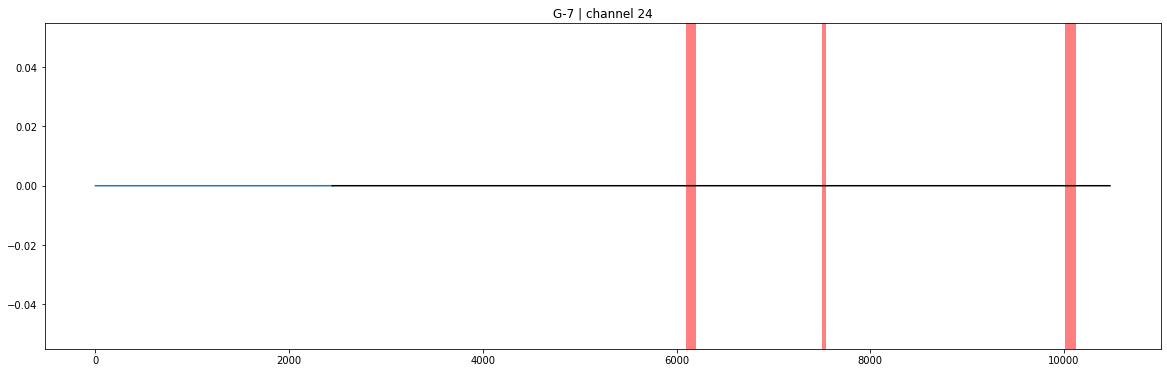

G-7
chan: P-1
[[2149, 2349], [4536, 4844], [3539, 3779]]


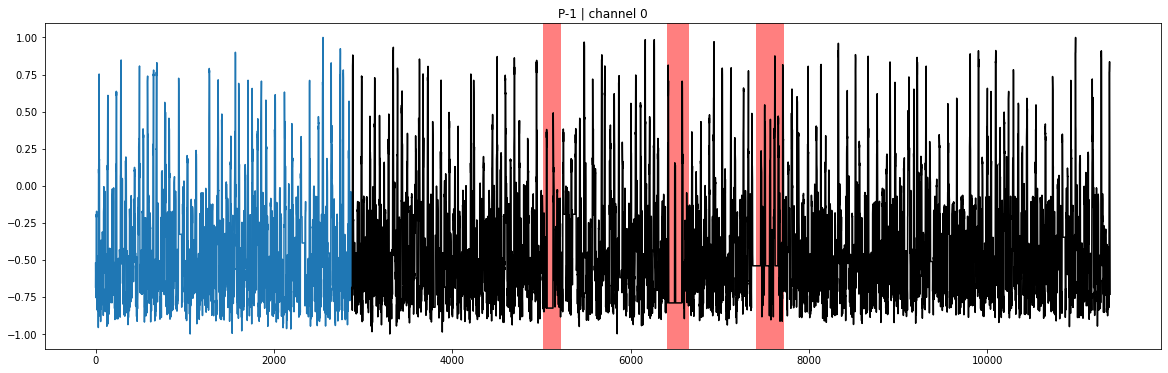

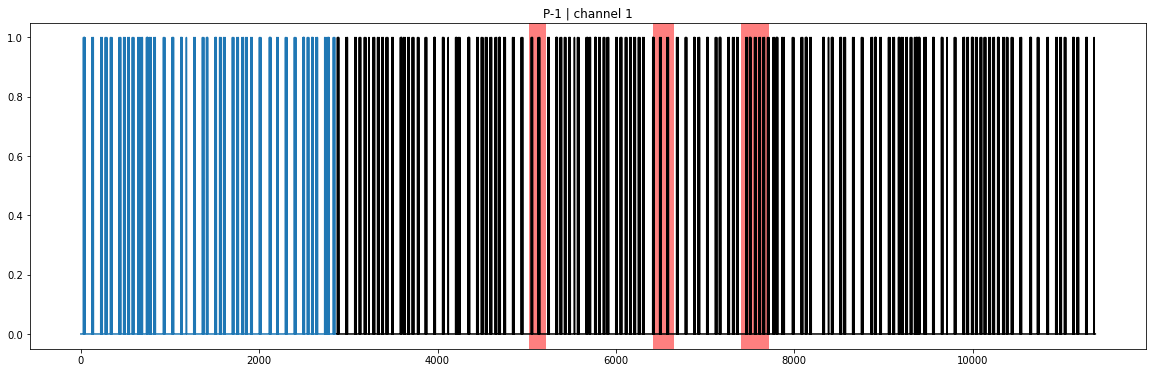

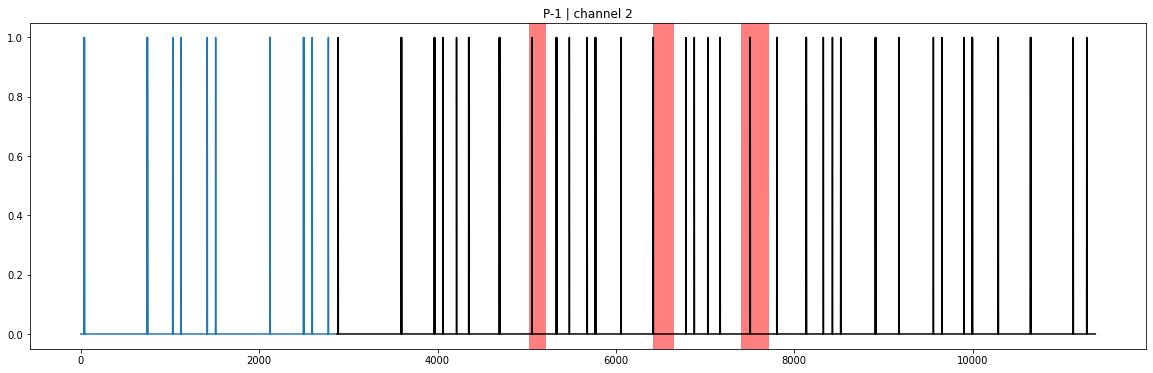

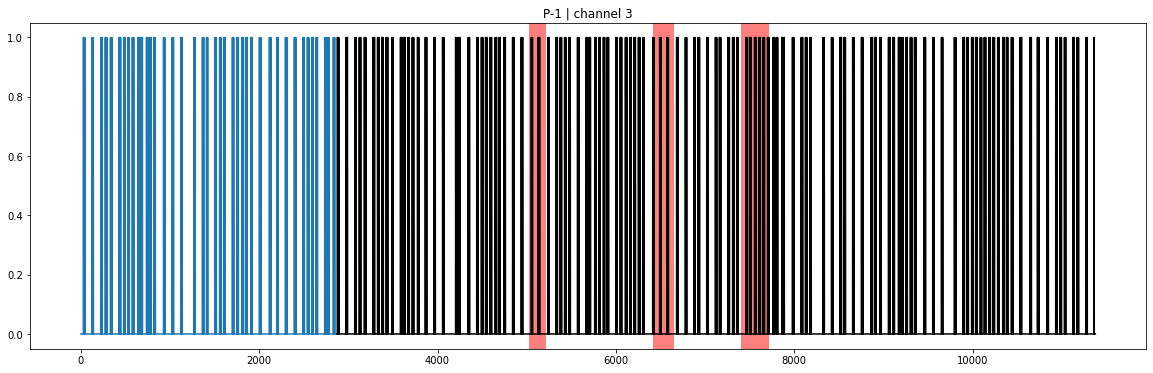

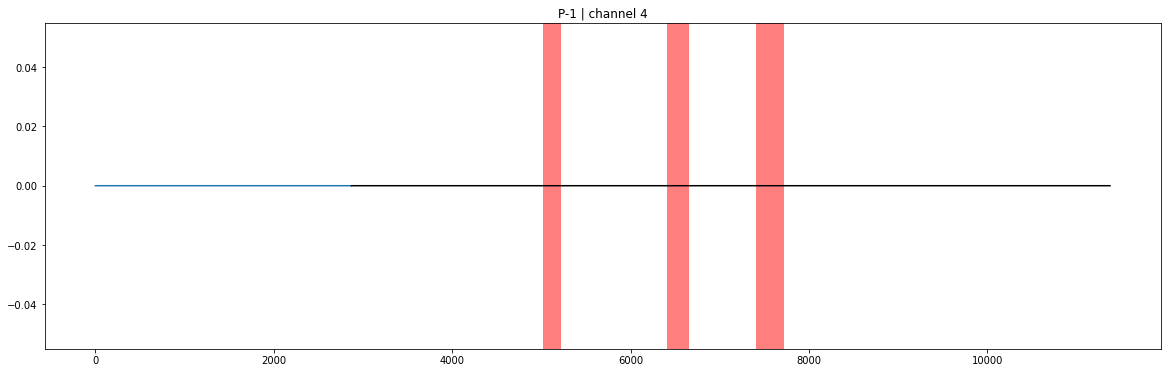

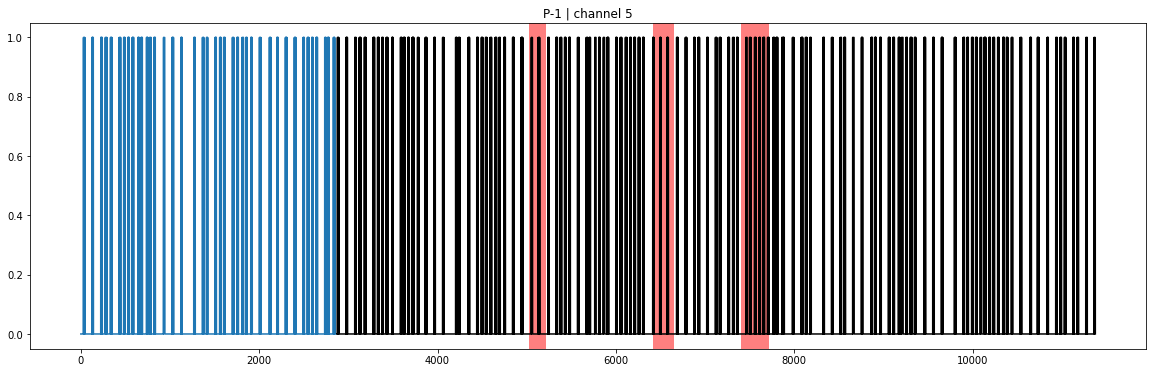

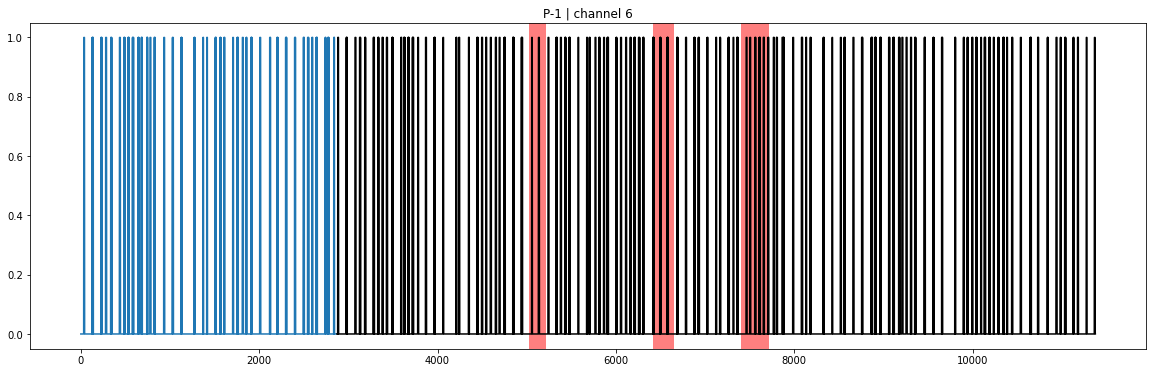

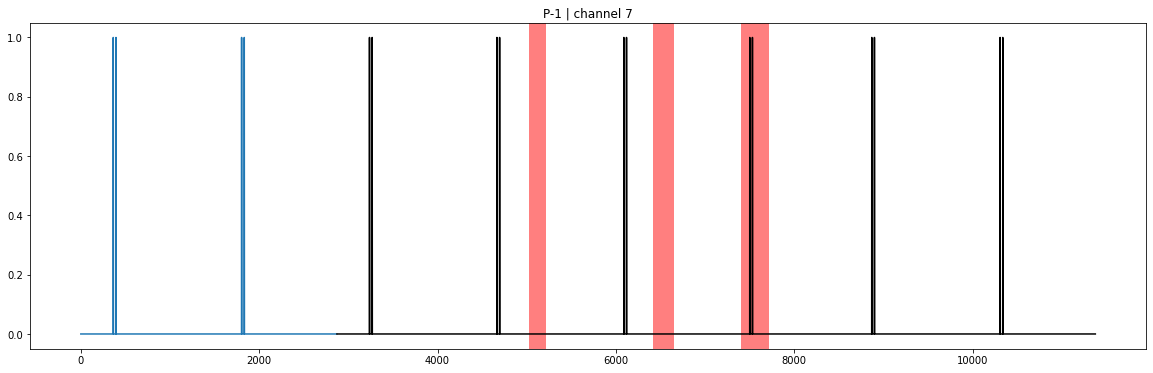

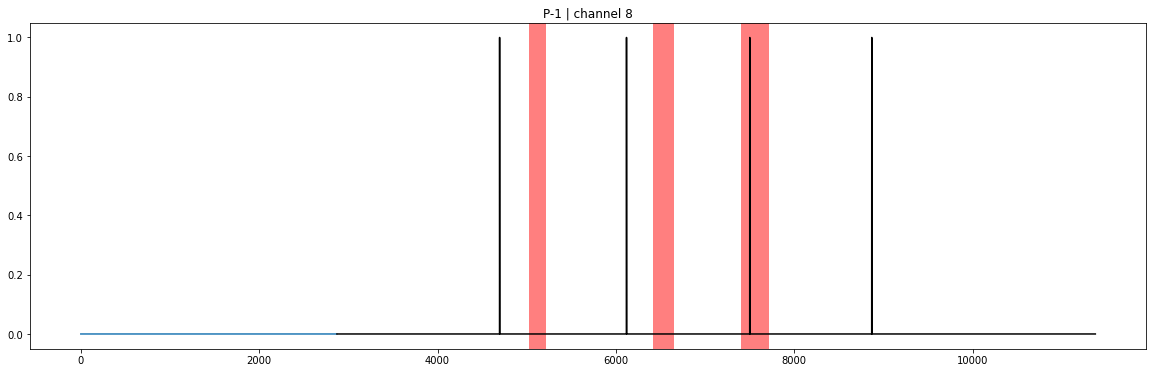

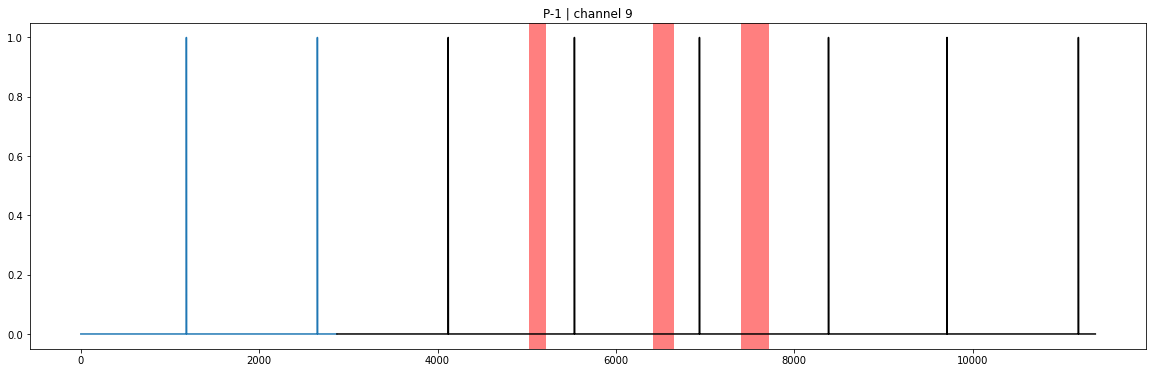

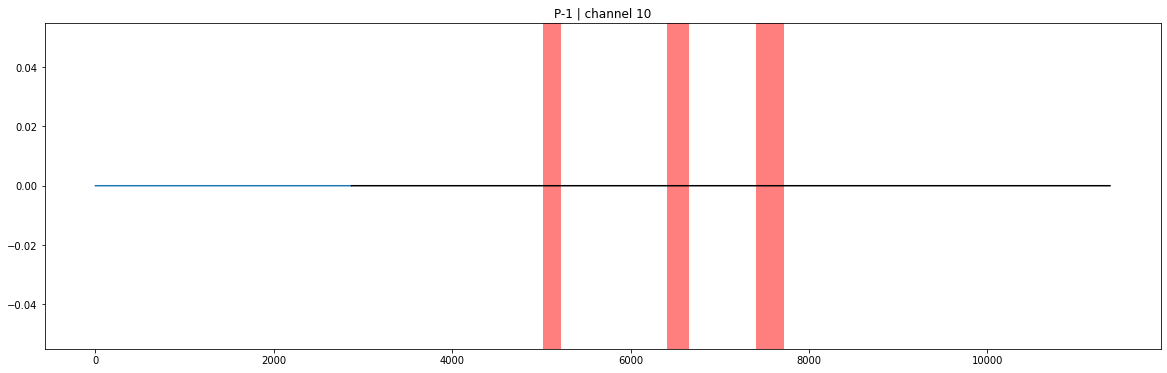

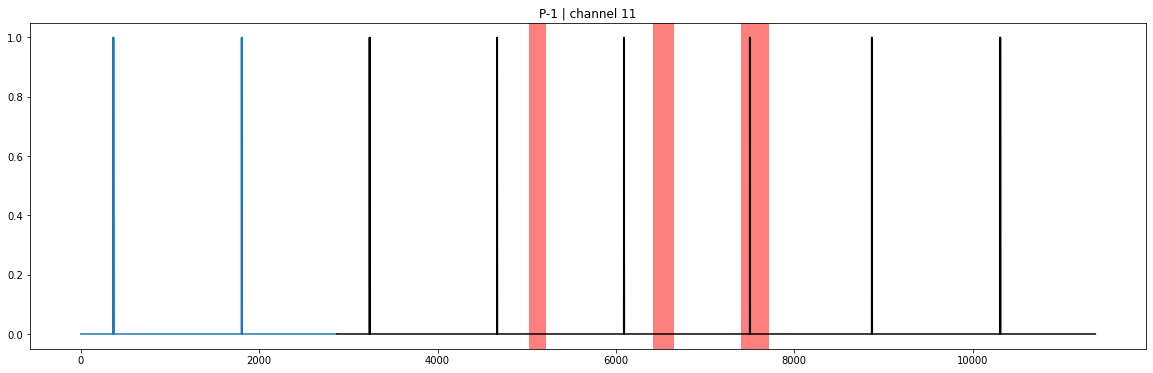

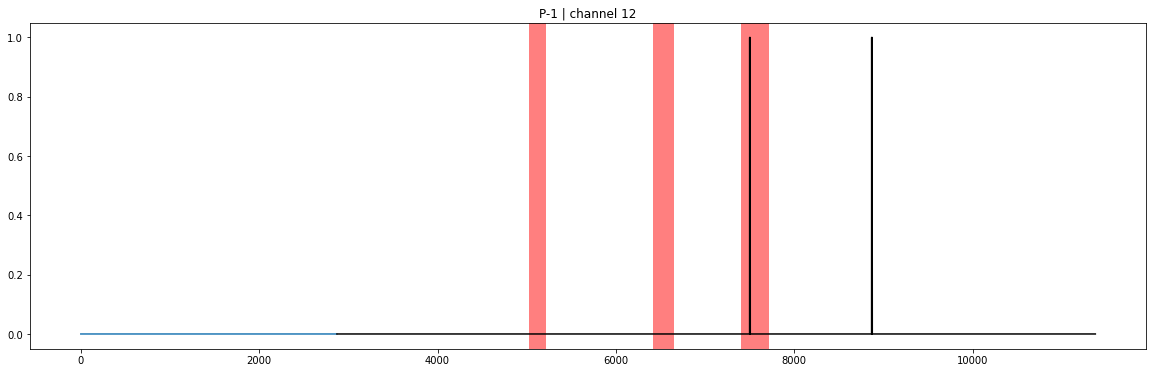

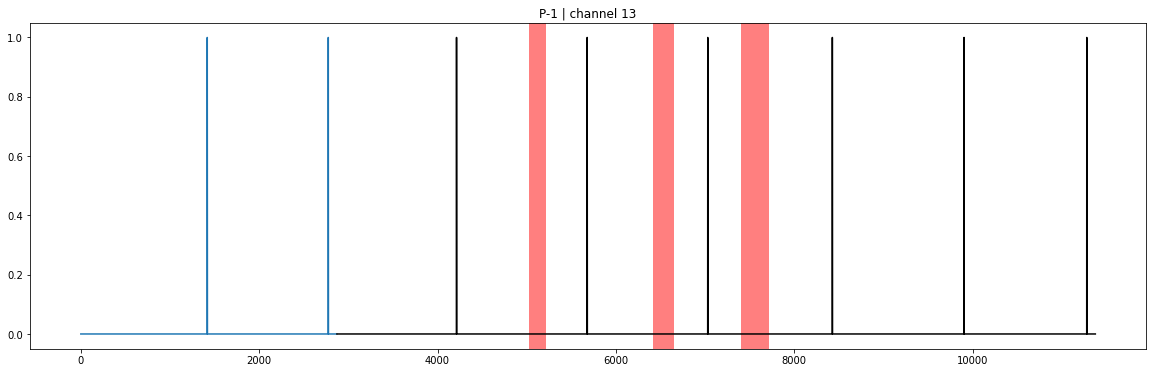

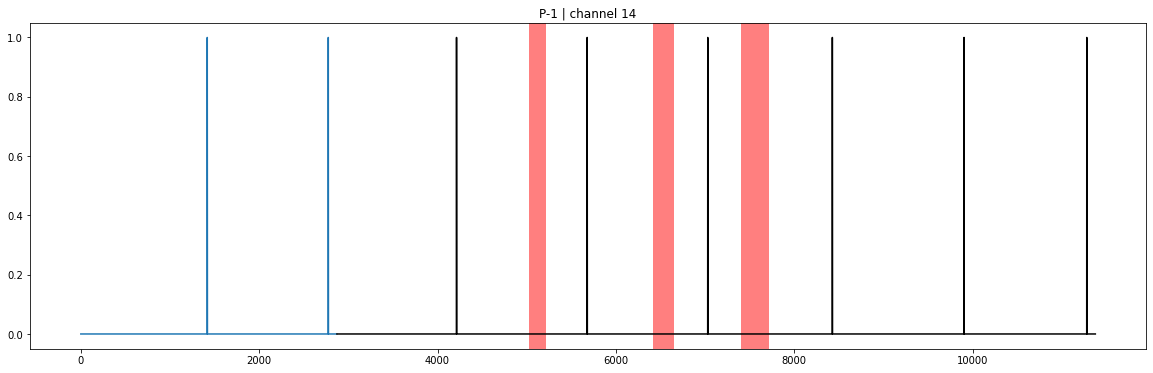

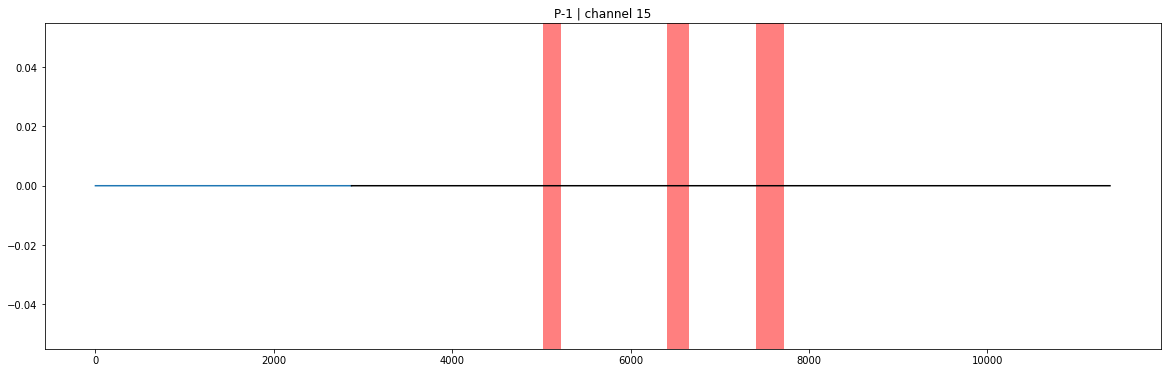

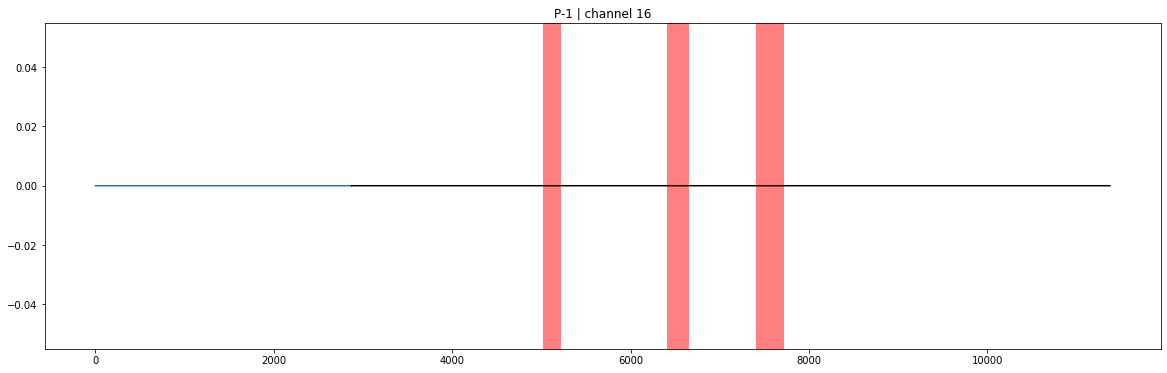

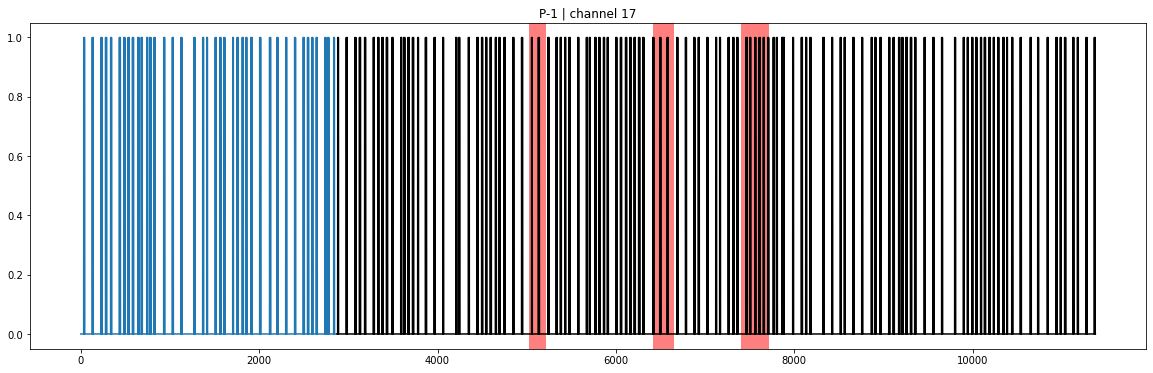

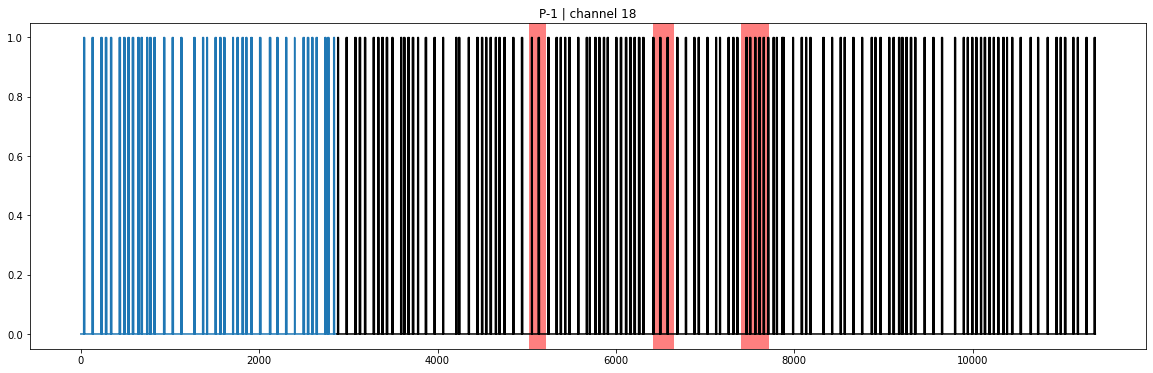

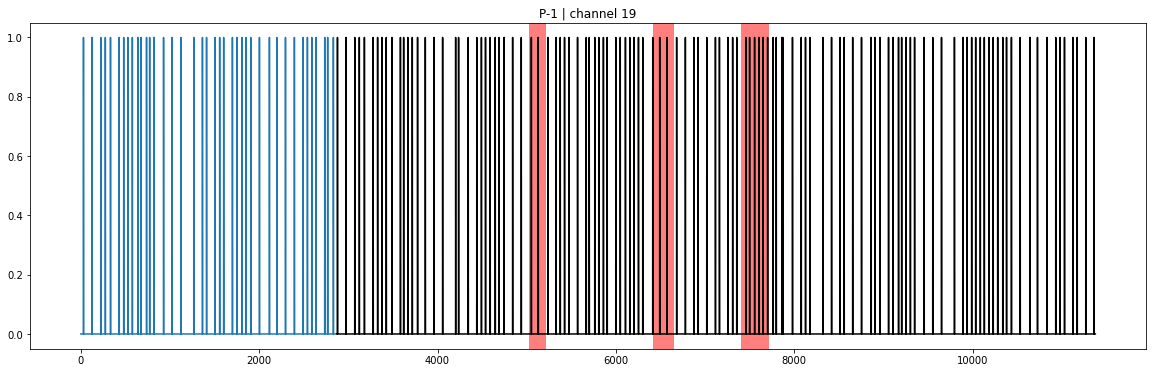

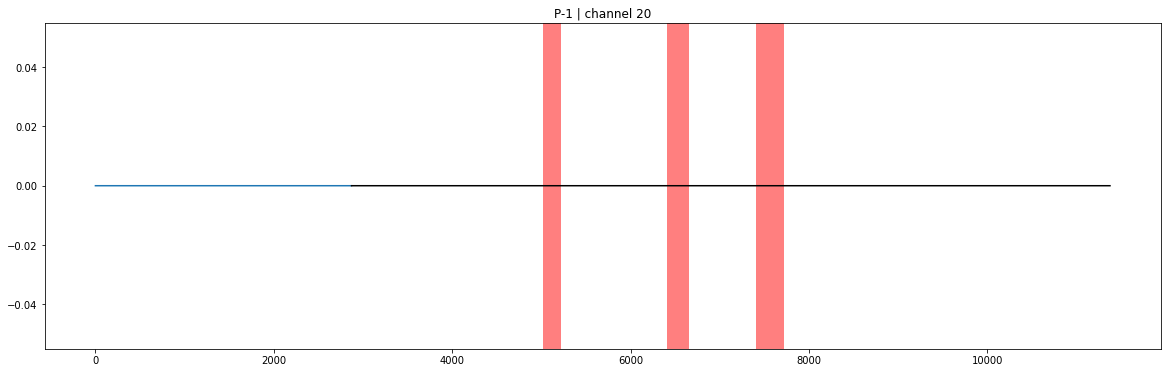

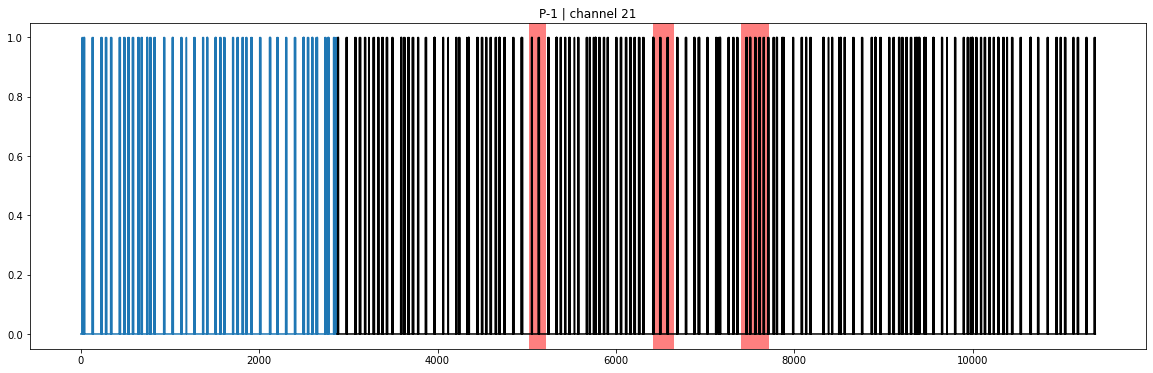

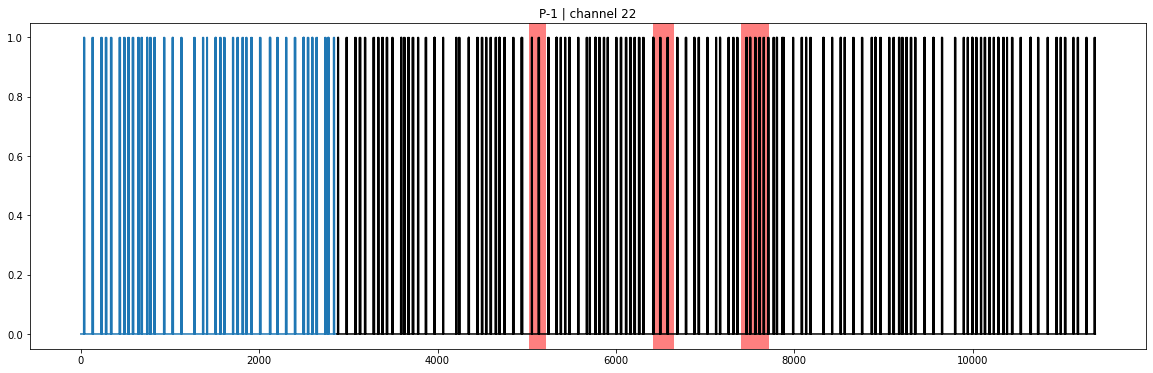

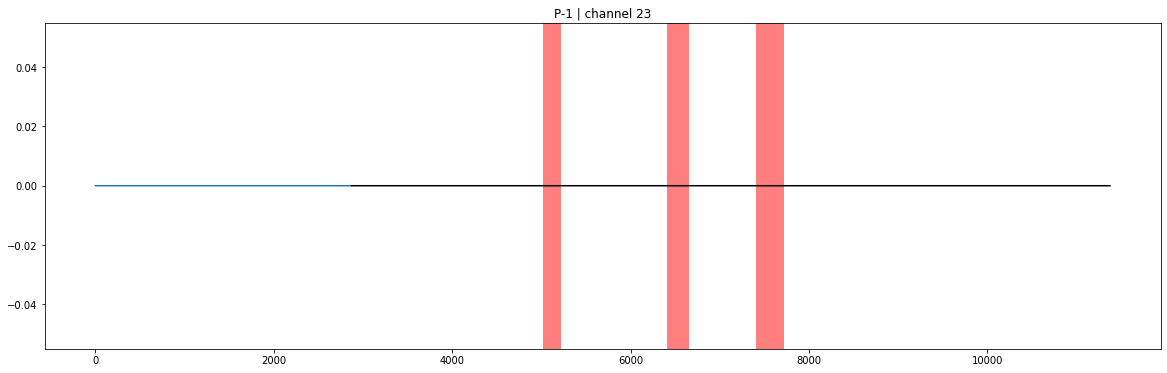

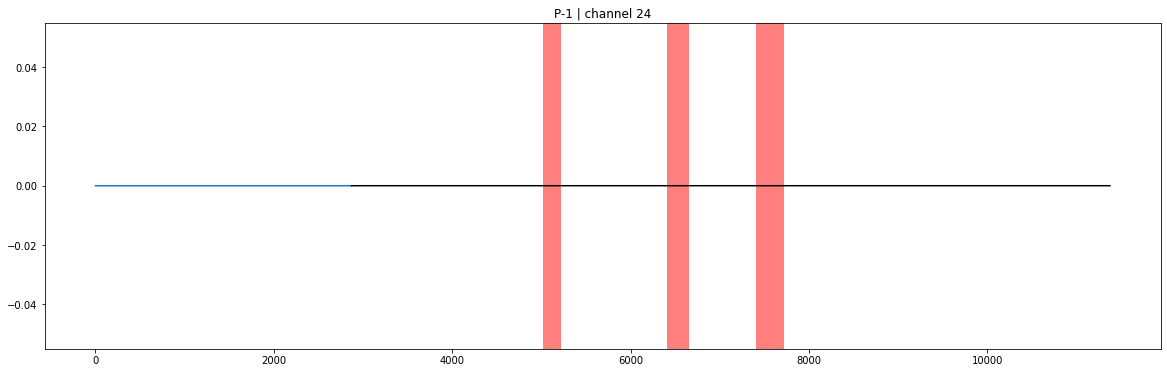

P-1
chan: P-2
P-2
chan: P-2
P-2
chan: P-3
P-3
chan: P-4
[[950, 1080], [2150, 2350], [4770, 4880]]


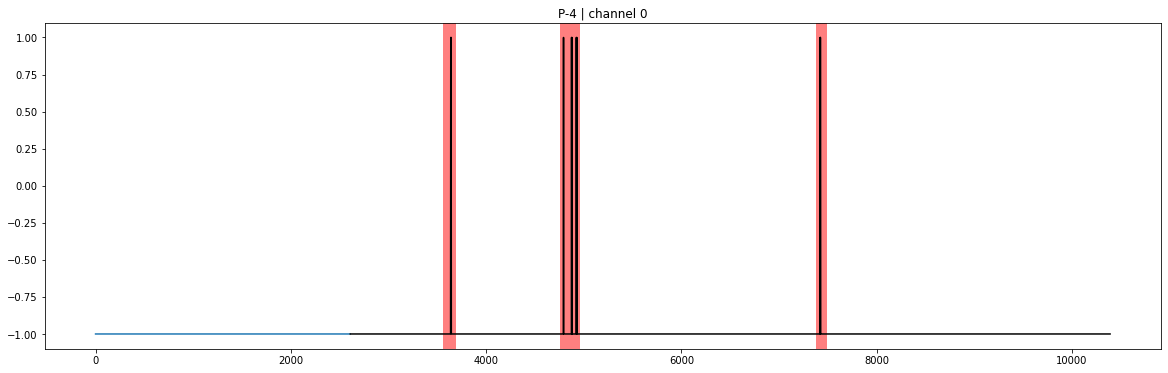

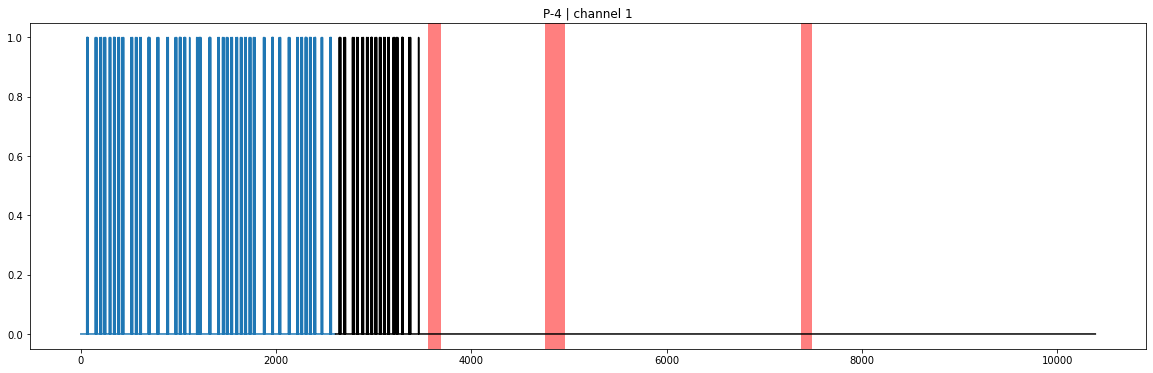

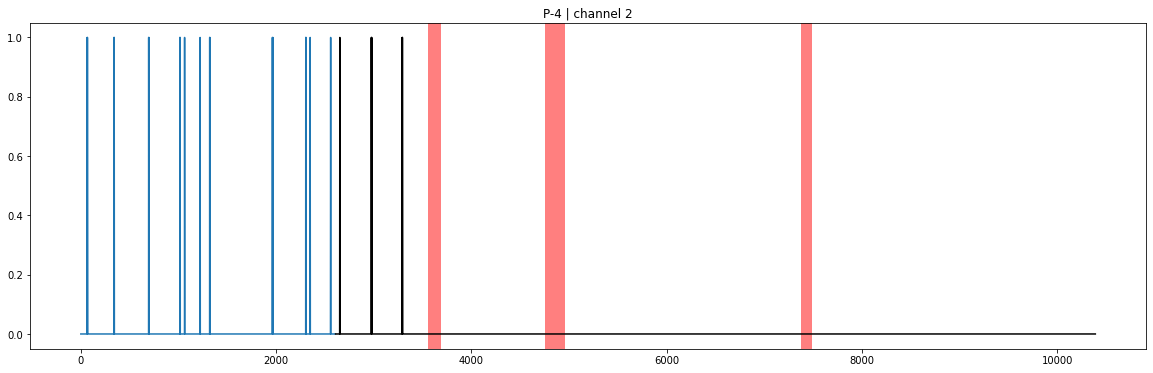

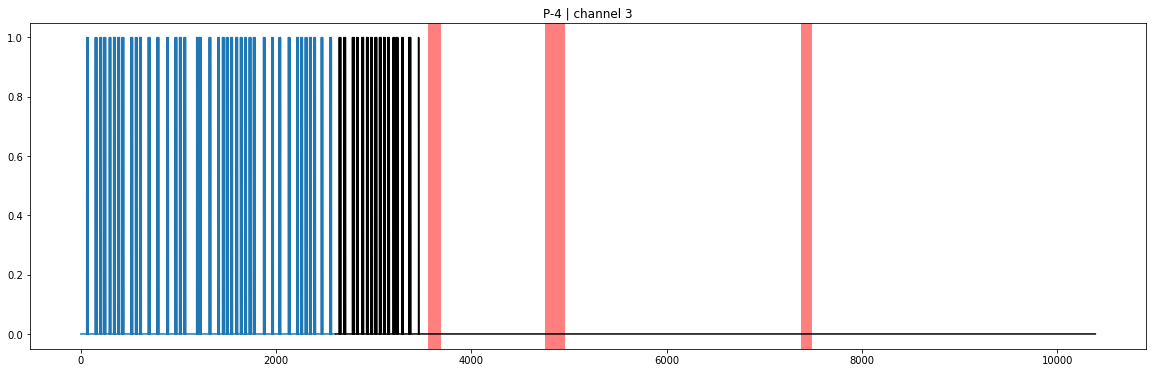

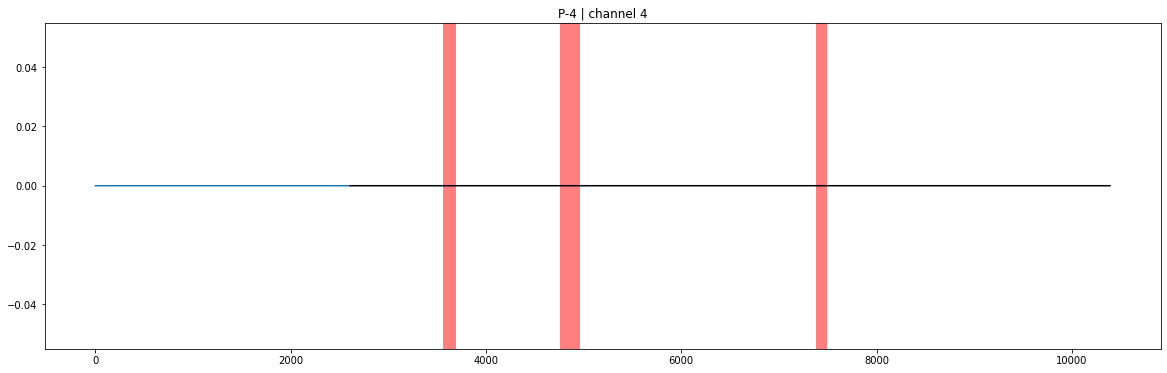

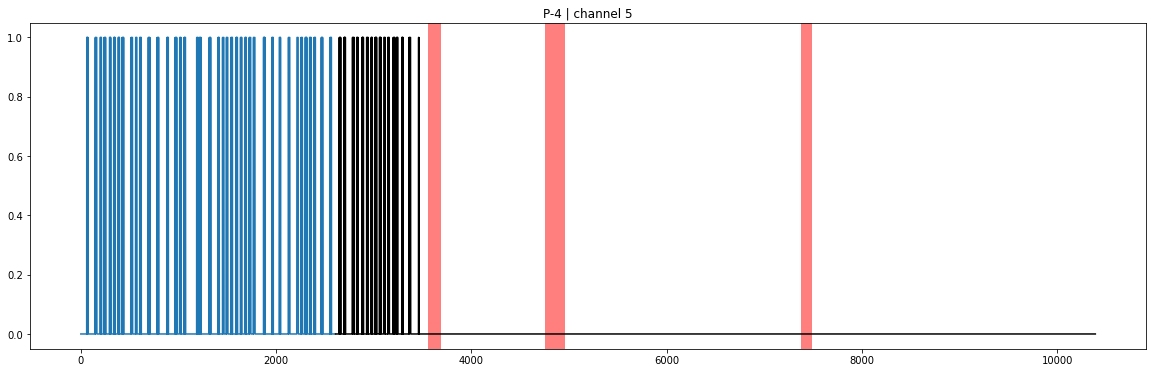

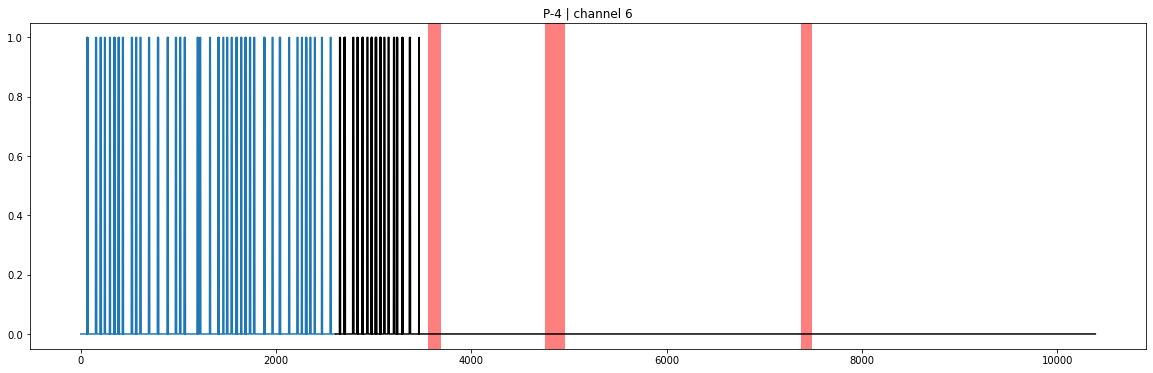

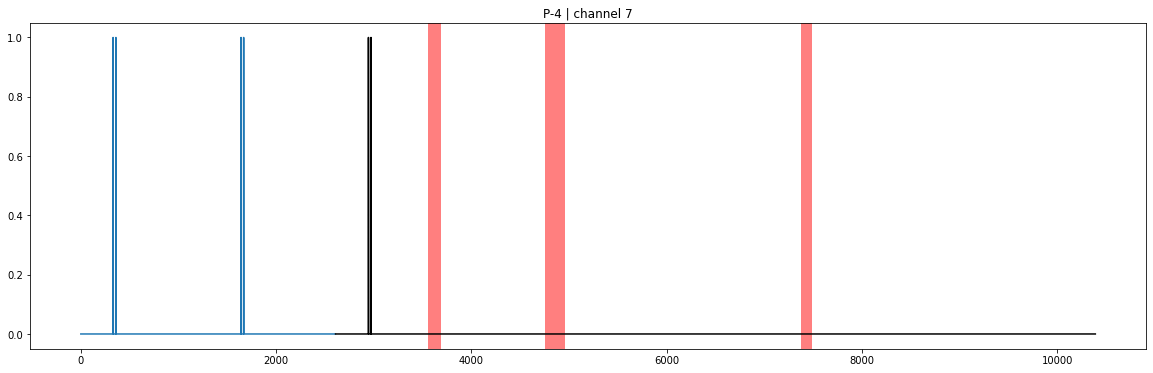

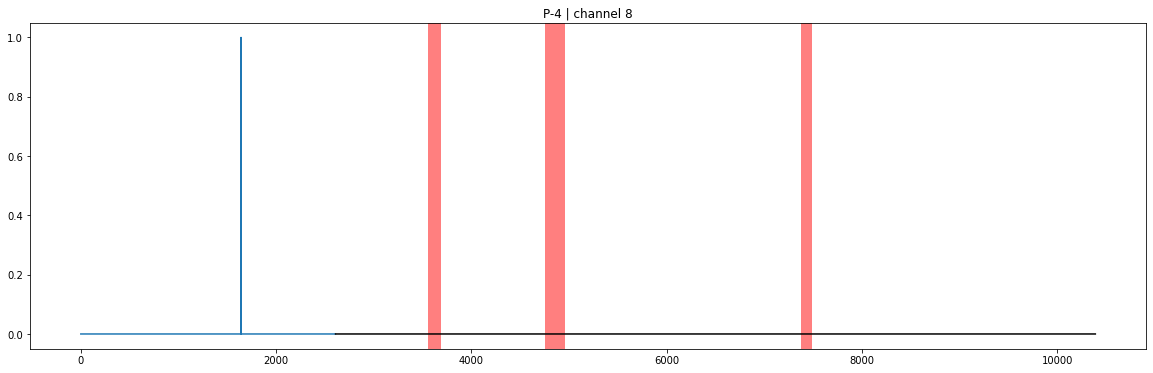

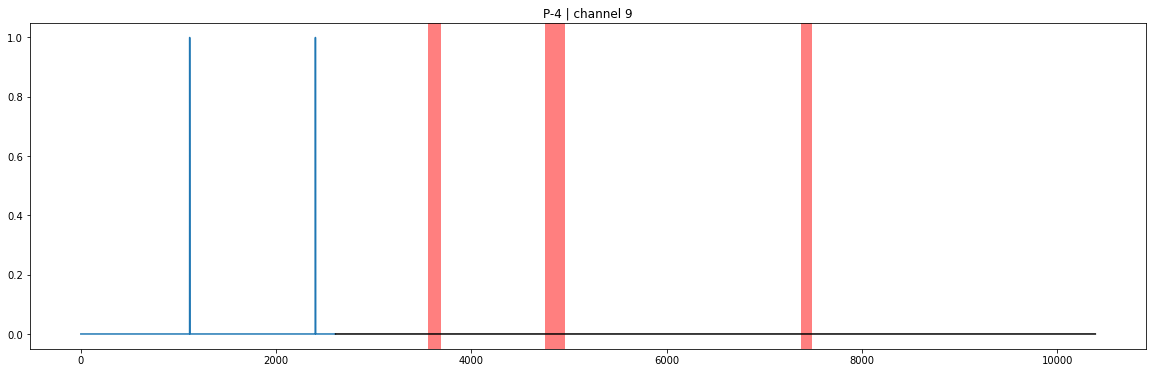

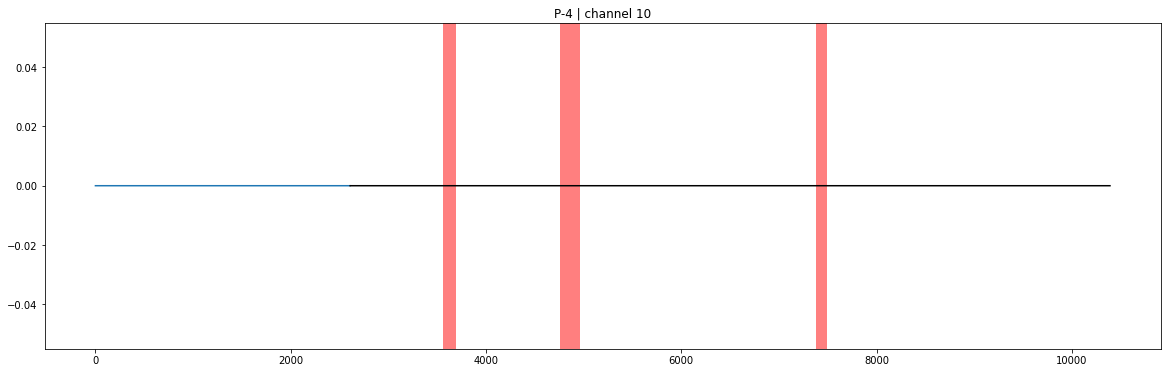

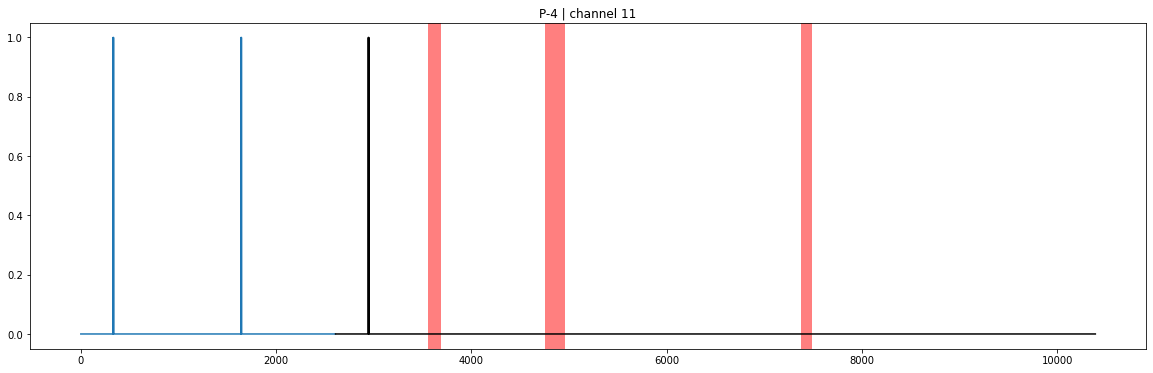

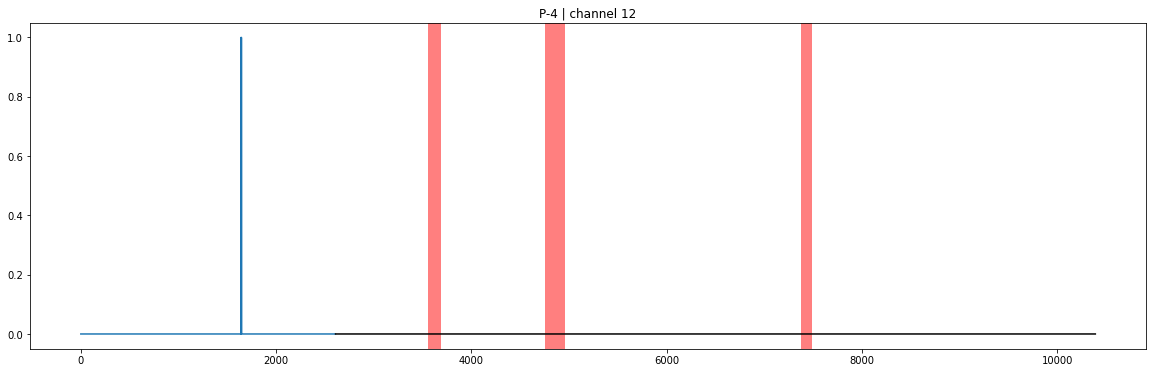

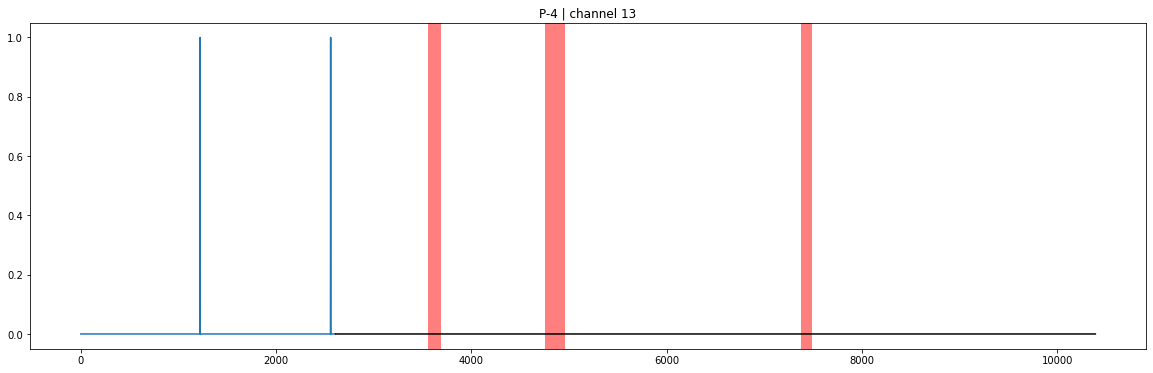

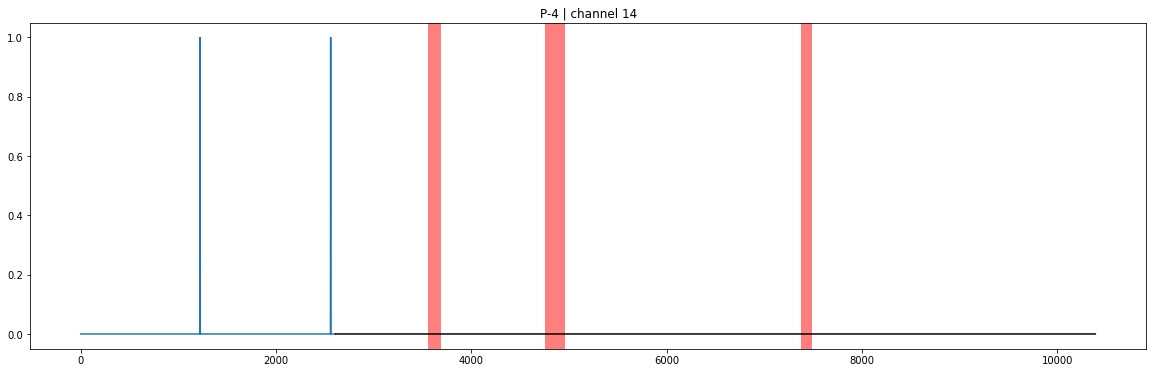

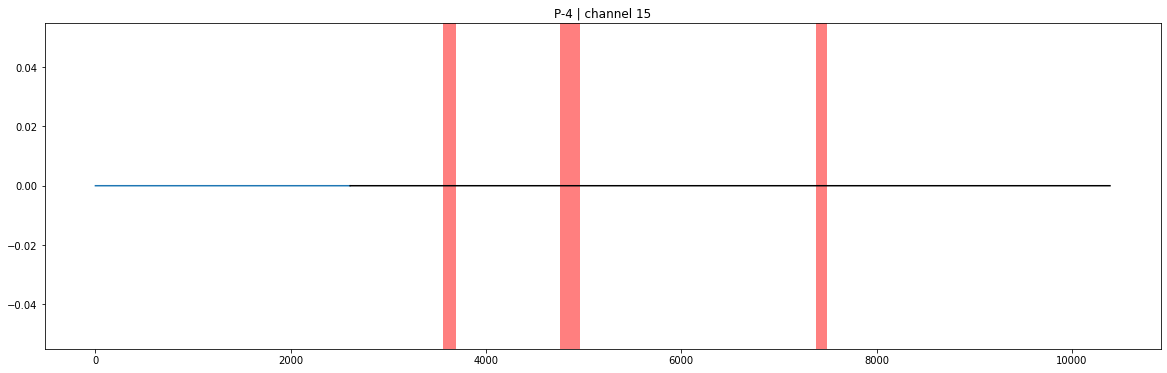

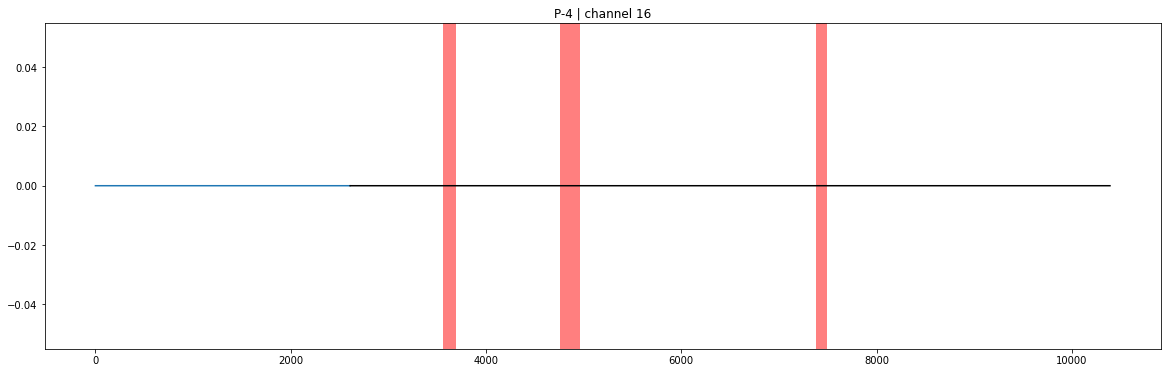

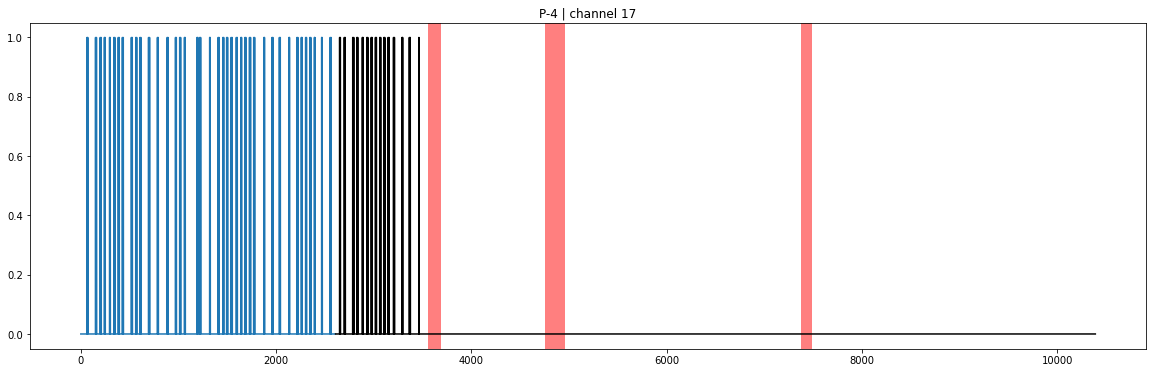

KeyboardInterrupt: 

In [5]:
for chan in SMAP_list:
    print(f"chan: {chan}")
    train = np.load(f"data/SMAP/train/{chan}.npy")
    test = np.load(f"data/SMAP/test/{chan}.npy")
    anos = ast.literal_eval(SMAP_label[SMAP_label["chan_id"]==chan]["anomaly_sequences"].values[0])
    anomaly_label = [False] * (len(train)+len(test))
    
    if len(anos) >= 2:
        for ano in anos:
            s, e = ano
            for i in range(len(train)+s, len(train)+e+1):
                anomaly_label[i] = True
        print(anos)
        for c in range(25):
            plt.figure(figsize=(20, 6))
            plt.title(f"{chan} | channel {c}")
            plt.plot(train[:, c])
            plt.plot(range(len(train), len(train)+len(test)), test[:, c], color="black")
            plot_interval(plt, anomaly_label)
            plt.show()
    print(chan)

chan: C-1
chan: C-2
chan: D-14
chan: D-15
chan: D-16
chan: F-4
chan: F-5
chan: F-7
chan: F-8
chan: M-1
chan: M-2
chan: M-3
chan: M-4
chan: M-5
chan: M-6
chan: M-7
chan: P-10
chan: P-11
chan: P-14
chan: P-15
[[1390, 1410]]


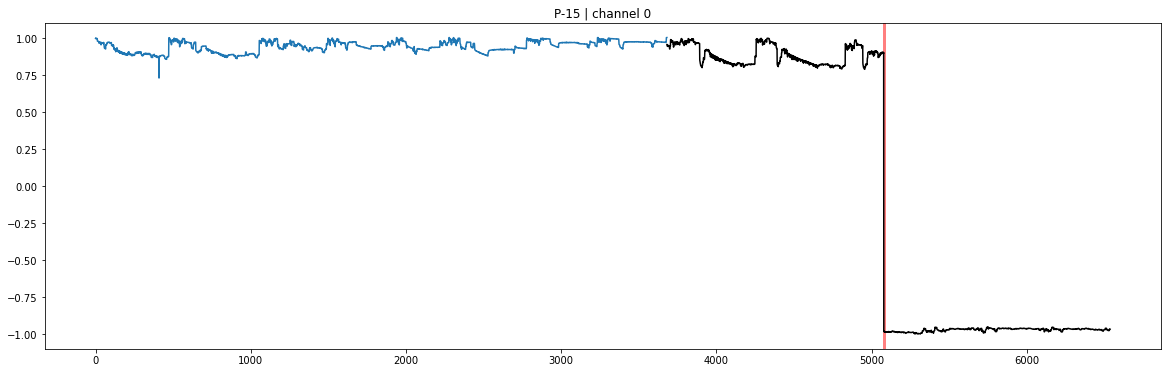

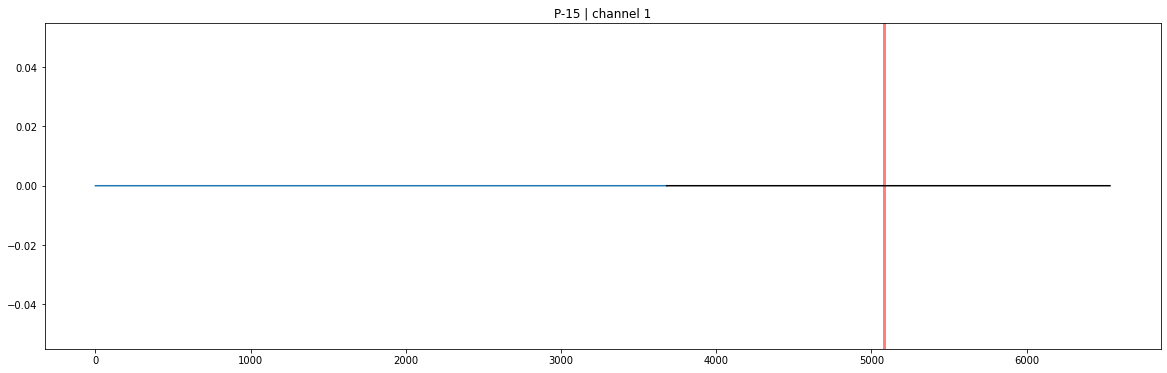

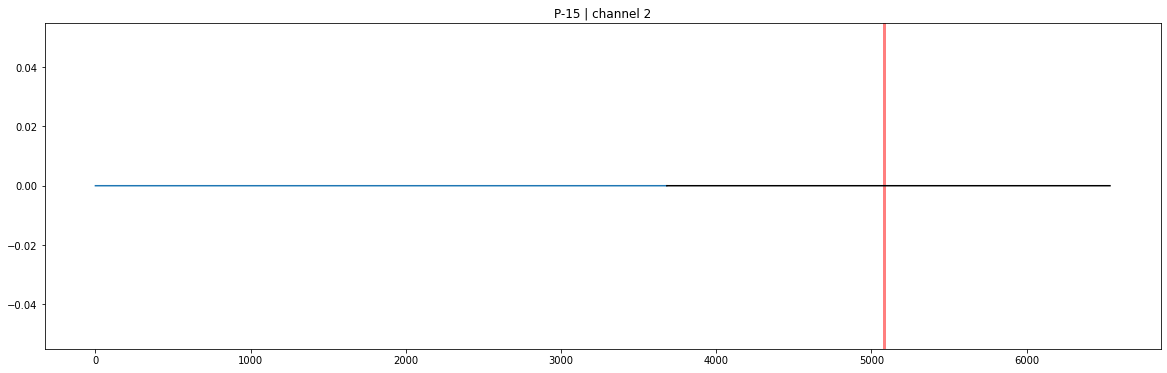

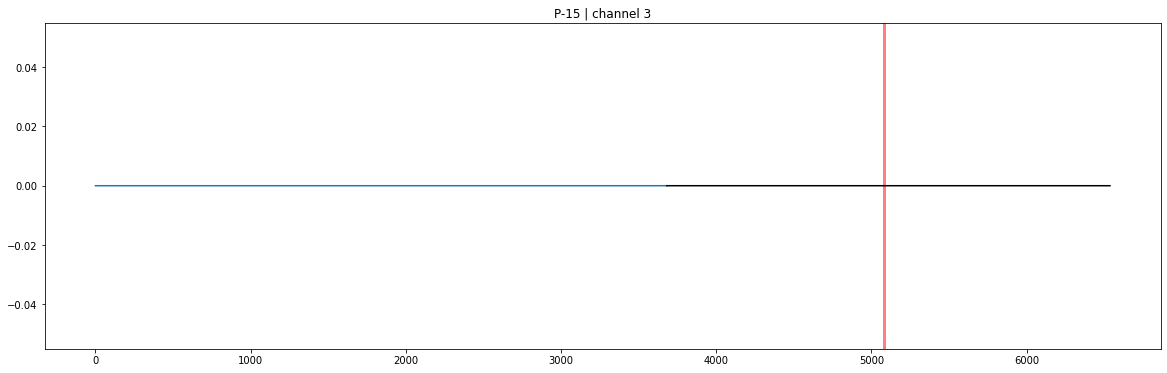

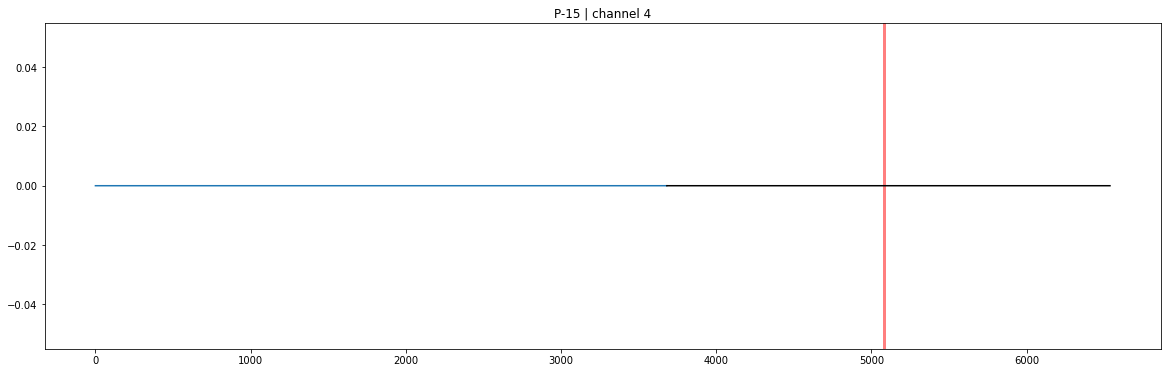

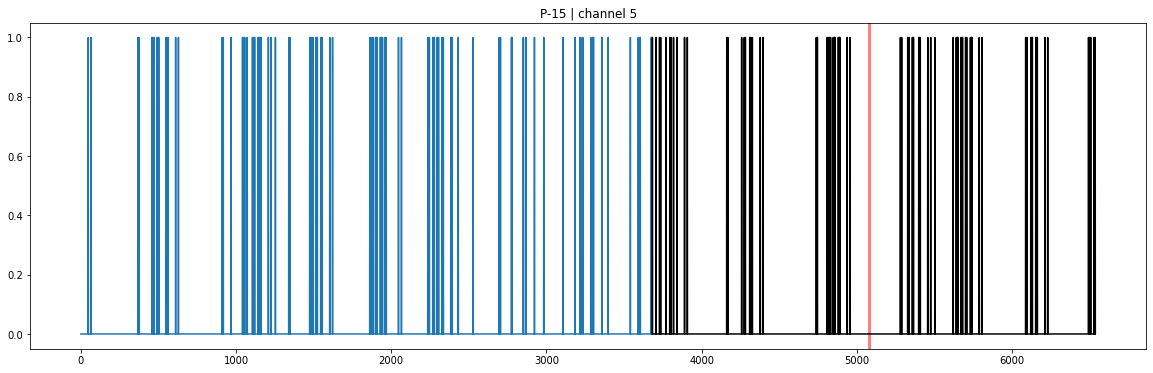

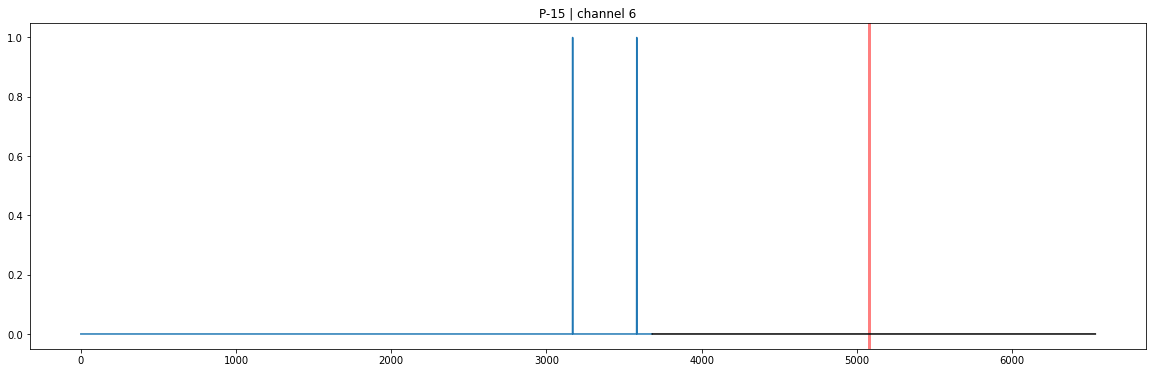

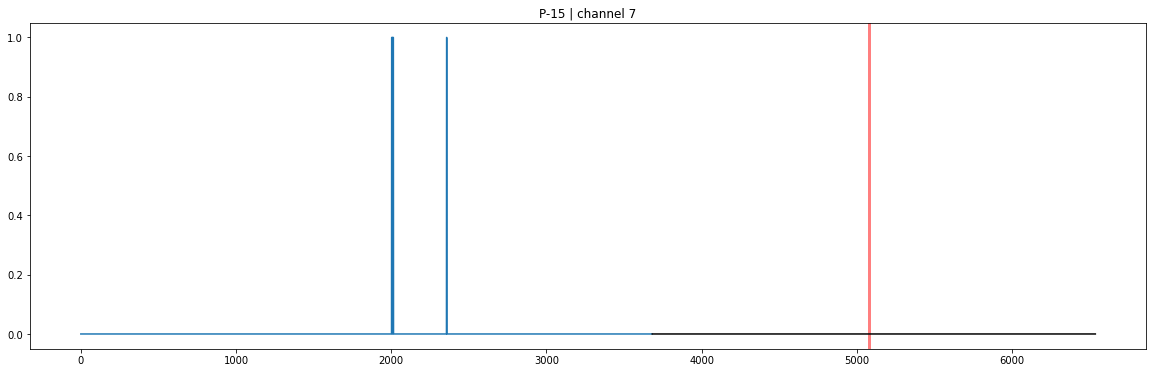

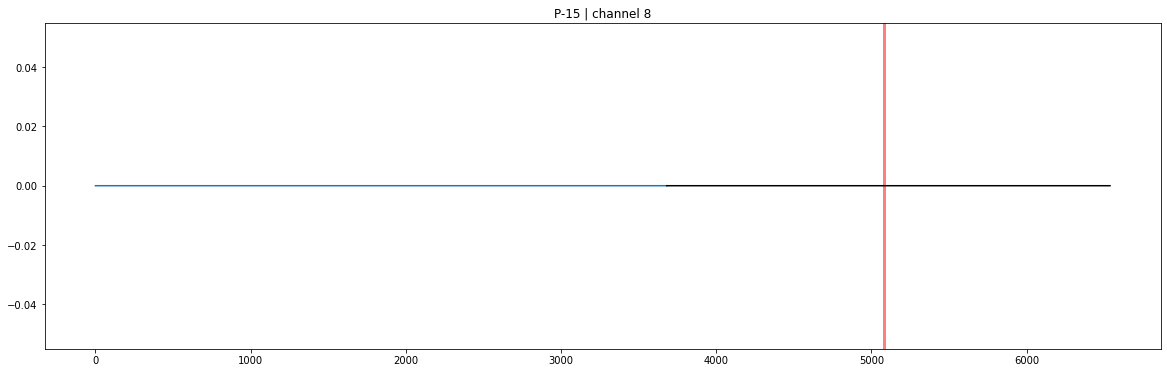

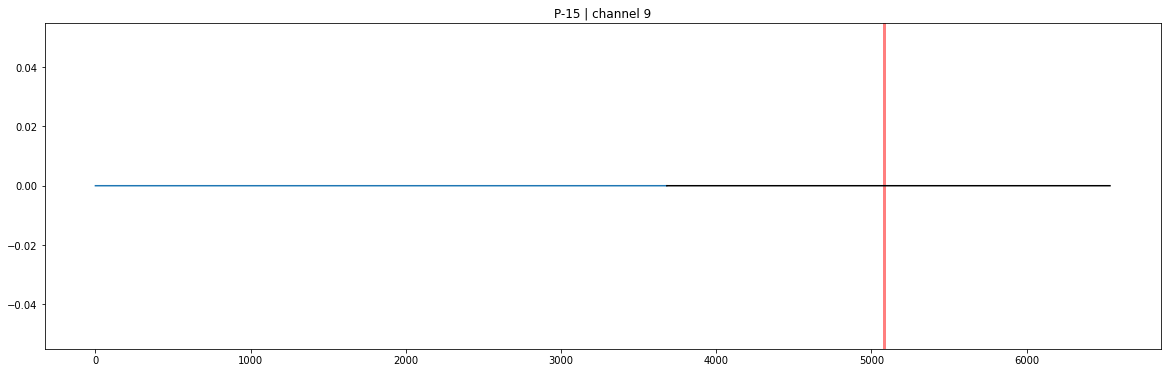

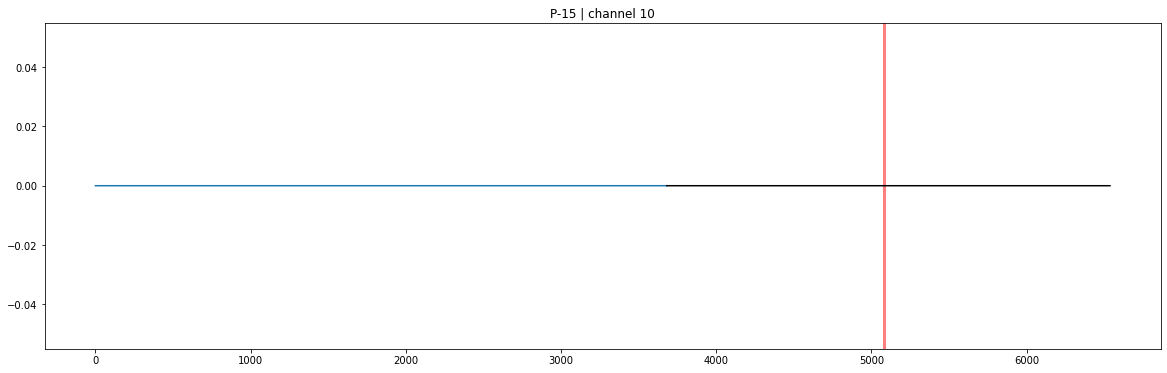

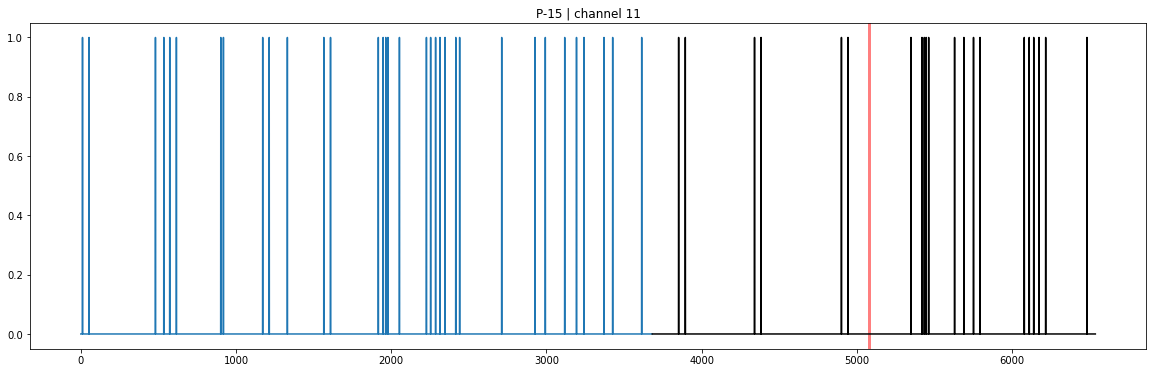

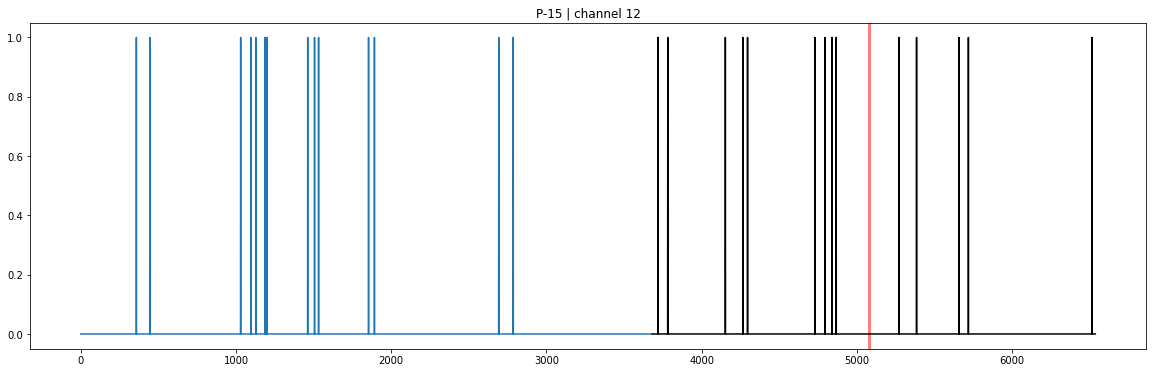

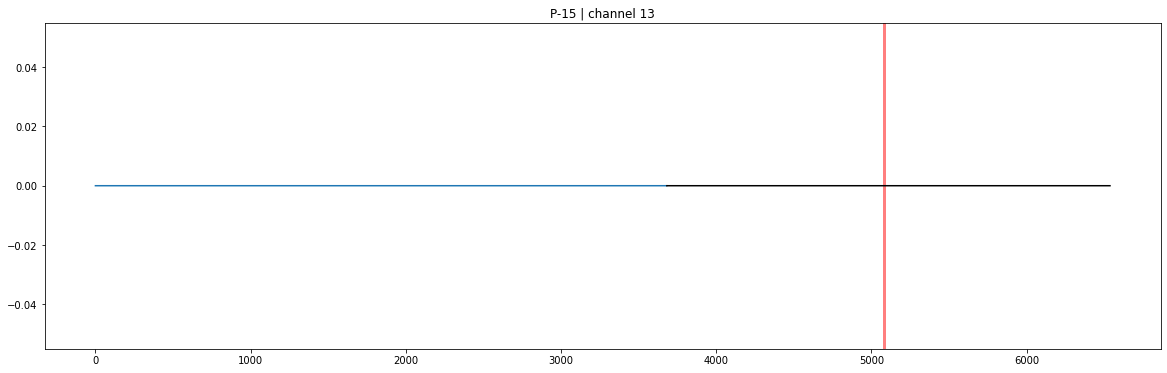

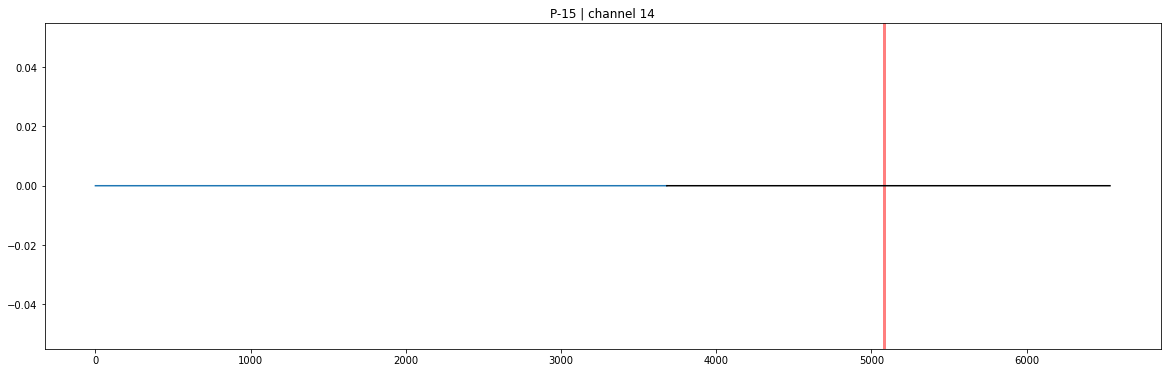

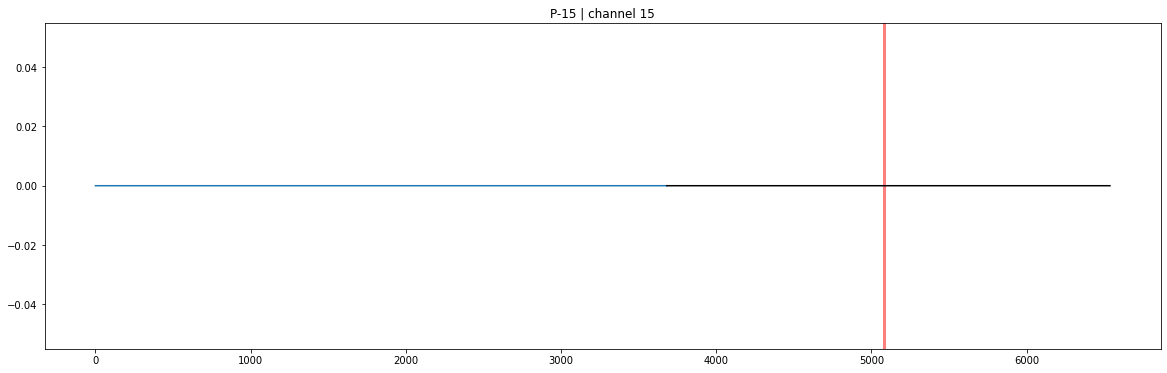

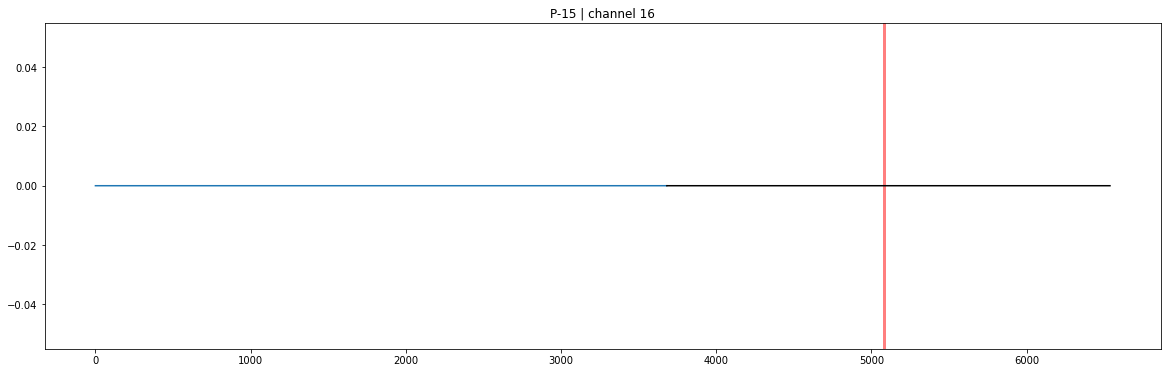

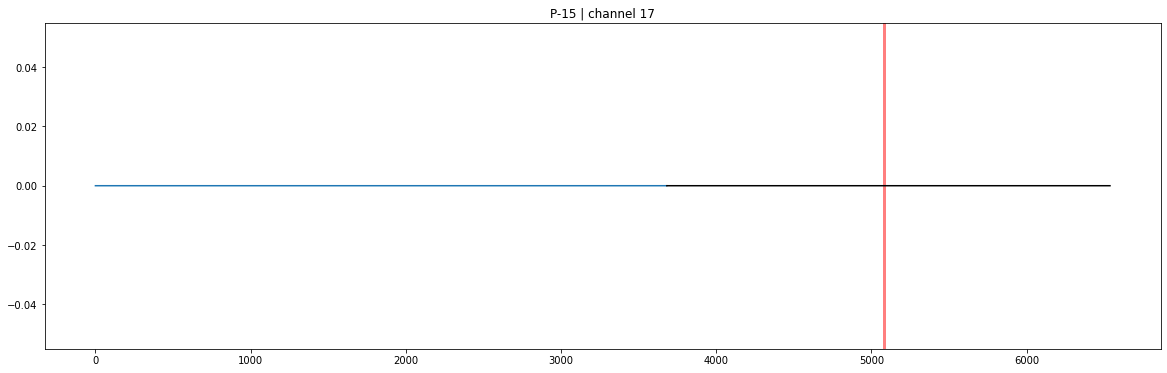

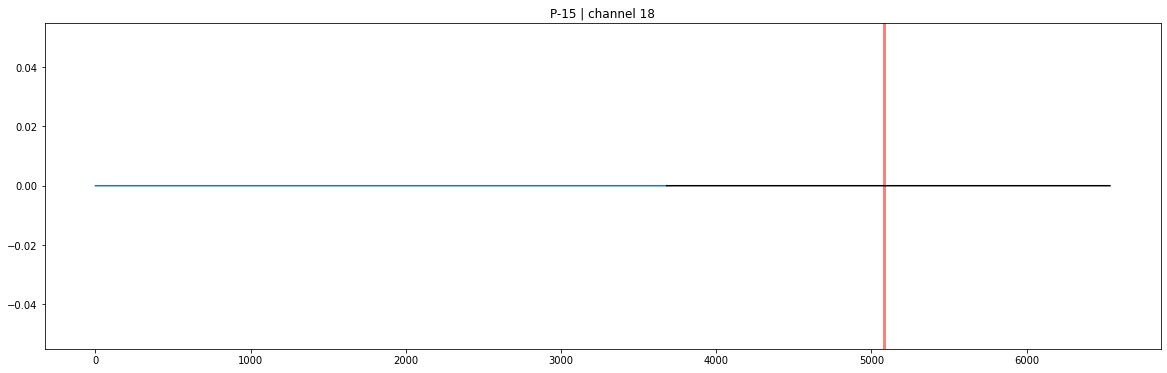

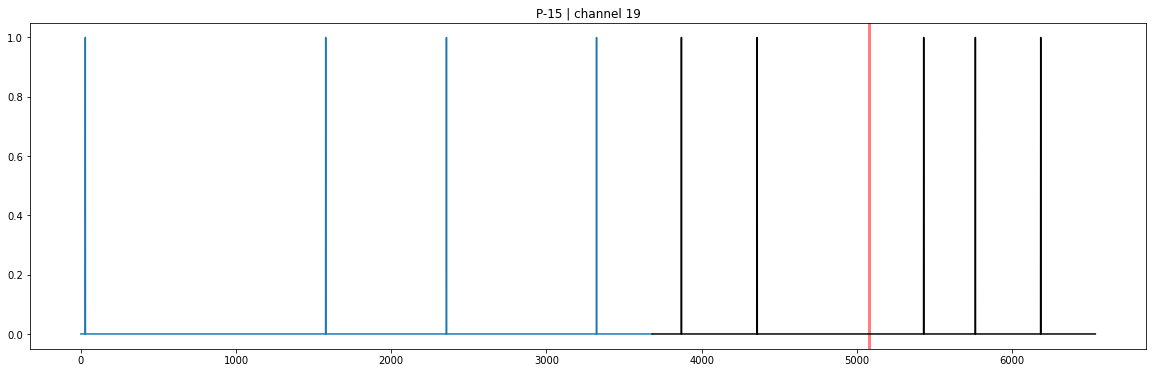

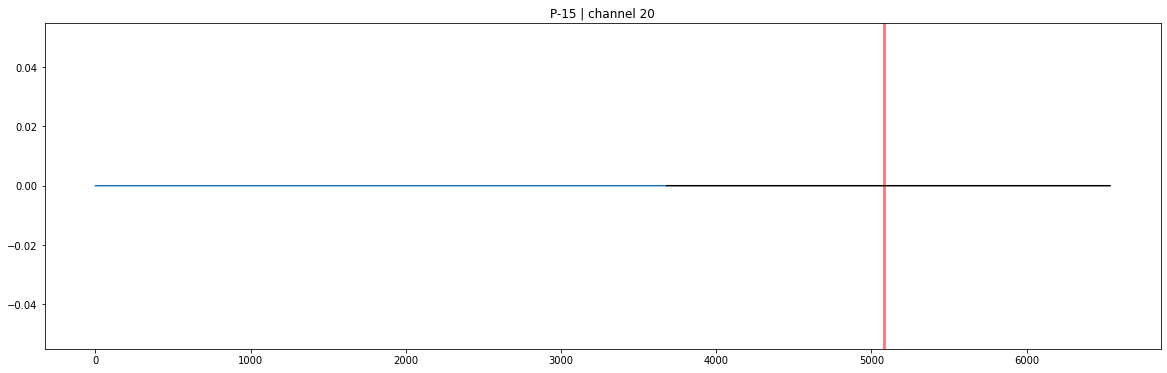

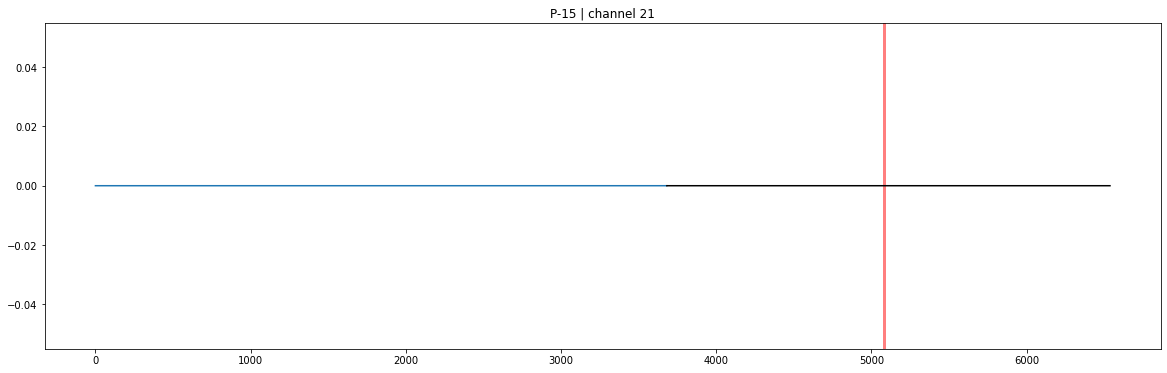

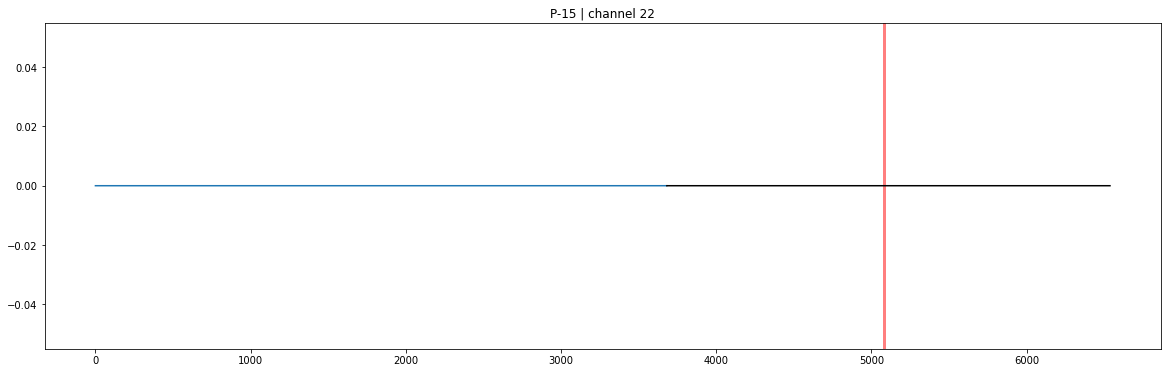

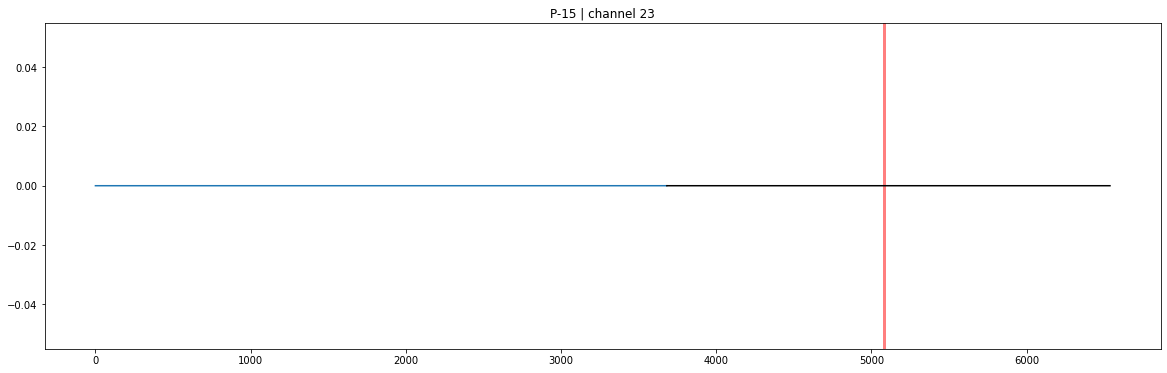

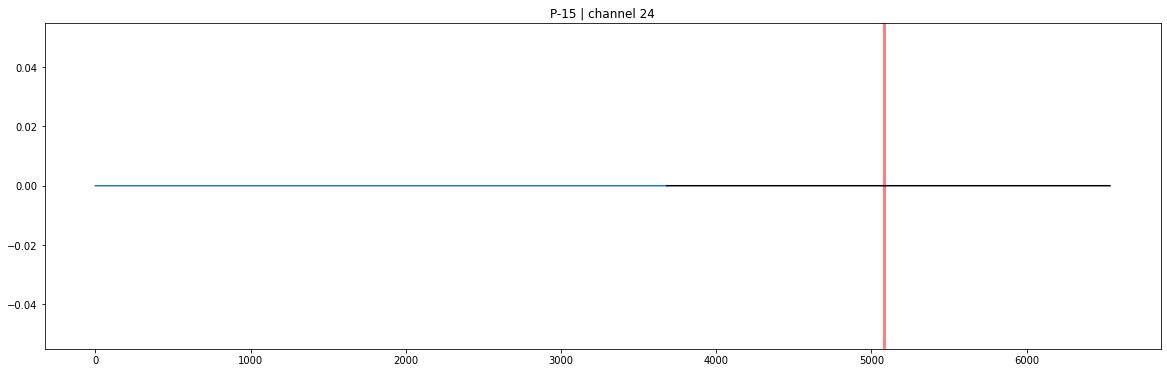

P-15
chan: S-2
chan: T-12
chan: T-13
chan: T-4
chan: T-5
chan: T-8
chan: T-9


In [8]:
for chan in MSL_list:
    print(f"chan: {chan}")
    train = np.load(f"data/MSL/train/{chan}.npy")
    test = np.load(f"data/MSL/test/{chan}.npy")
    anos = ast.literal_eval(MSL_label[MSL_label["chan_id"]==chan]["anomaly_sequences"].values[0])
    anomaly_label = [False] * (len(train)+len(test))
    
    if len(anos) >= 1 and chan=="P-15":
        for ano in anos:
            s, e = ano
            for i in range(len(train)+s, len(train)+e+1):
                anomaly_label[i] = True
        print(anos)
        for c in range(25):
            plt.figure(figsize=(20, 6))
            plt.title(f"{chan} | channel {c}")
            plt.plot(train[:, c])
            plt.plot(range(len(train), len(train)+len(test)), test[:, c], color="black")
            plot_interval(plt, anomaly_label)
            plt.show()
        print(chan)